<a href="https://colab.research.google.com/github/zpenct/Big-Data/blob/main/Kmoditas_Pangan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
month_mapping = {
    'Januari': '01',
    'Februari': '02',
    'Maret': '03',
    'April': '04',
    'Mei': '05',
    'Juni': '06',
    'Juli': '07',
    'Agustus': '08',
    'September': '09',
    'Oktober': '10',
    'November': '11',
    'Desember': '12'
}


In [ ]:
import pandas as pd

# Load the CSV file
file_path = 'data-harga-pangan-konsumen-per-konsumen.xlsx'
data = pd.read_excel(file_path)

data.head()

No.  Kode Provinsi        Provinsi  Kode Komoditas      Komoditas  Tahun  \
0    1             11            Aceh             NaN  Beras Premium   2021   
1    2             12  Sumatera Utara             NaN  Beras Premium   2021   
2    3             13  Sumatera Barat             NaN  Beras Premium   2021   
3    4             14            Riau             NaN  Beras Premium   2021   
4    5             15           Jambi             NaN  Beras Premium   2021   

     Bulan   Harga  
0  Januari  12.072  
1  Januari  12.523  
2  Januari  13.096  
3  Januari  14.605  
4  Januari  12.323

In [ ]:
commodities = data['Komoditas'].unique()
commodities

array(['Beras Premium', 'Beras Medium', 'Kedelai Biji Kering',
       'Bawang Merah', 'Bawang Putih (Bonggol)', 'Cabai Merah Keriting',
       'Cabai Rawit Merah', 'Daging Sapi Murni', 'Daging Ayam Ras',
       'Telur Ayam Ras', 'Gula Pasir Lokal/Curah',
       'Minyak Goreng Kemasan'], dtype=object)

In [ ]:
# Check for NaN or non-finite values in 'Harga'
print(data['Harga'].isnull().sum())  # Count of NaN values
print(data['Harga'].unique())  # Unique values in the column

37
[12.072 12.523 13.096 ... 26.67  24.665 23.545]


In [ ]:
# Replace NaN values with the mean price for that commodity
data['Harga'] = data.groupby('Komoditas')['Harga'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# Remove currency symbol and commas, then convert to integer
data['Harga'] = data['Harga']
# Replace month names with numbers using the mapping
data['Bulan'] = data['Bulan'].replace(month_mapping)

# Now combine 'Tahun' and 'Bulan' into a single datetime column
data['Tanggal'] = pd.to_datetime(data['Bulan'] + ' ' + data['Tahun'].astype(str), format='%m %Y')

# Drop the original 'Tahun' and 'Bulan' columns if not needed
data.drop(['Tahun', 'Bulan','Kode Komoditas','Kode Provinsi','No.'], axis=1, inplace=True)

# Display the cleaned data
data.head()

Provinsi      Komoditas   Harga    Tanggal
0            Aceh  Beras Premium  12.072 2021-01-01
1  Sumatera Utara  Beras Premium  12.523 2021-01-01
2  Sumatera Barat  Beras Premium  13.096 2021-01-01
3            Riau  Beras Premium  14.605 2021-01-01
4           Jambi  Beras Premium  12.323 2021-01-01

## **Analisis**

In [ ]:
selected_commodities = ['Cabai Merah Keriting', 'Cabai Rawit Merah']
filtered_data = data[data['Komoditas'].isin(selected_commodities)]

average_prices = filtered_data.groupby('Komoditas')['Harga'].mean().reset_index()
highest_price = average_prices.loc[average_prices['Harga'].idxmax()]
lowest_price = average_prices.loc[average_prices['Harga'].idxmin()]

print("Harga Rata-rata per Komoditas:")
print(average_prices)
print("\nKomoditas dengan Harga Rata-rata Tertinggi:", highest_price)
print("Komoditas dengan Harga Rata-rata Terendah:", lowest_price)

Harga Rata-rata per Komoditas:
              Komoditas       Harga
0  Cabai Merah Keriting  154.933345
1     Cabai Rawit Merah  174.778504

Komoditas dengan Harga Rata-rata Tertinggi: Komoditas    Cabai Rawit Merah
Harga               174.778504
Name: 1, dtype: object
Komoditas dengan Harga Rata-rata Terendah: Komoditas    Cabai Merah Keriting
Harga                  154.933345
Name: 0, dtype: object


In [ ]:
len(filtered_data)

1428

In [ ]:
filtered_data.head(1000)

Provinsi             Komoditas   Harga    Tanggal
3570            Aceh  Cabai Merah Keriting  42.353 2021-01-01
3571  Sumatera Utara  Cabai Merah Keriting  43.565 2021-01-01
3572  Sumatera Barat  Cabai Merah Keriting  48.343 2021-01-01
3573            Riau  Cabai Merah Keriting  54.869 2021-01-01
3574           Jambi  Cabai Merah Keriting  48.969 2021-01-01
...              ...                   ...     ...        ...
4565  Kepulauan Riau     Cabai Rawit Merah  59.526 2021-09-01
4566     DKI Jakarta     Cabai Rawit Merah  32.598 2021-09-01
4567      Jawa Barat     Cabai Rawit Merah  26.015 2021-09-01
4568     Jawa Tengah     Cabai Rawit Merah  18.696 2021-09-01
4569   DI Yogyakarta     Cabai Rawit Merah  14.982 2021-09-01

[1000 rows x 4 columns]

<ipython-input-40-e9fb95217e10>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_prices.sort_values('Harga', ascending=False), x='Komoditas', y='Harga', palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


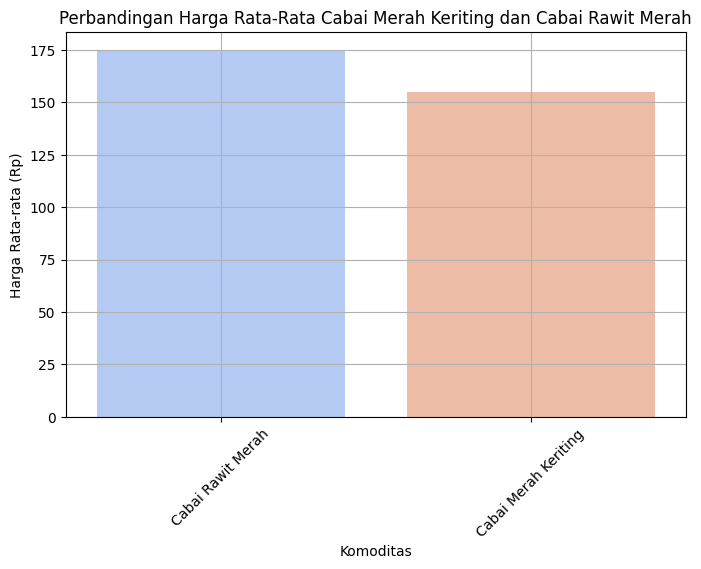

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


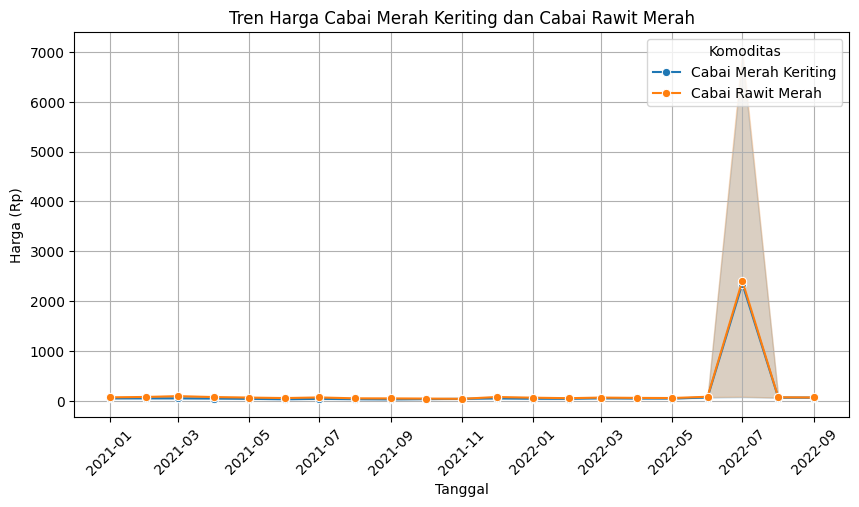

In [ ]:
# 2. Visualisasi Perbandingan Rata-Rata Harga Komoditas
plt.figure(figsize=(8, 5))
sns.barplot(data=average_prices.sort_values('Harga', ascending=False), x='Komoditas', y='Harga', palette='coolwarm')
plt.title('Perbandingan Harga Rata-Rata Cabai Merah Keriting dan Cabai Rawit Merah')
plt.xlabel('Komoditas')
plt.ylabel('Harga Rata-rata (Rp)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 3. Visualisasi Tren Harga untuk Komoditas Terpilih
plt.figure(figsize=(10, 5))
sns.lineplot(data=filtered_data, x='Tanggal', y='Harga', hue='Komoditas', marker='o')
plt.title('Tren Harga Cabai Merah Keriting dan Cabai Rawit Merah')
plt.xlabel('Tanggal')
plt.ylabel('Harga (Rp)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

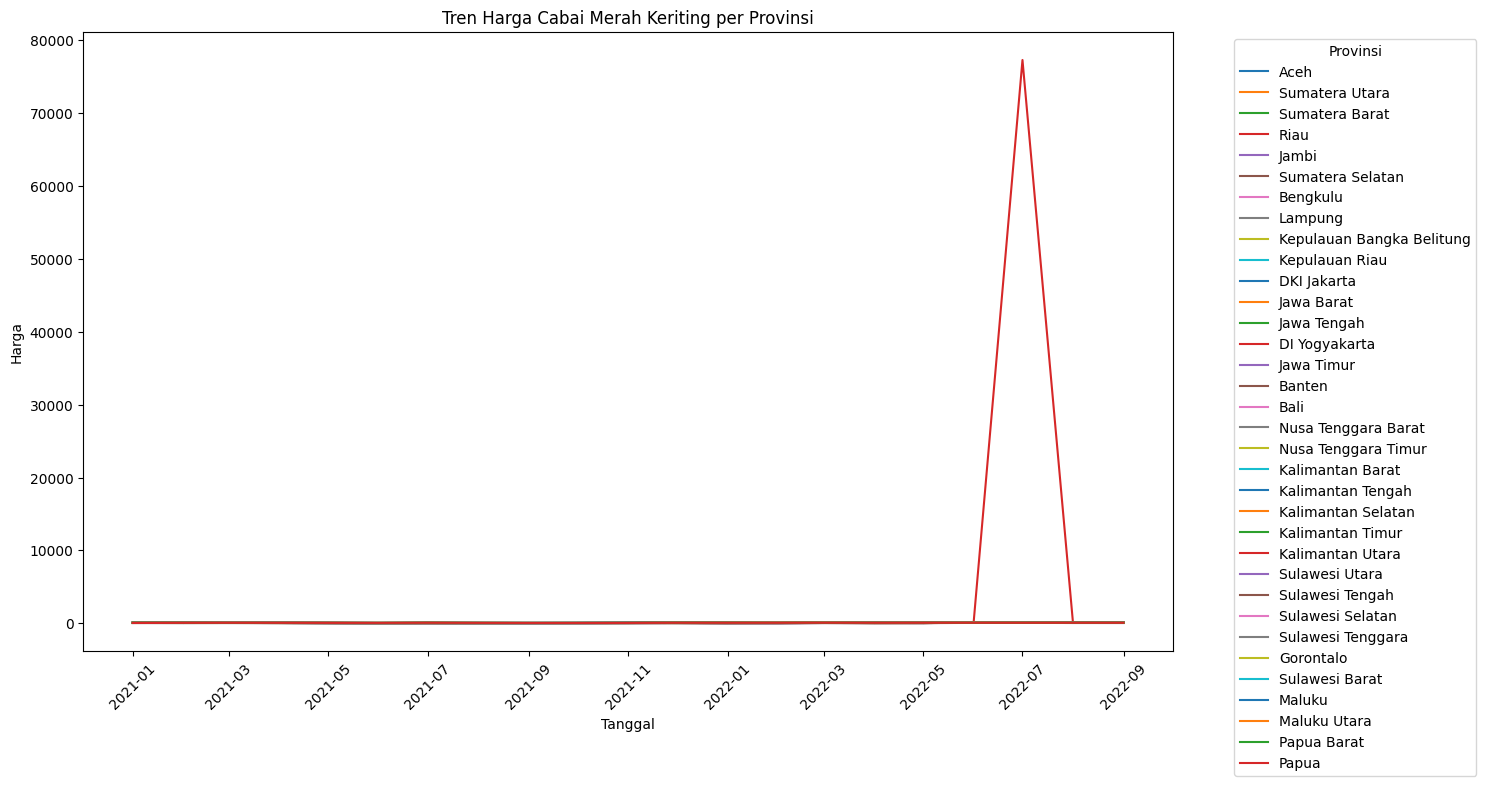

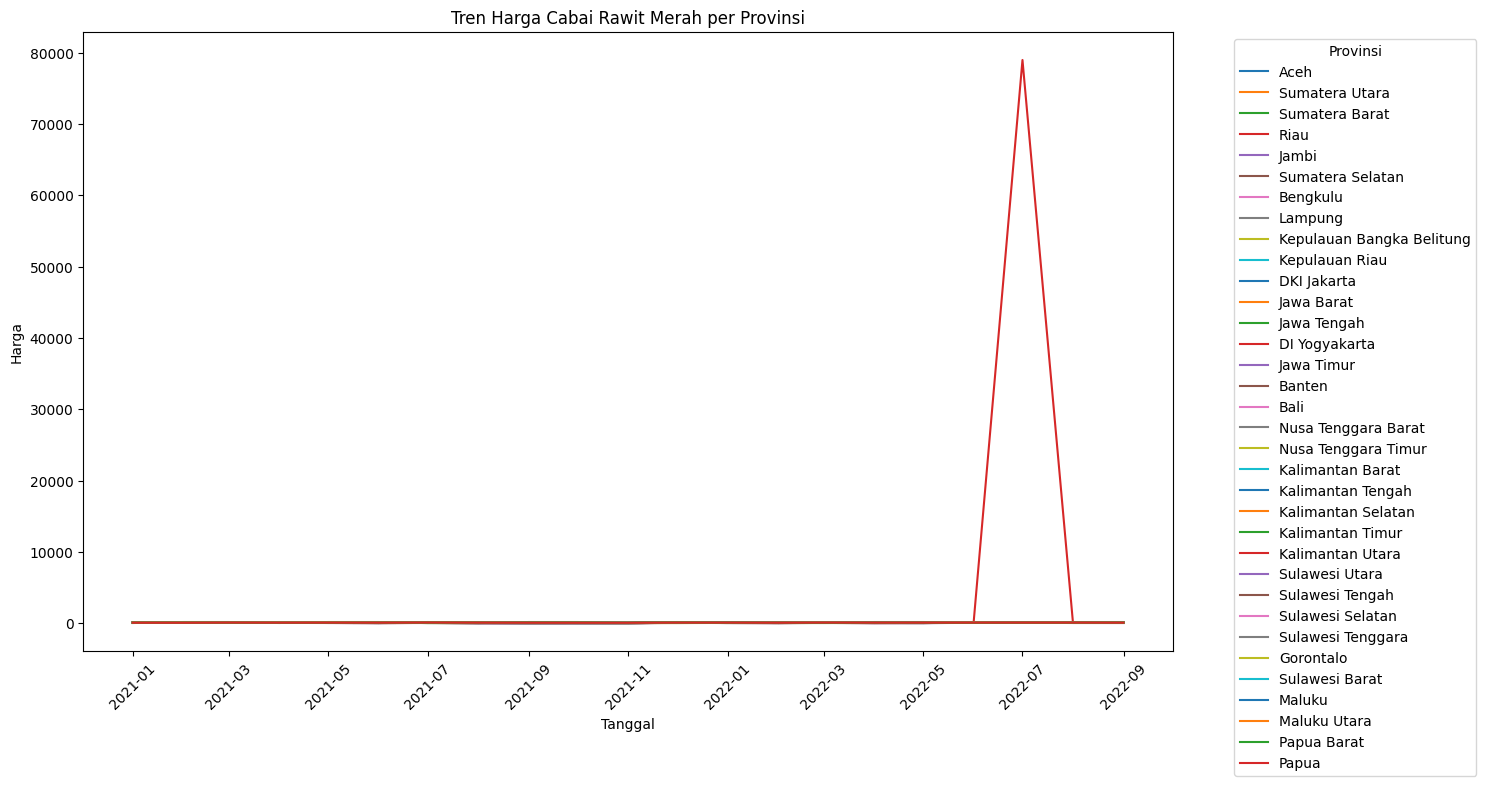

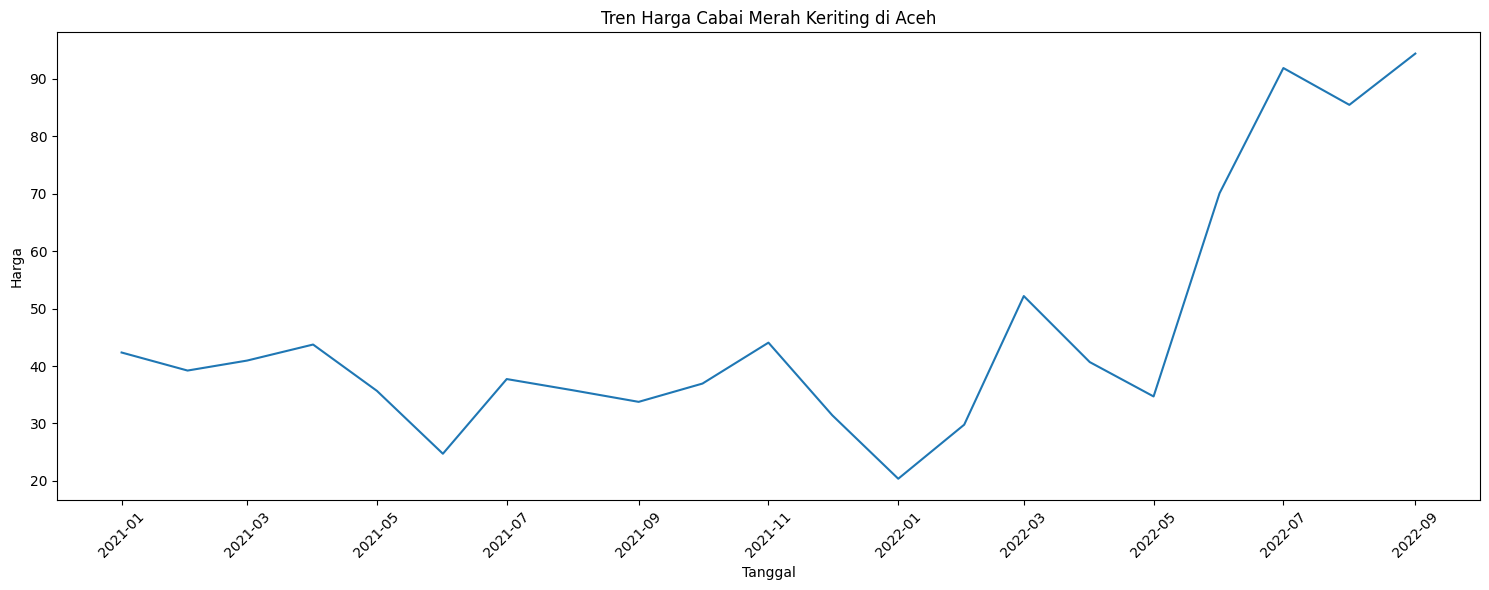

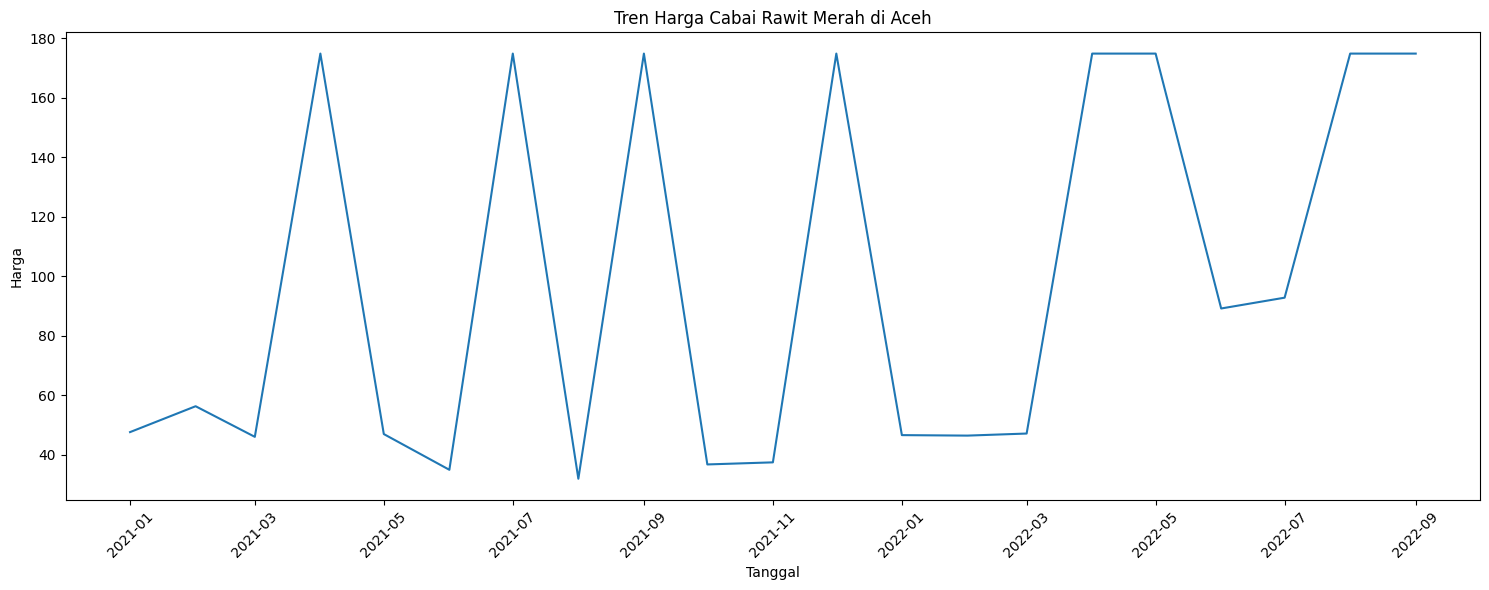

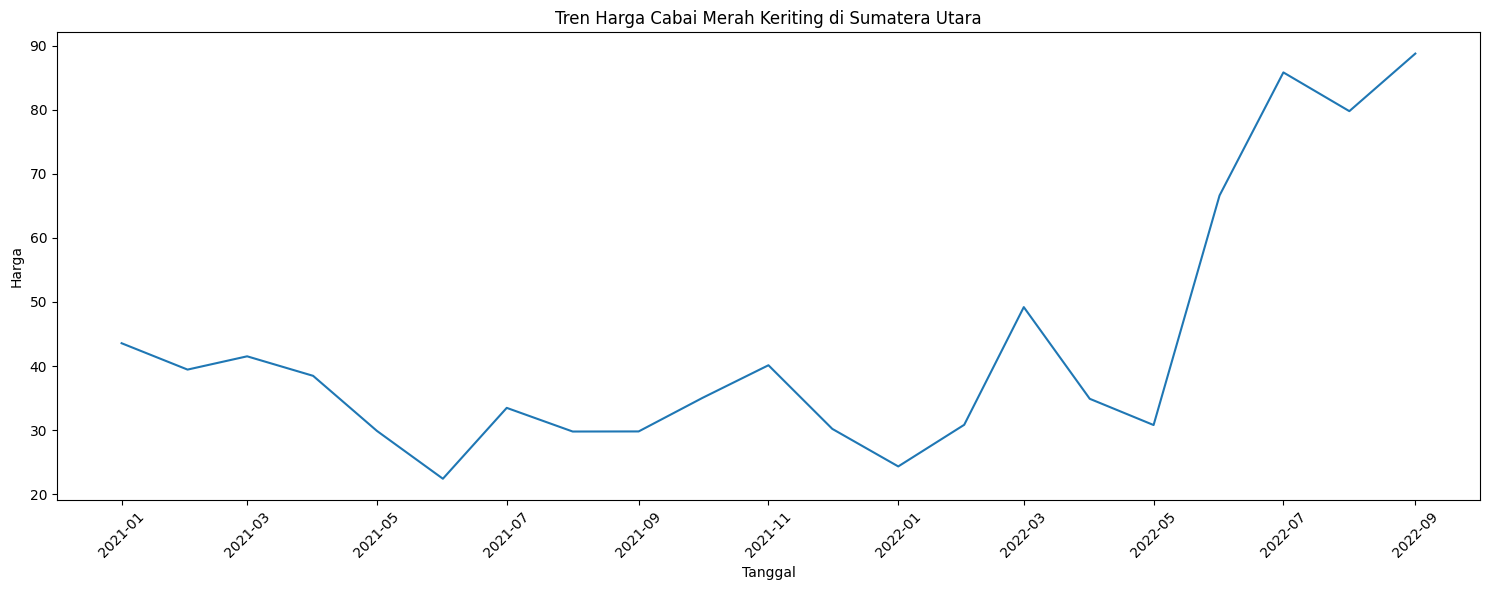

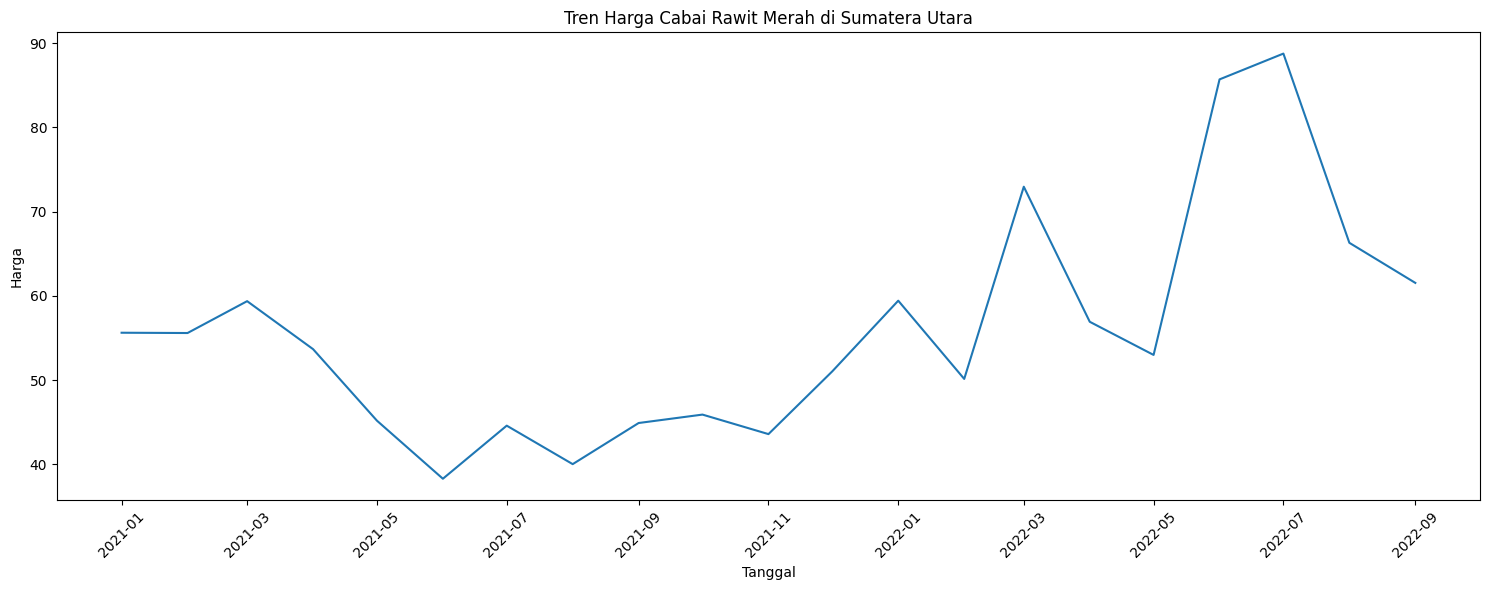

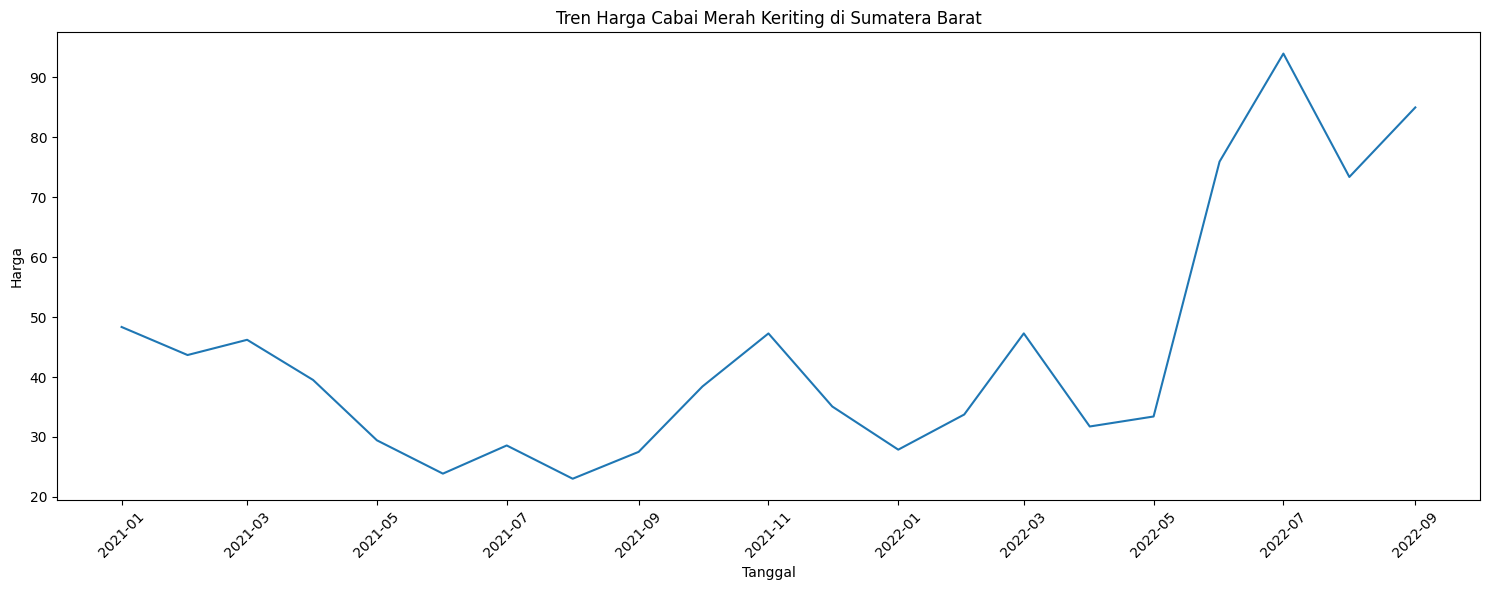

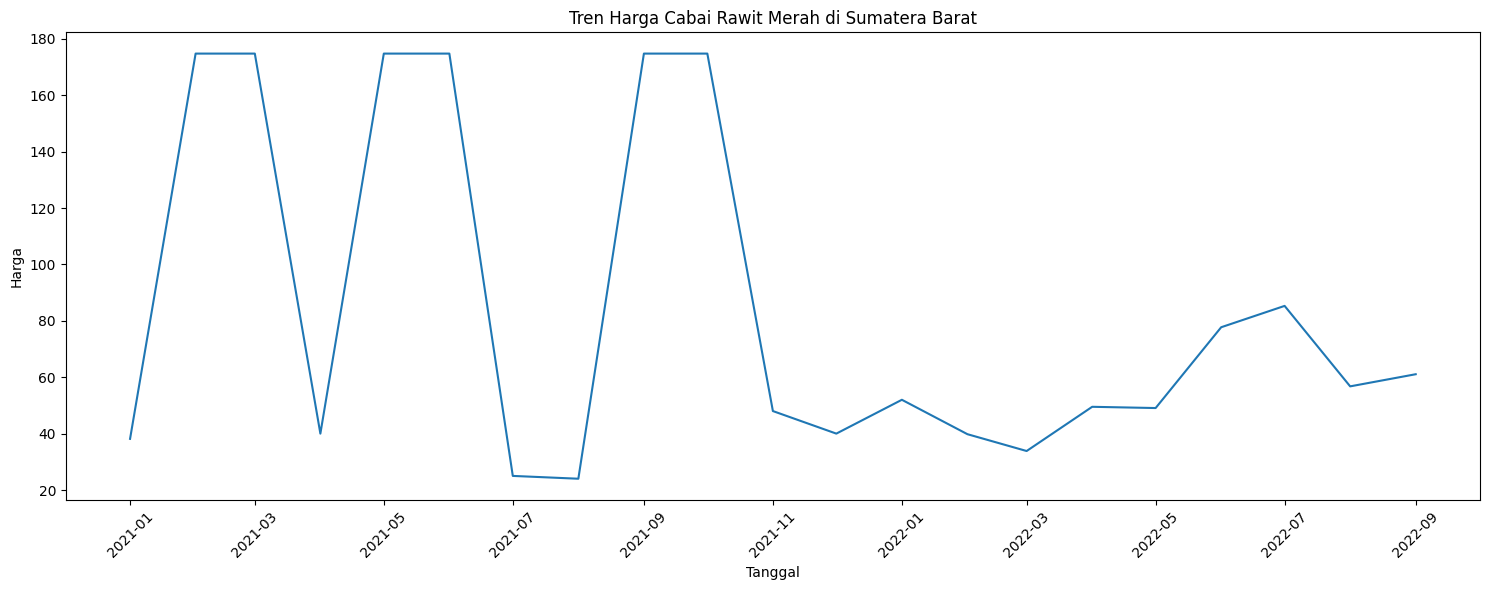

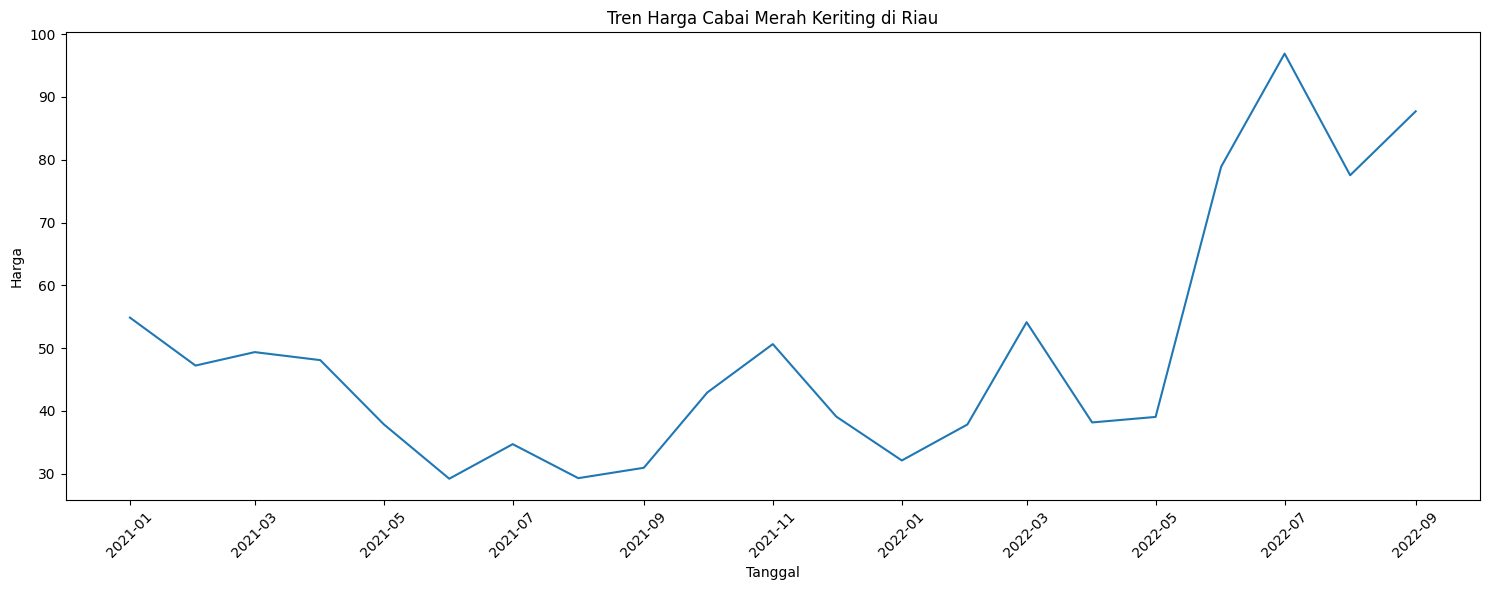

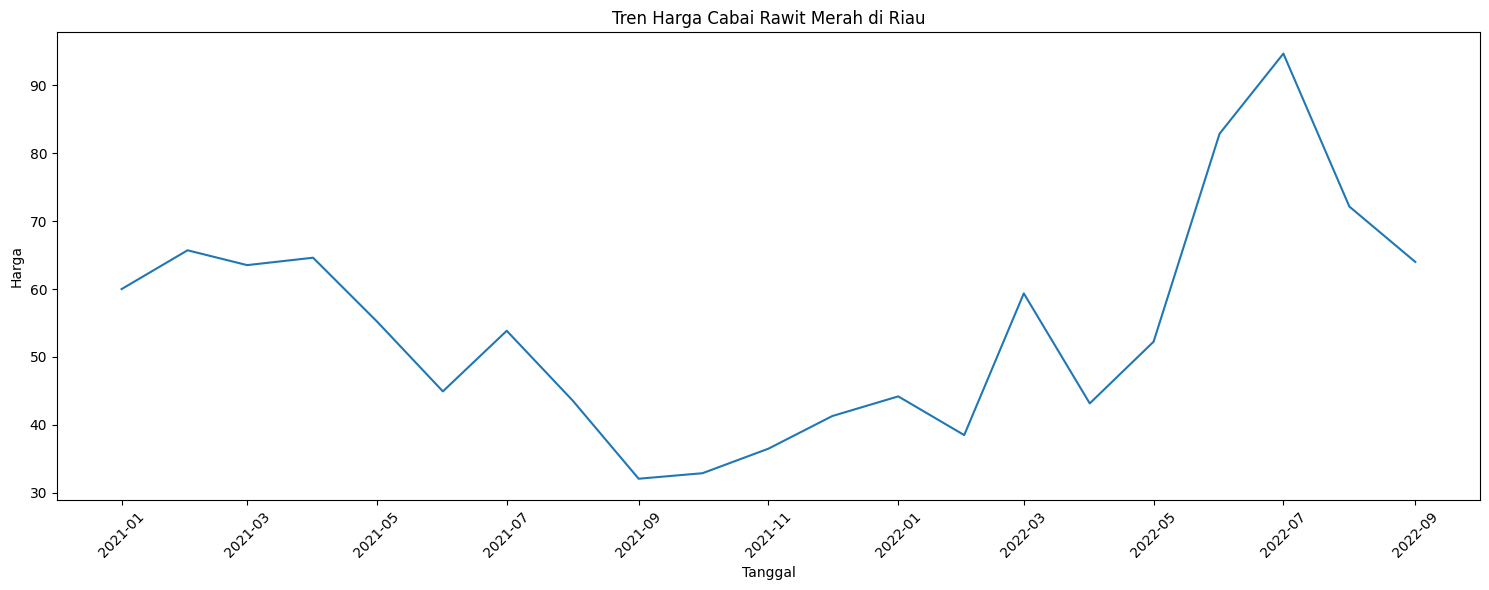

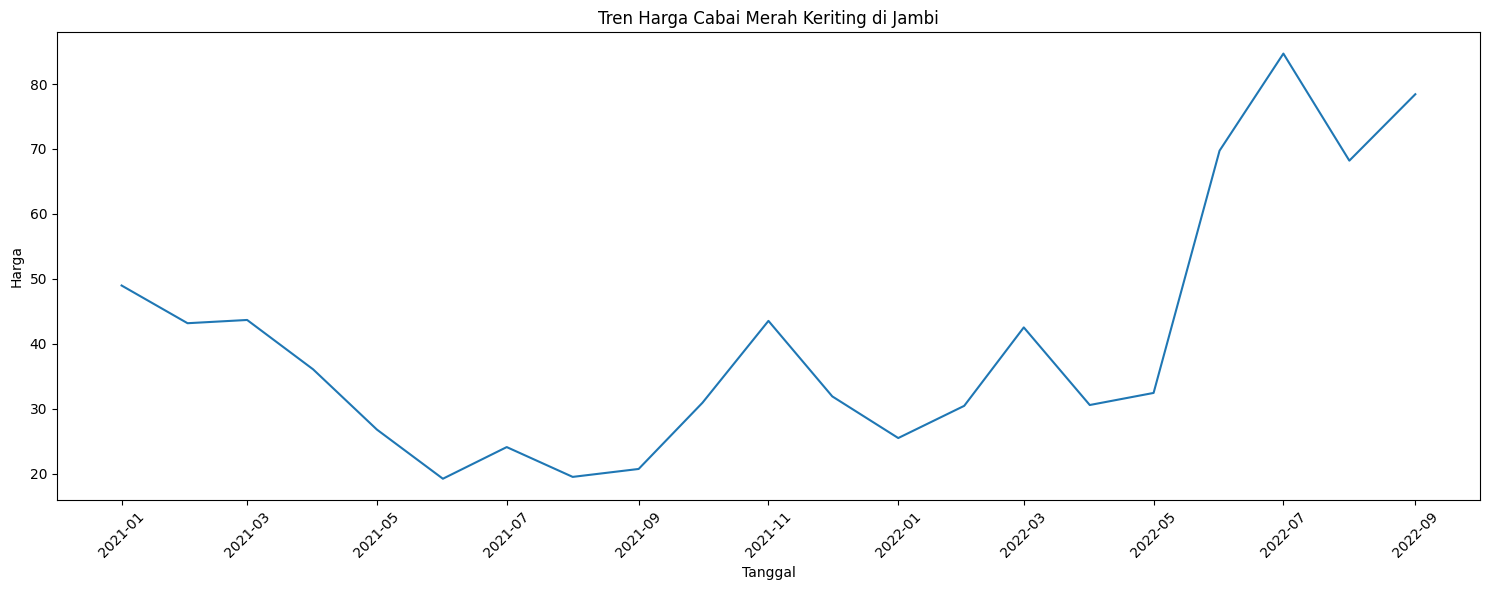

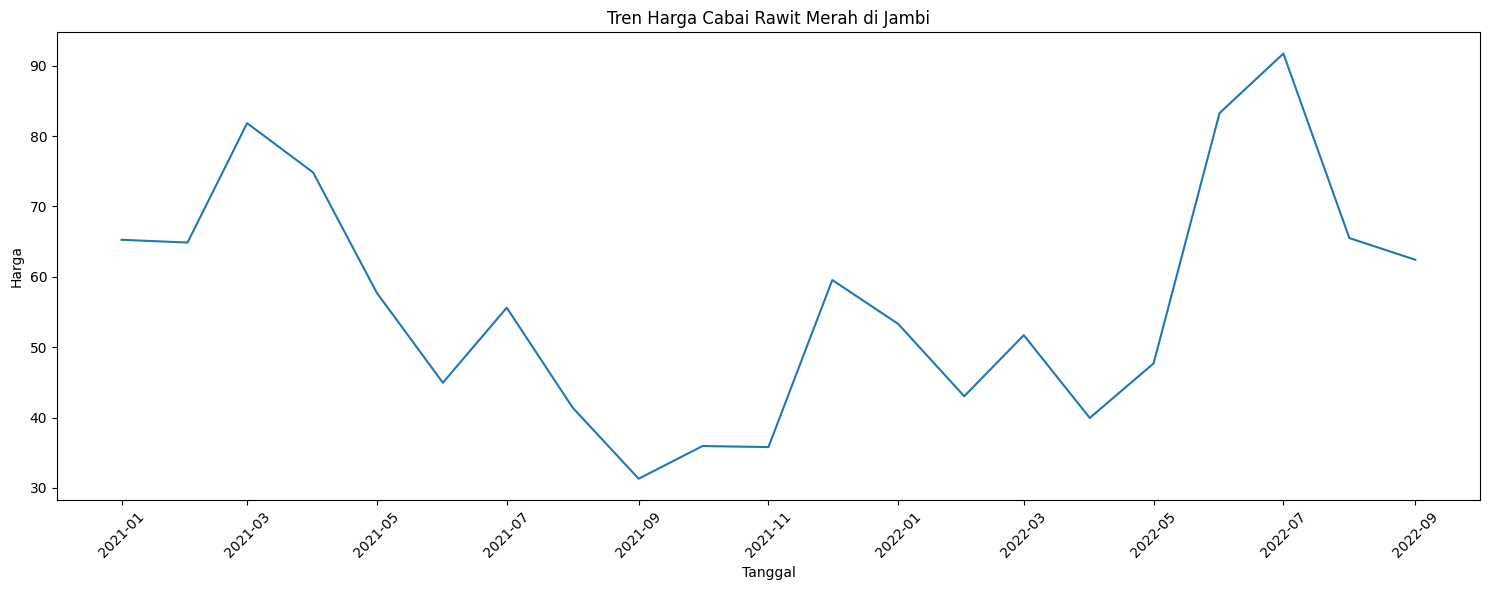

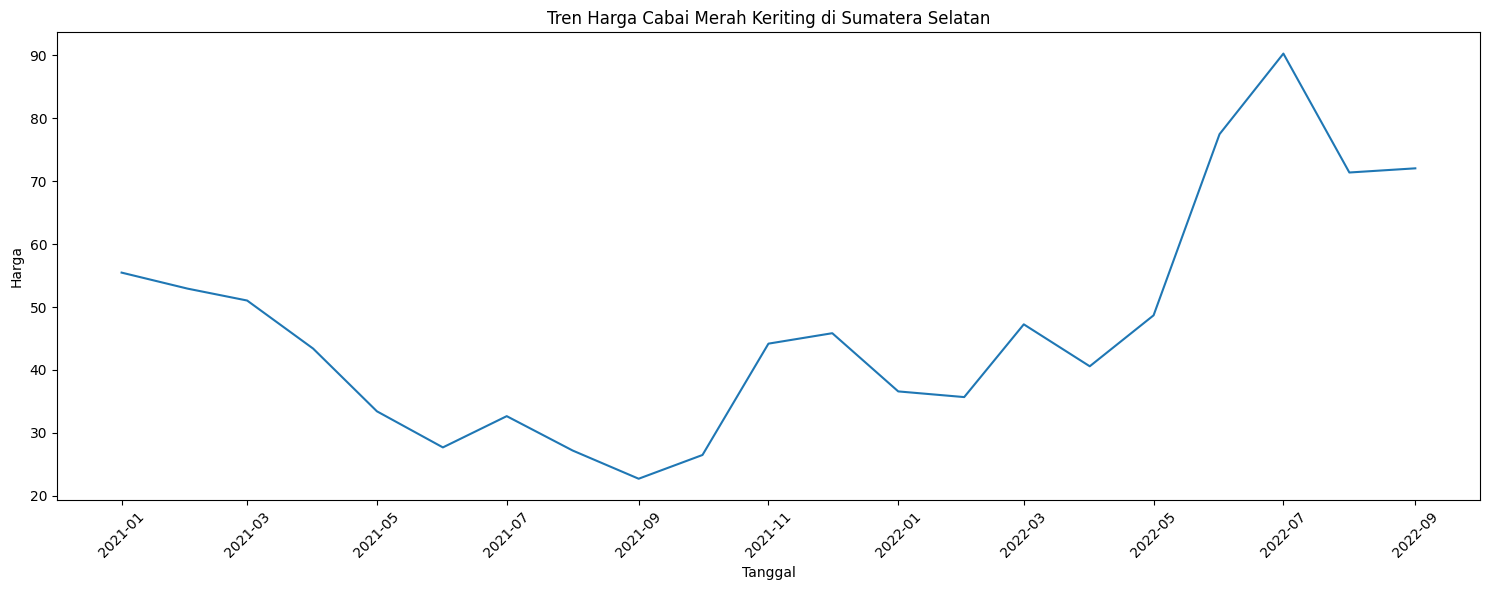

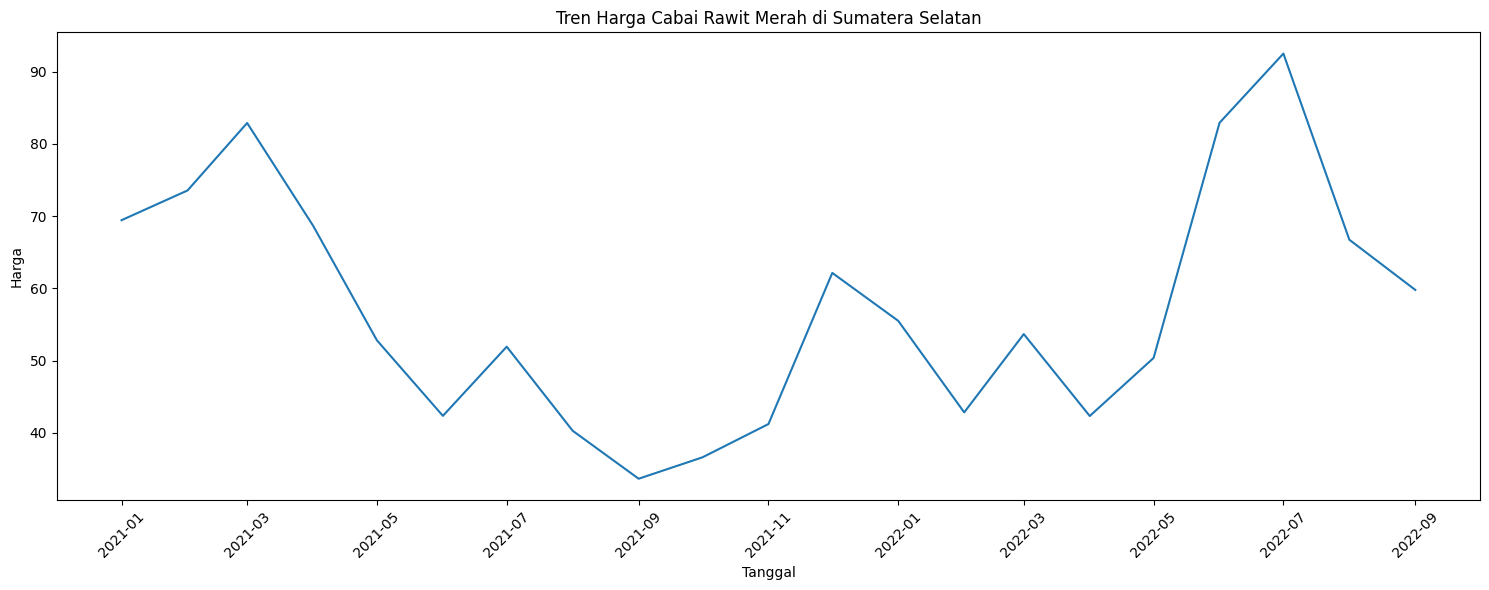

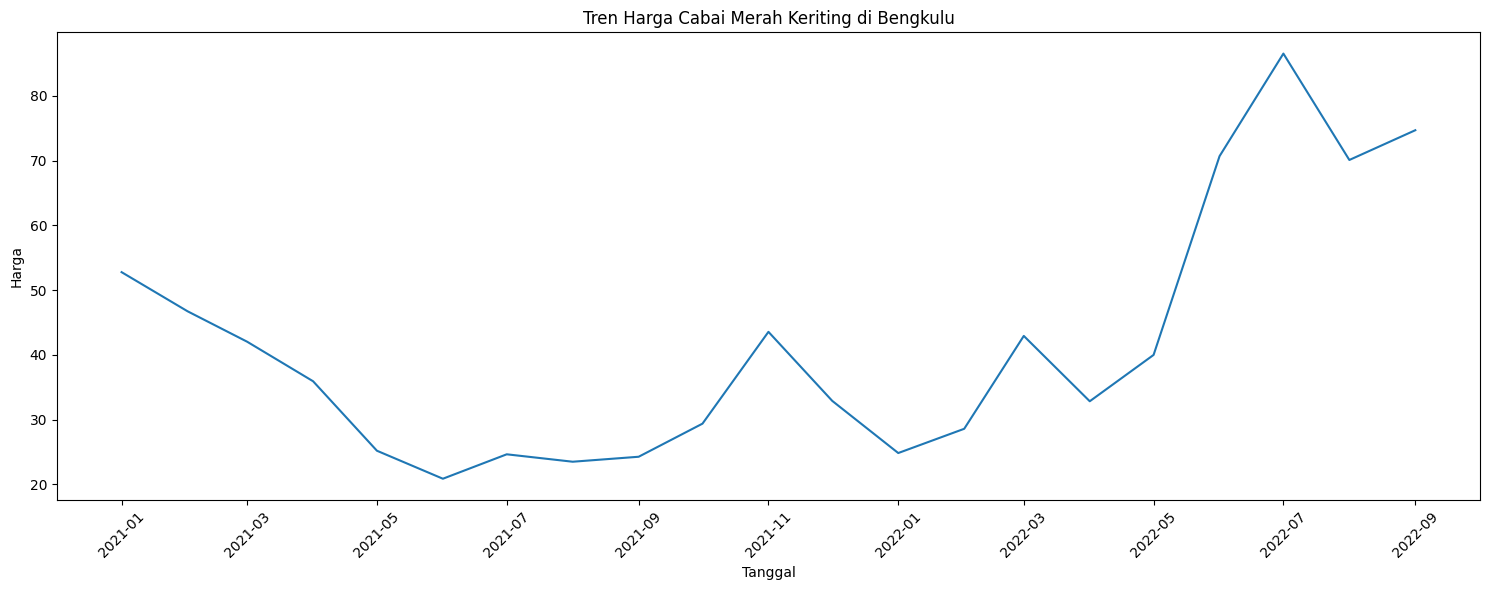

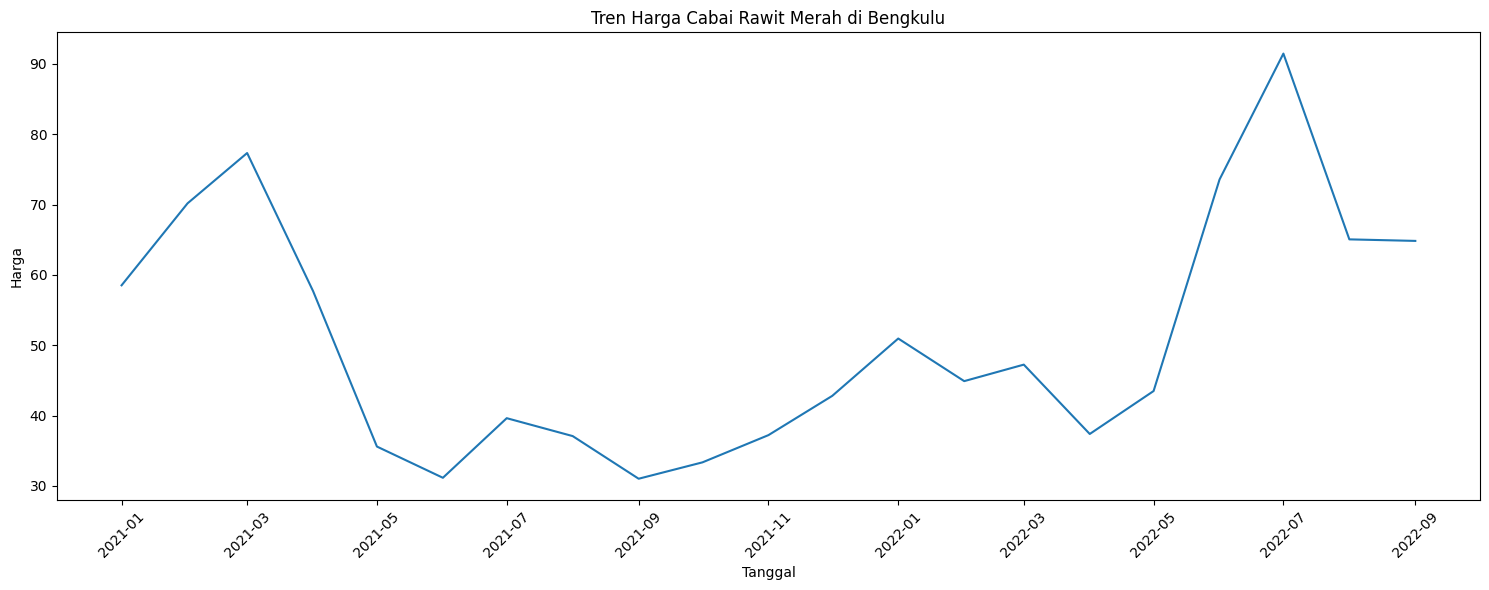

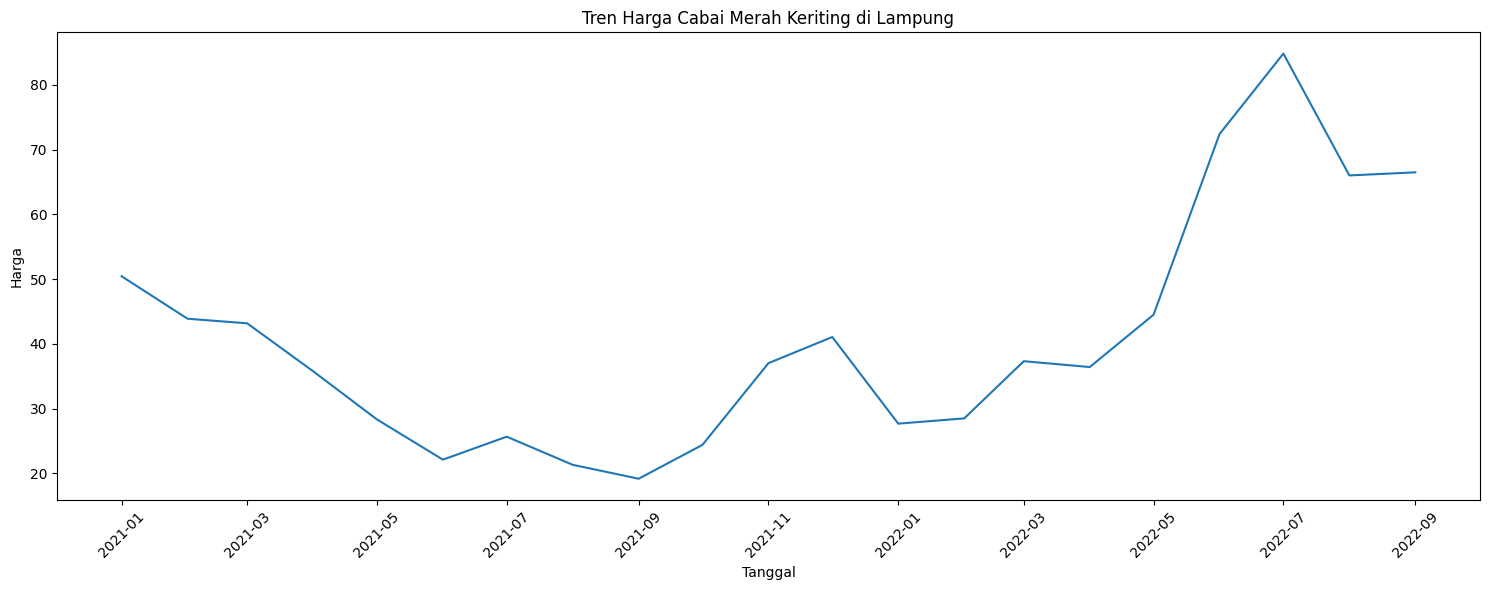

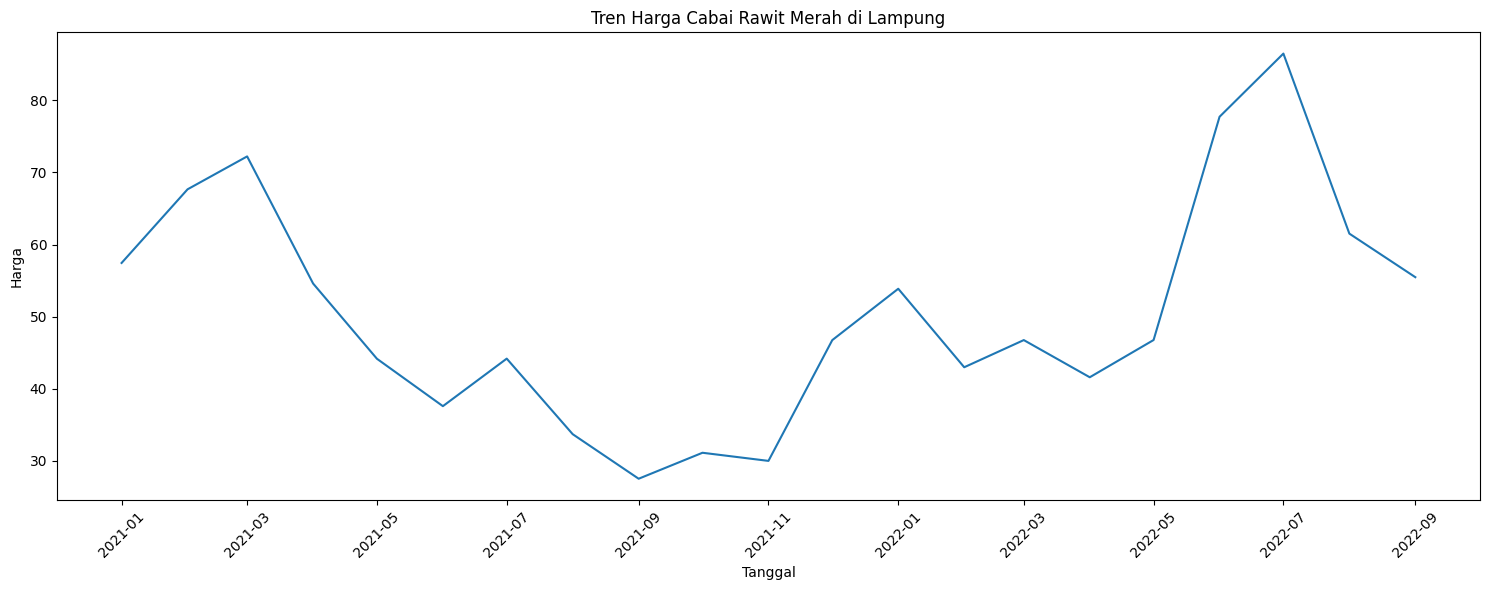

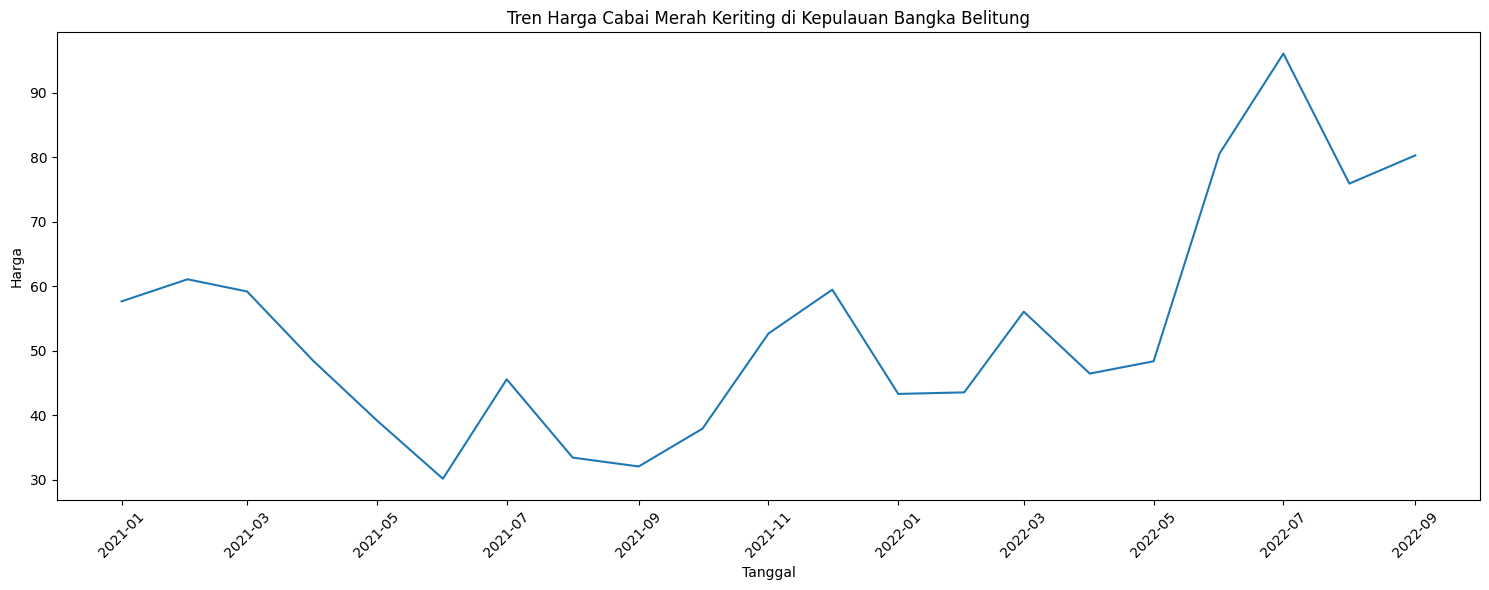

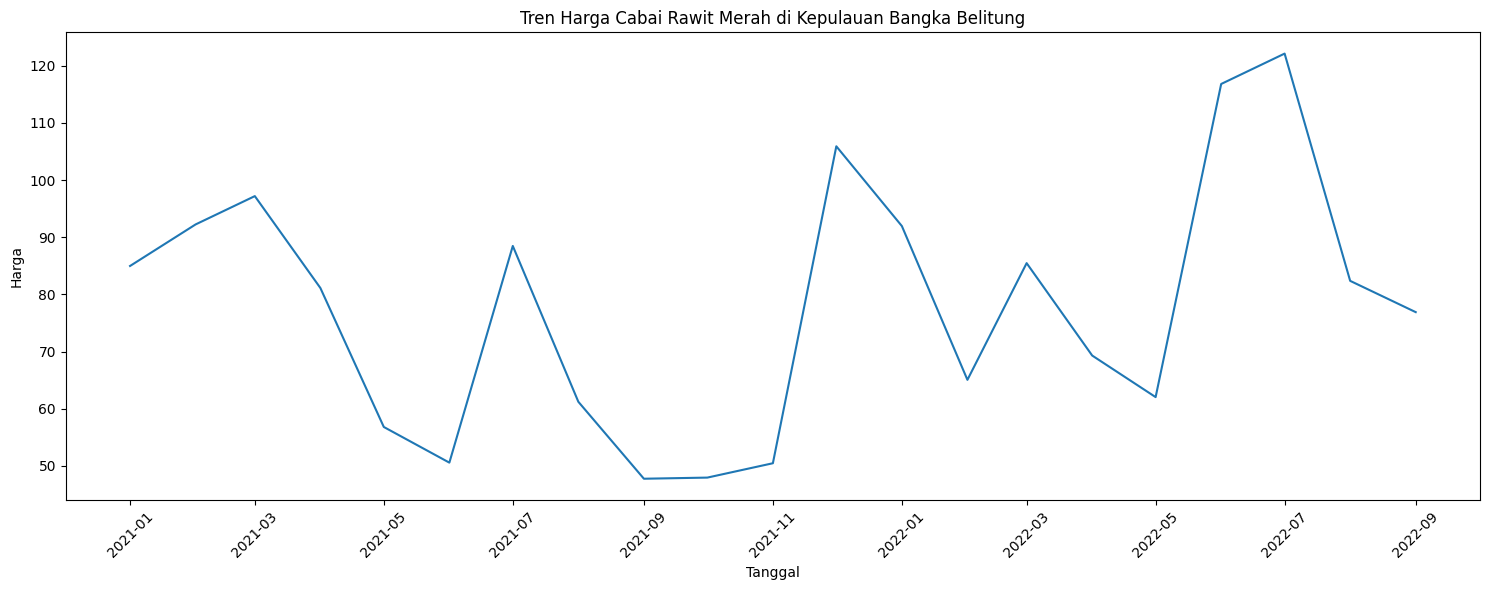

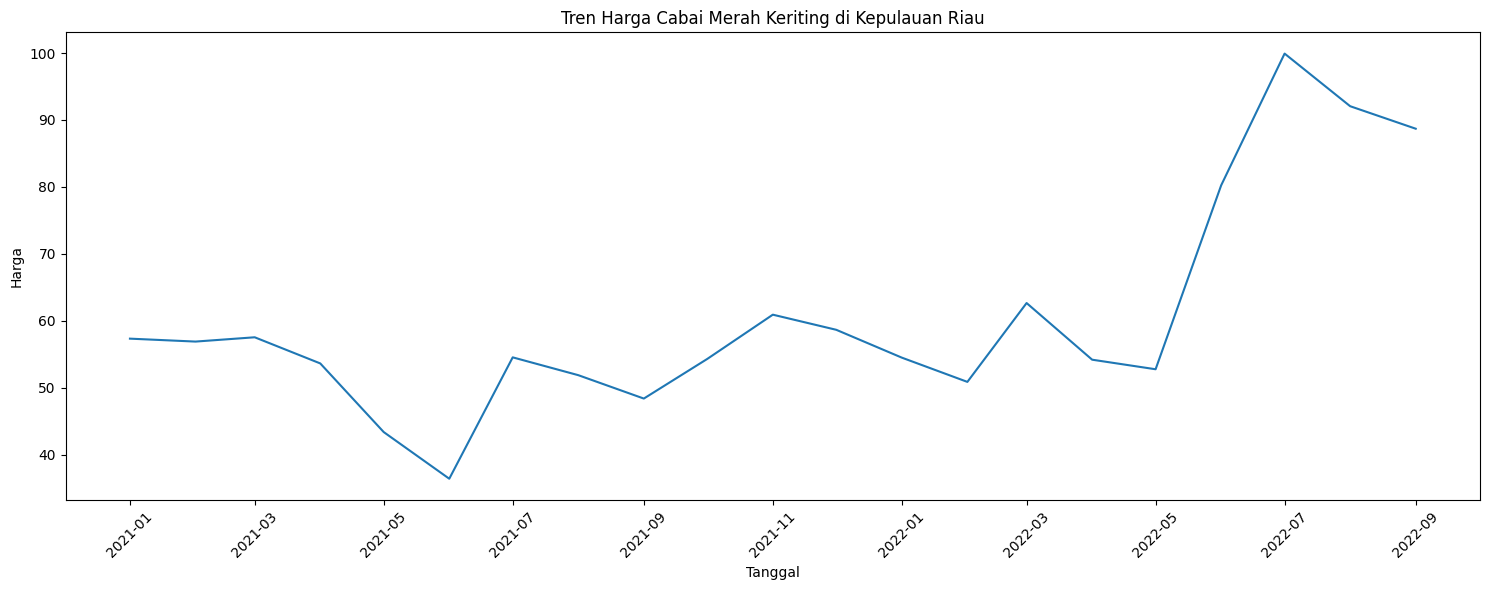

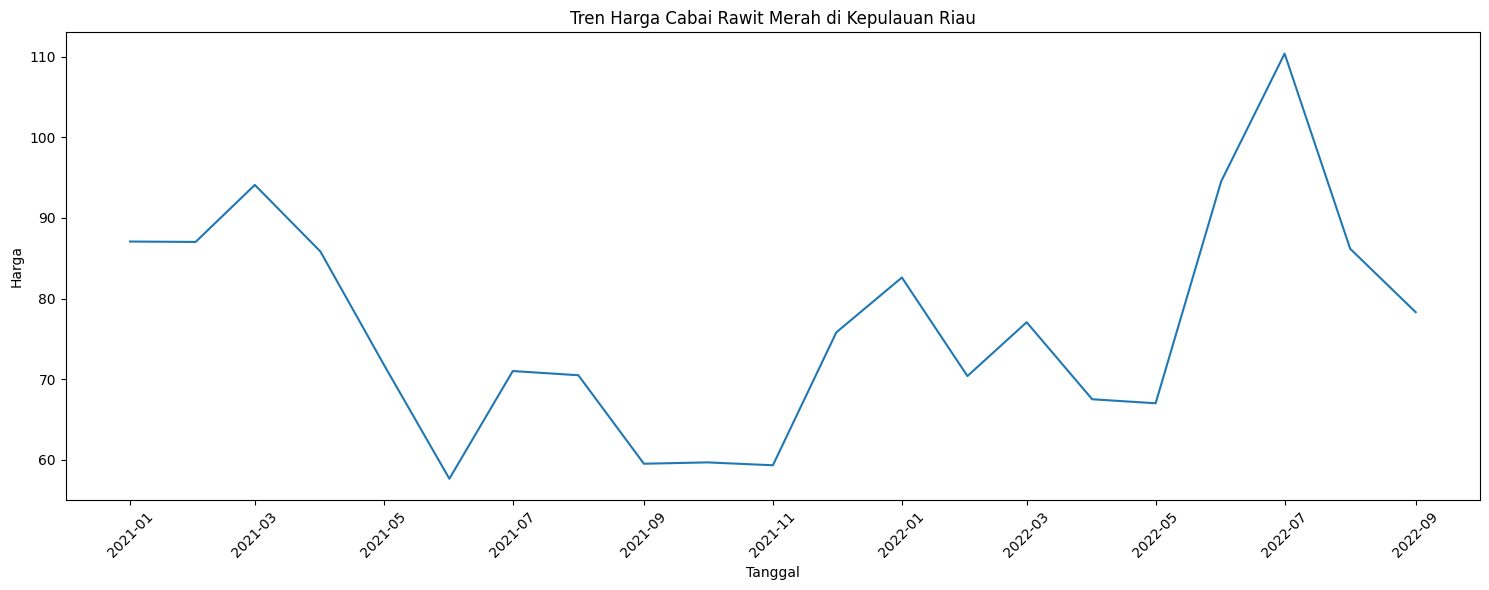

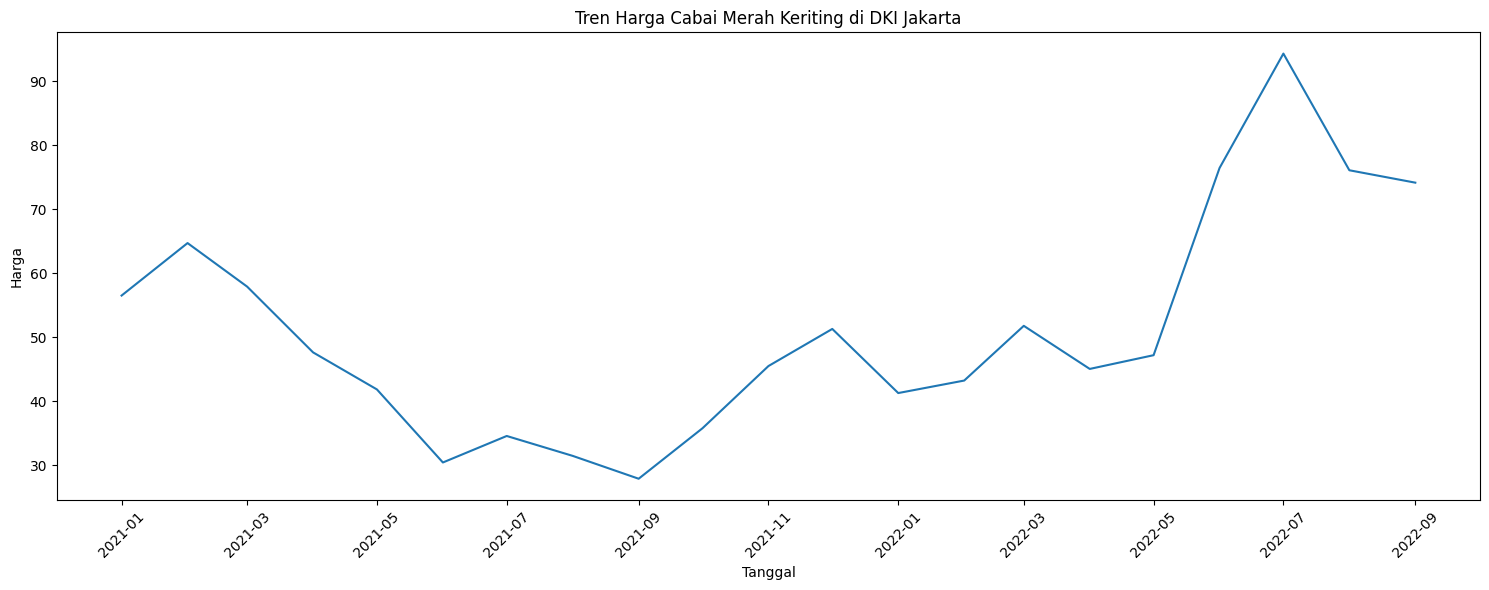

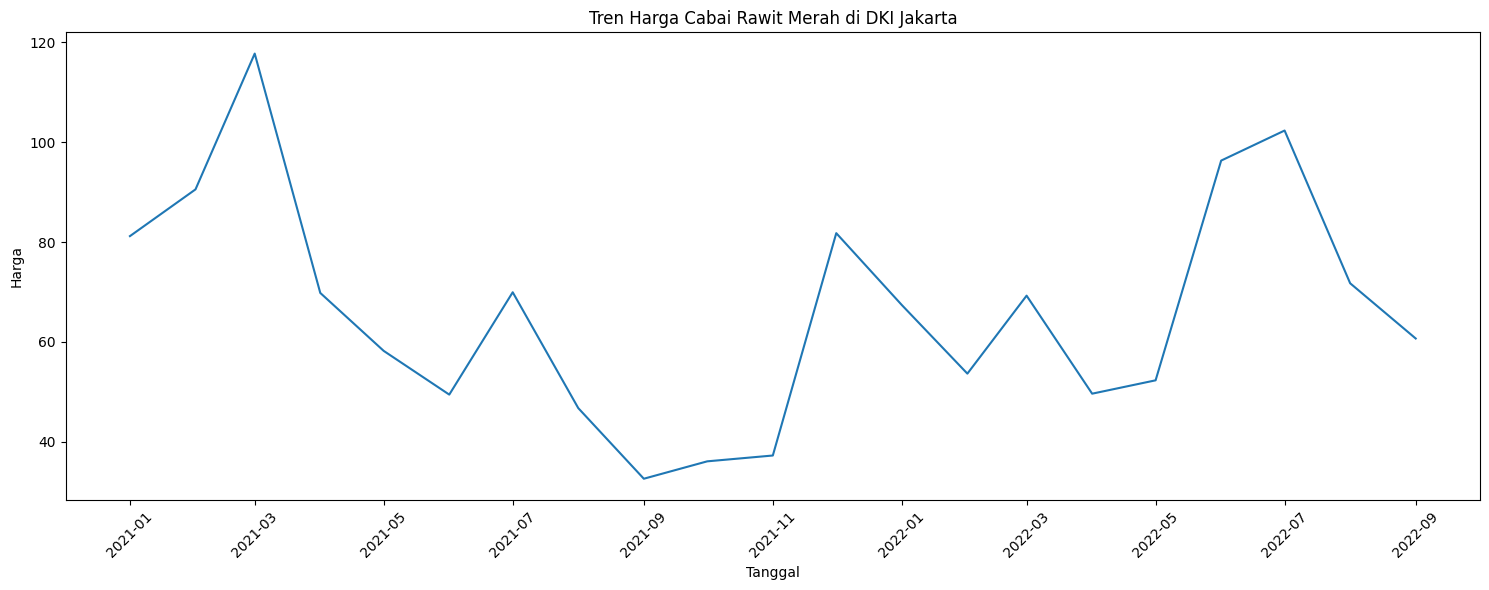

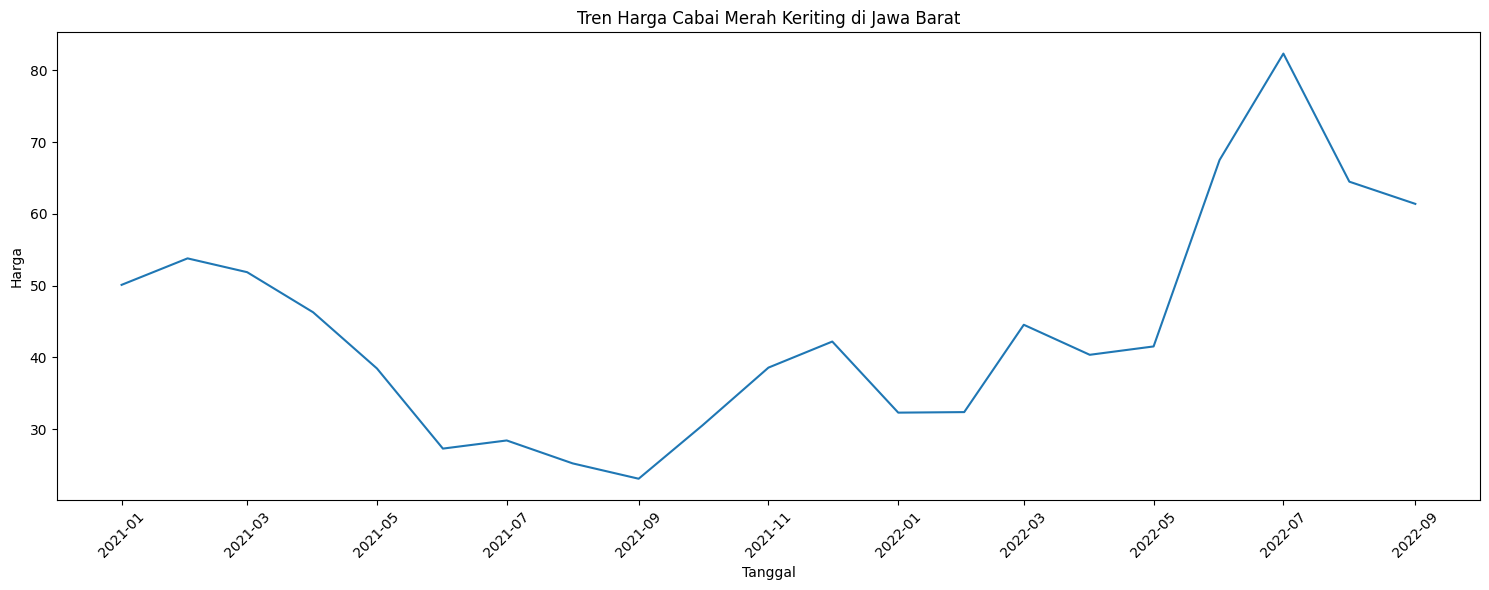

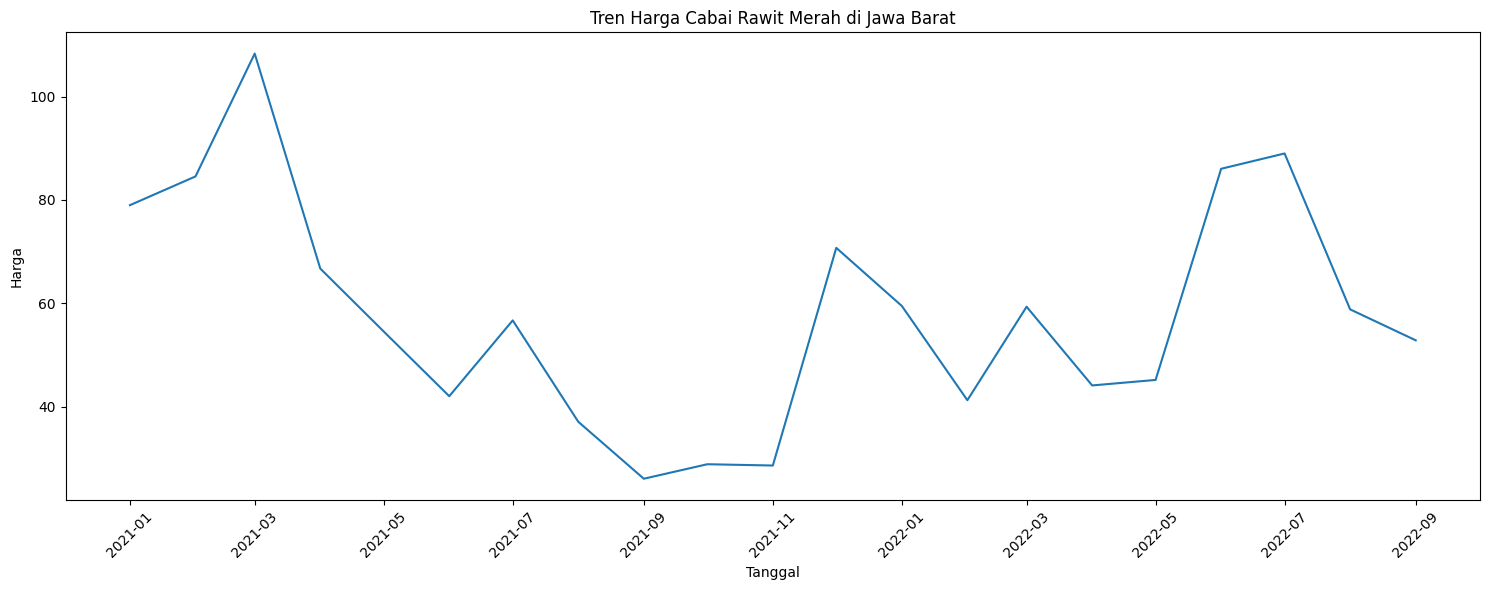

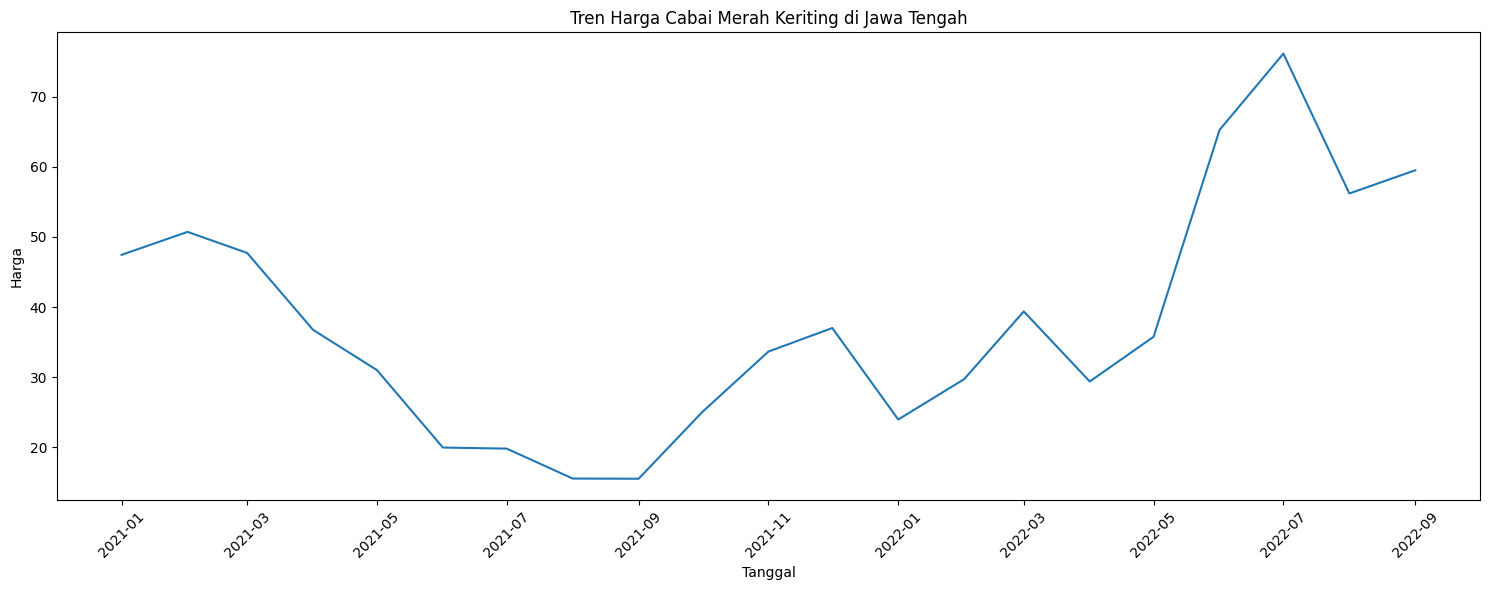

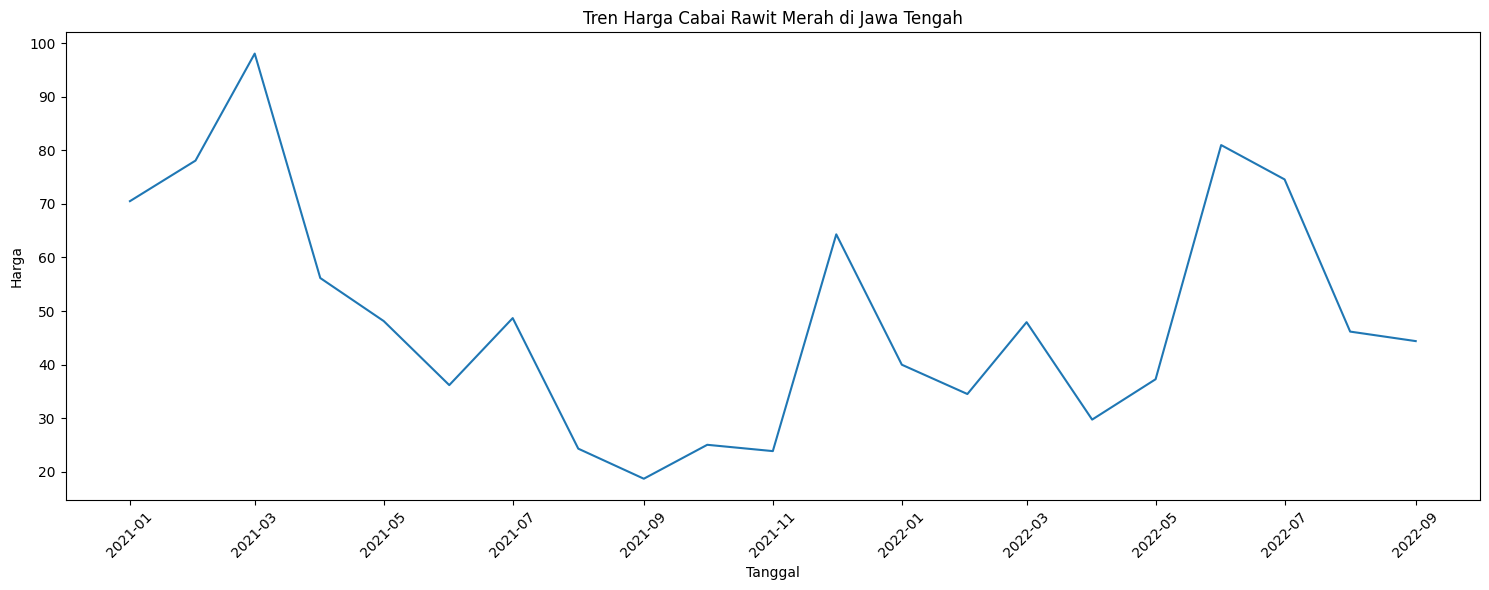

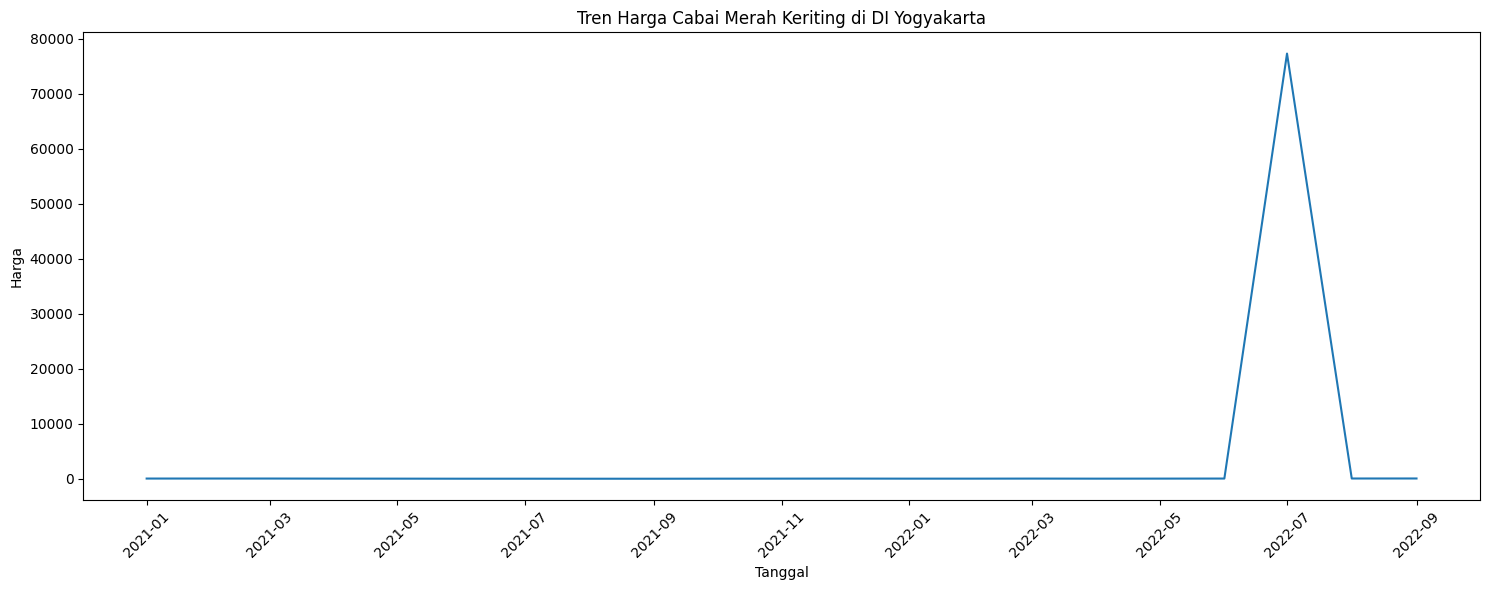

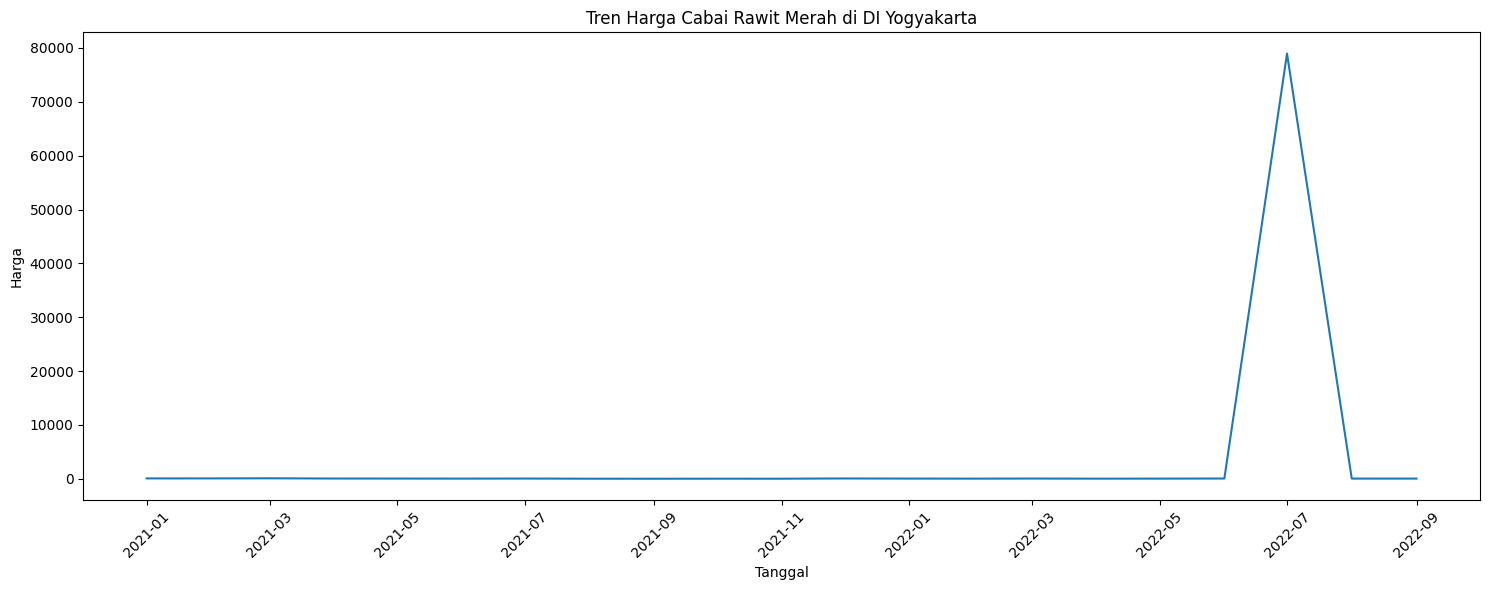

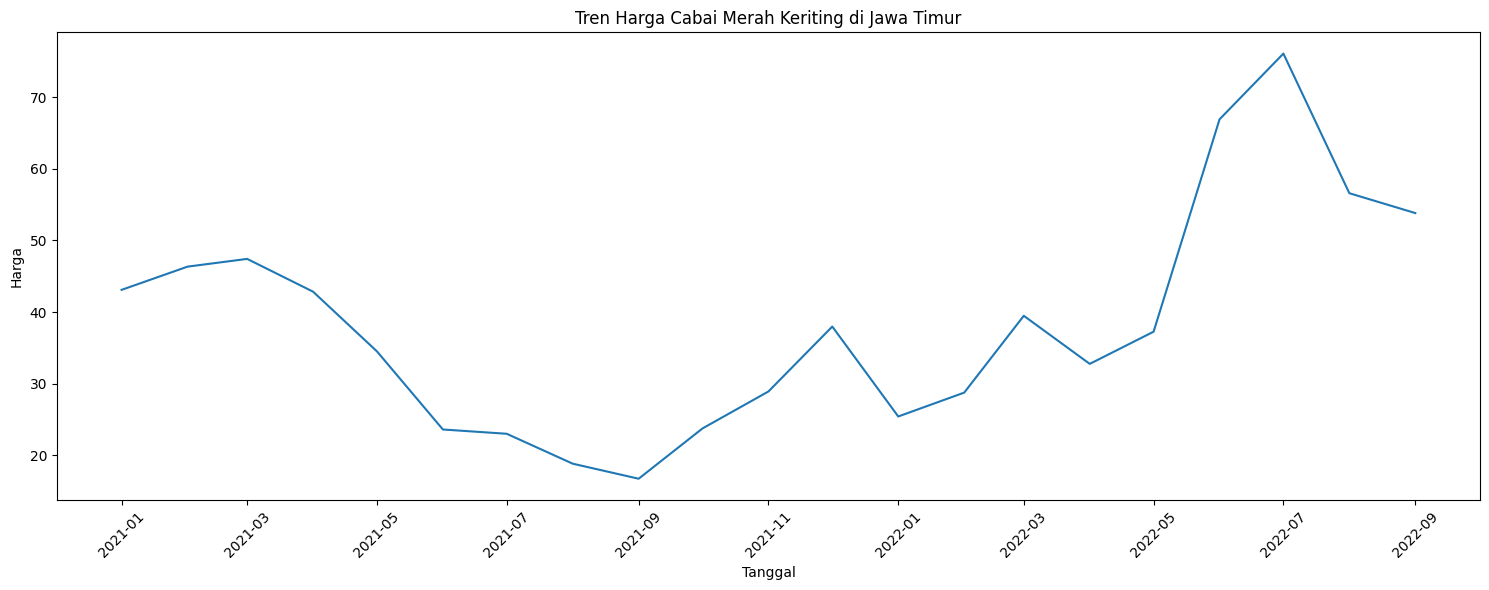

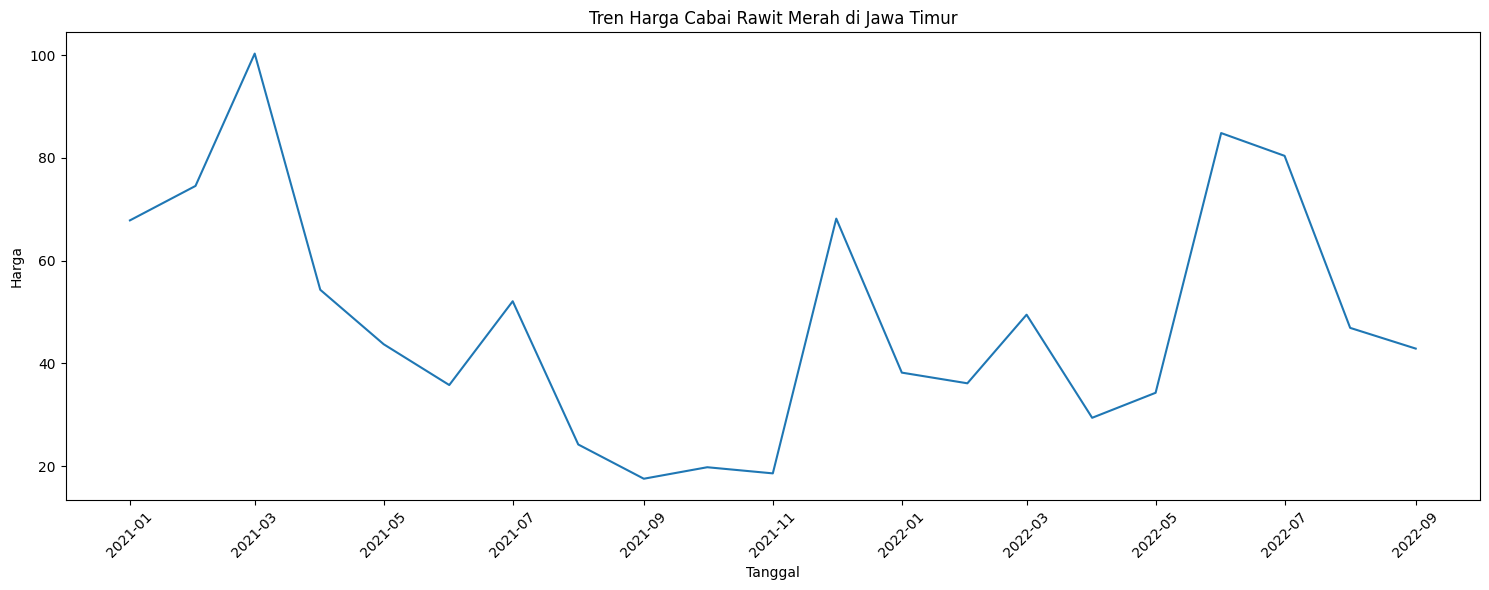

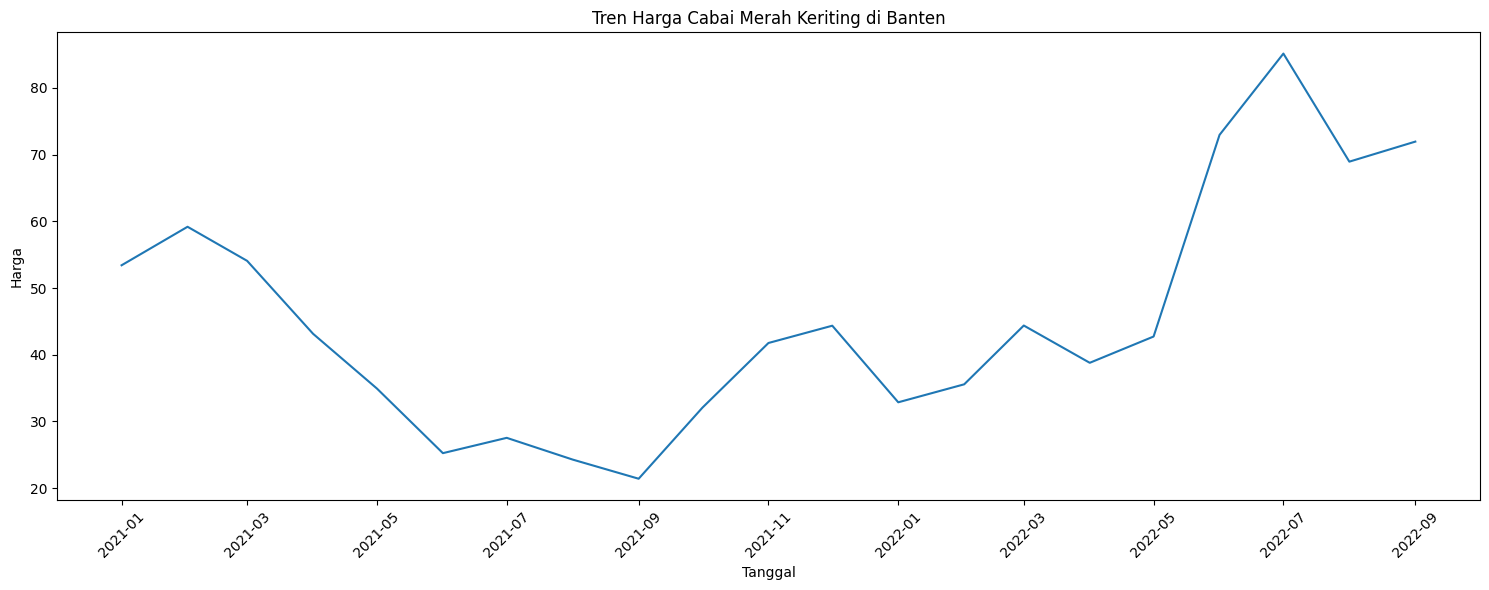

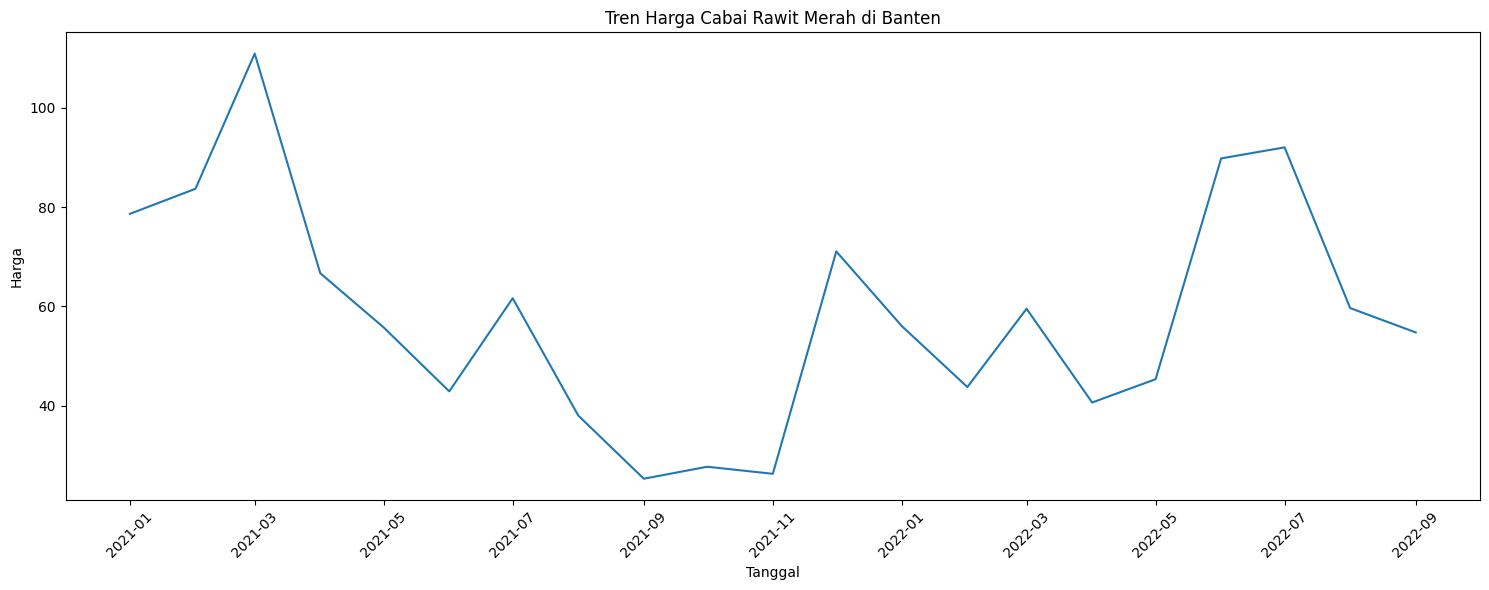

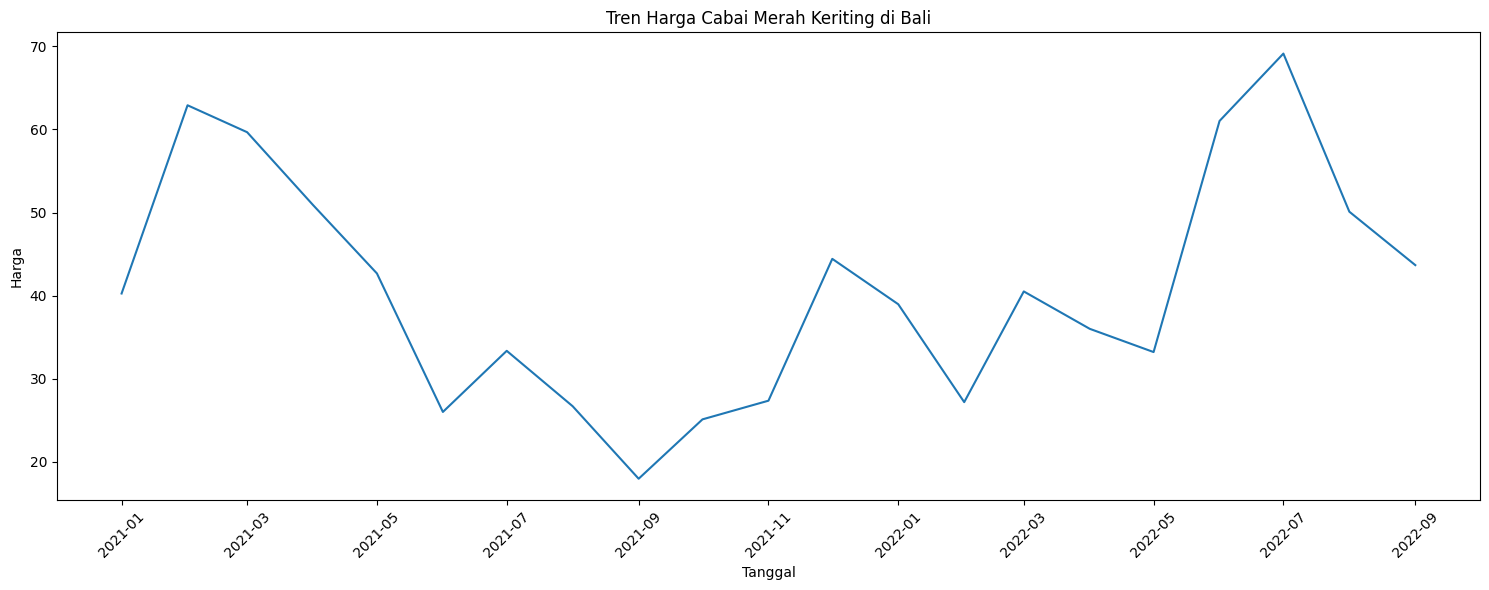

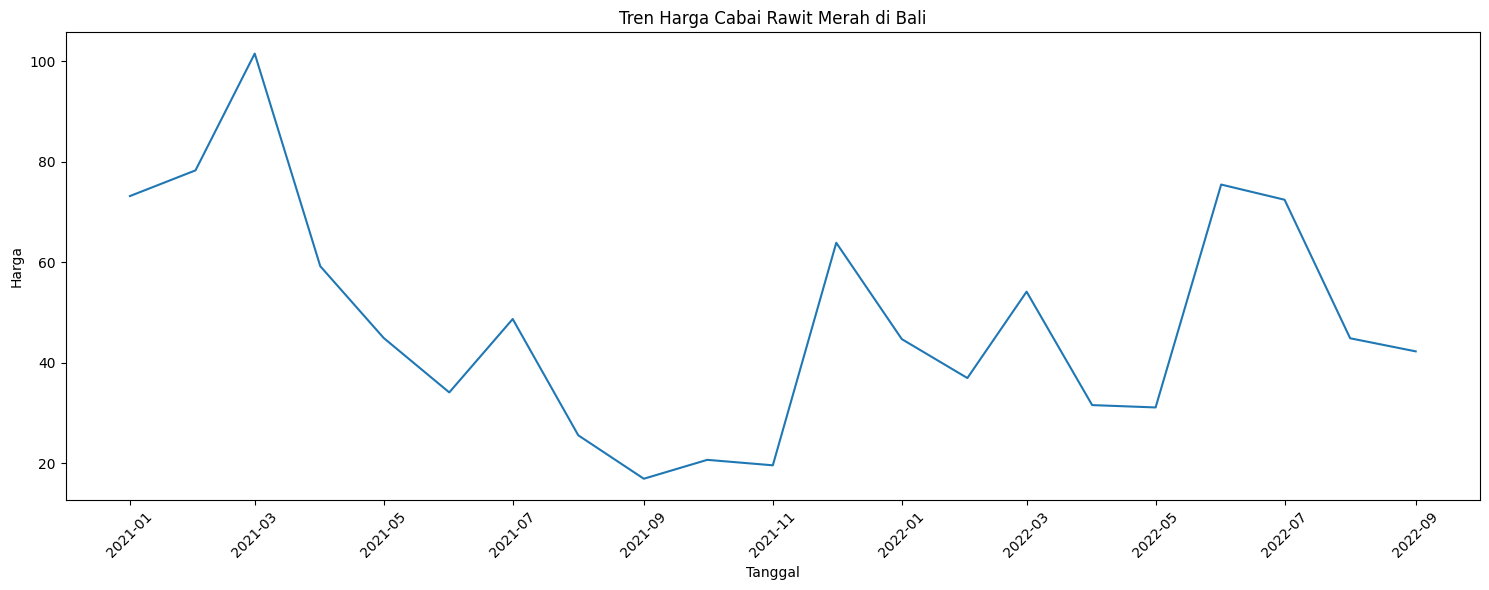

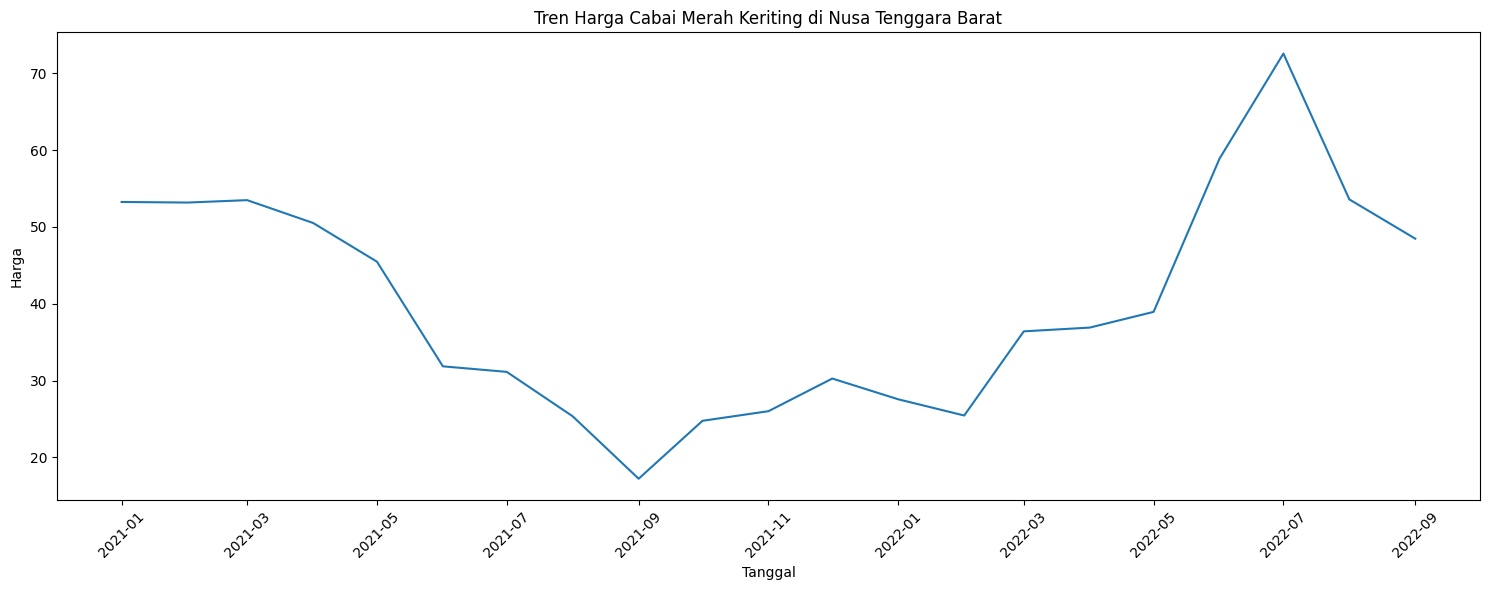

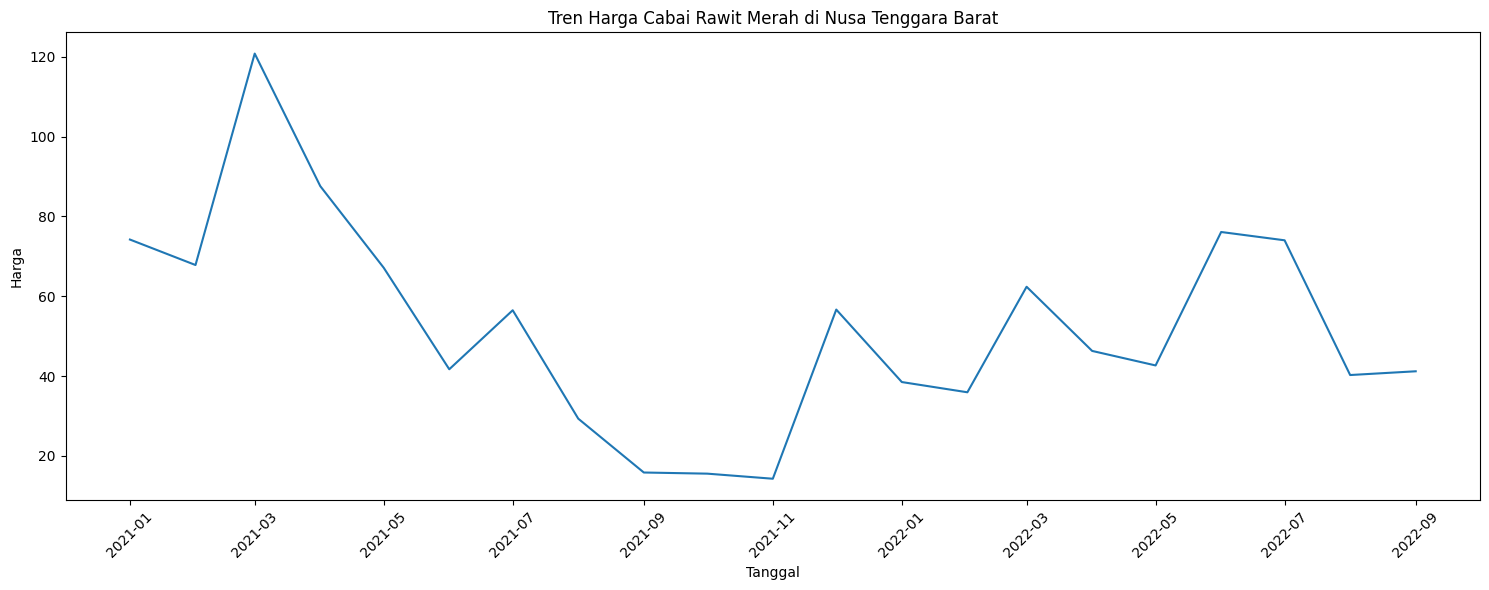

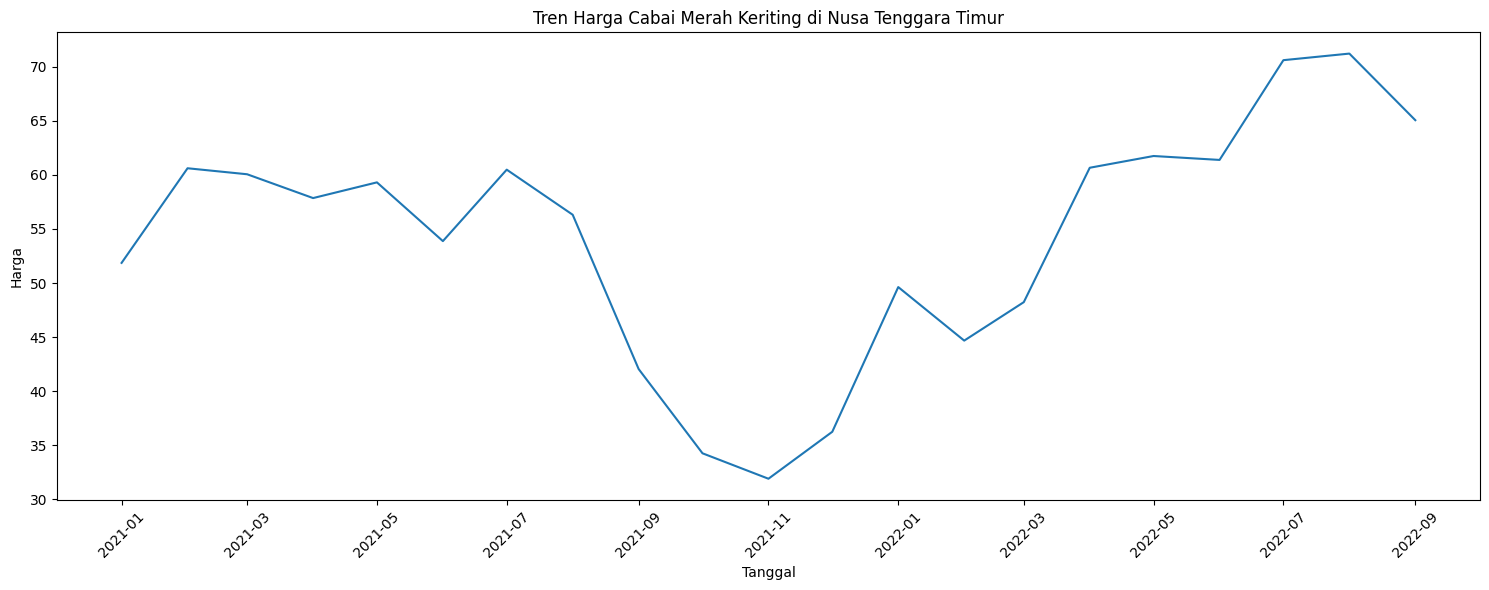

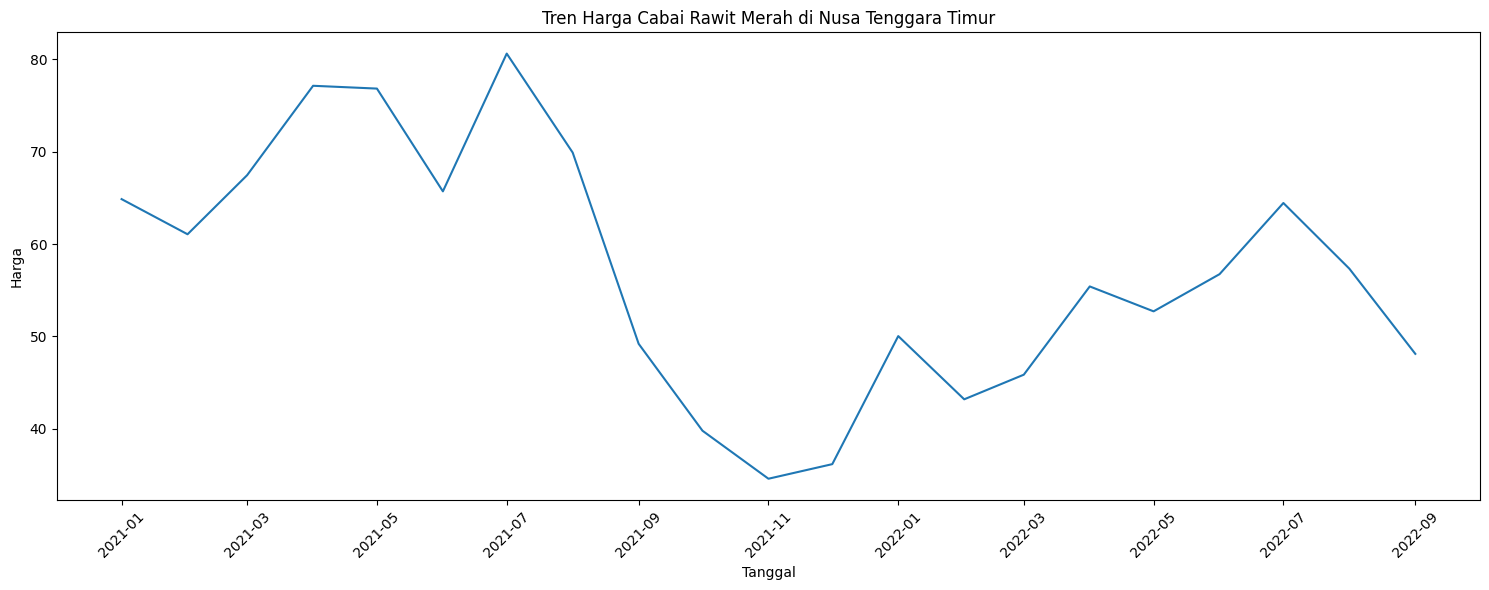

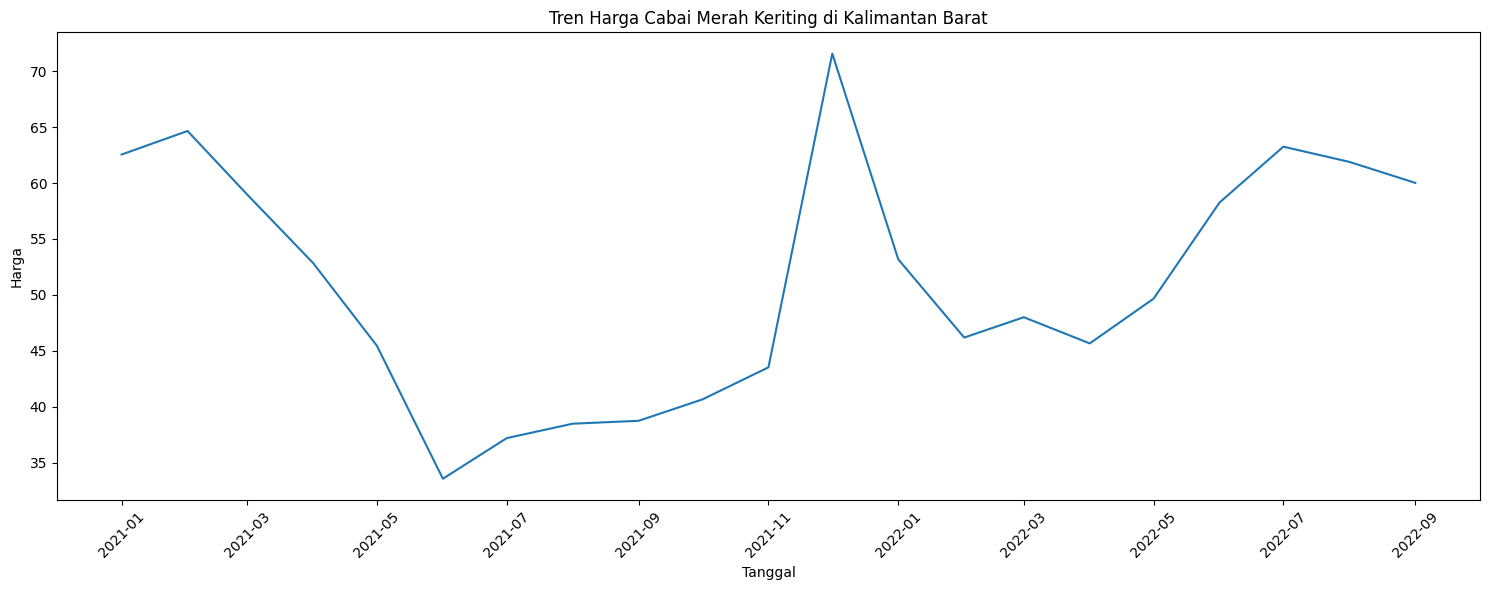

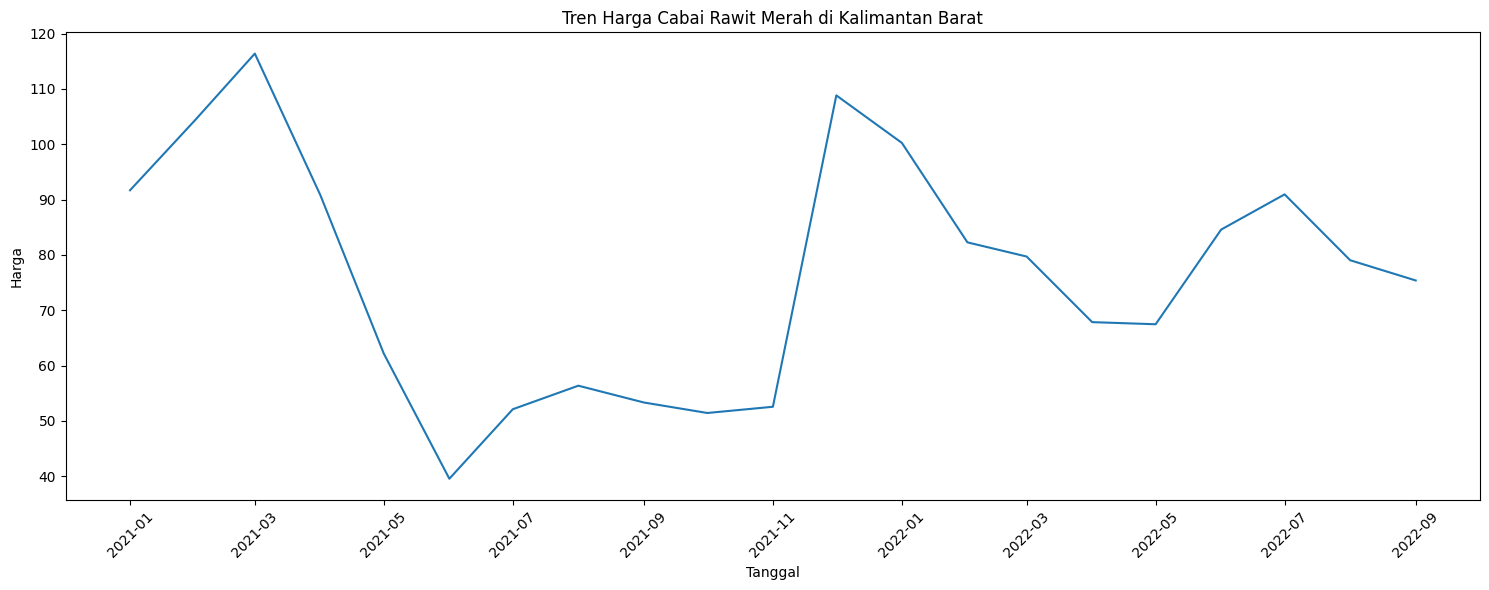

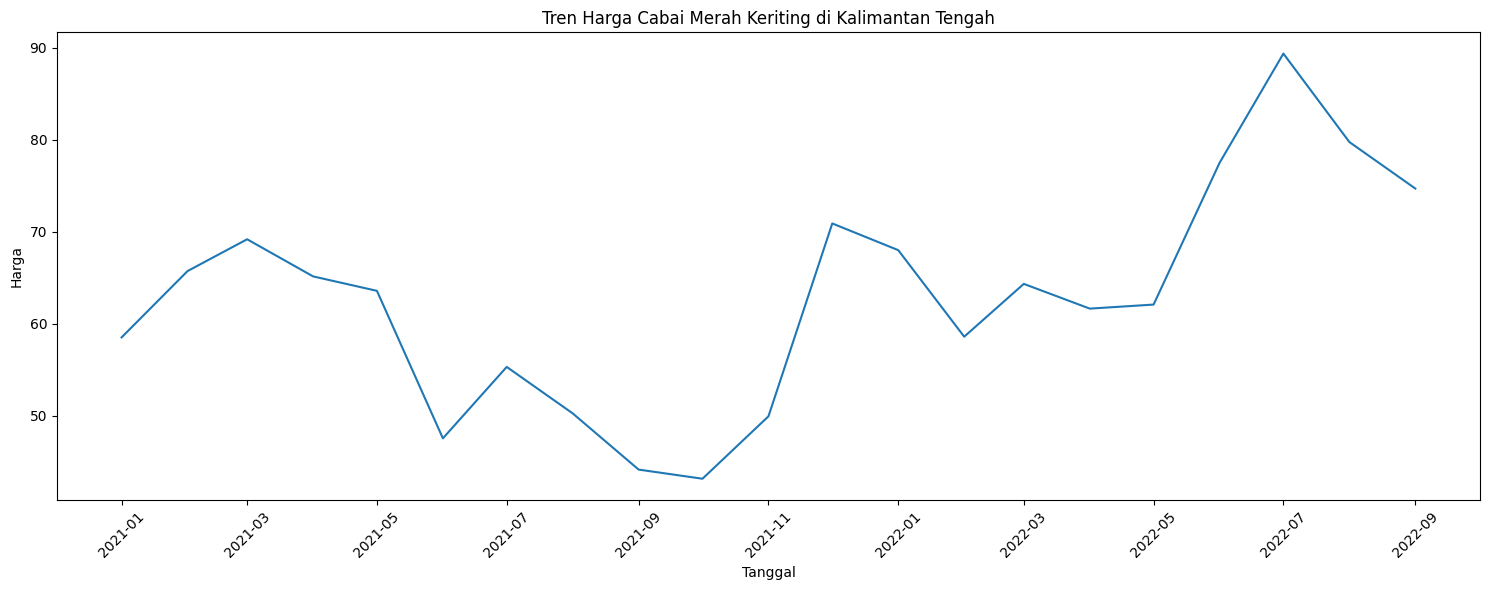

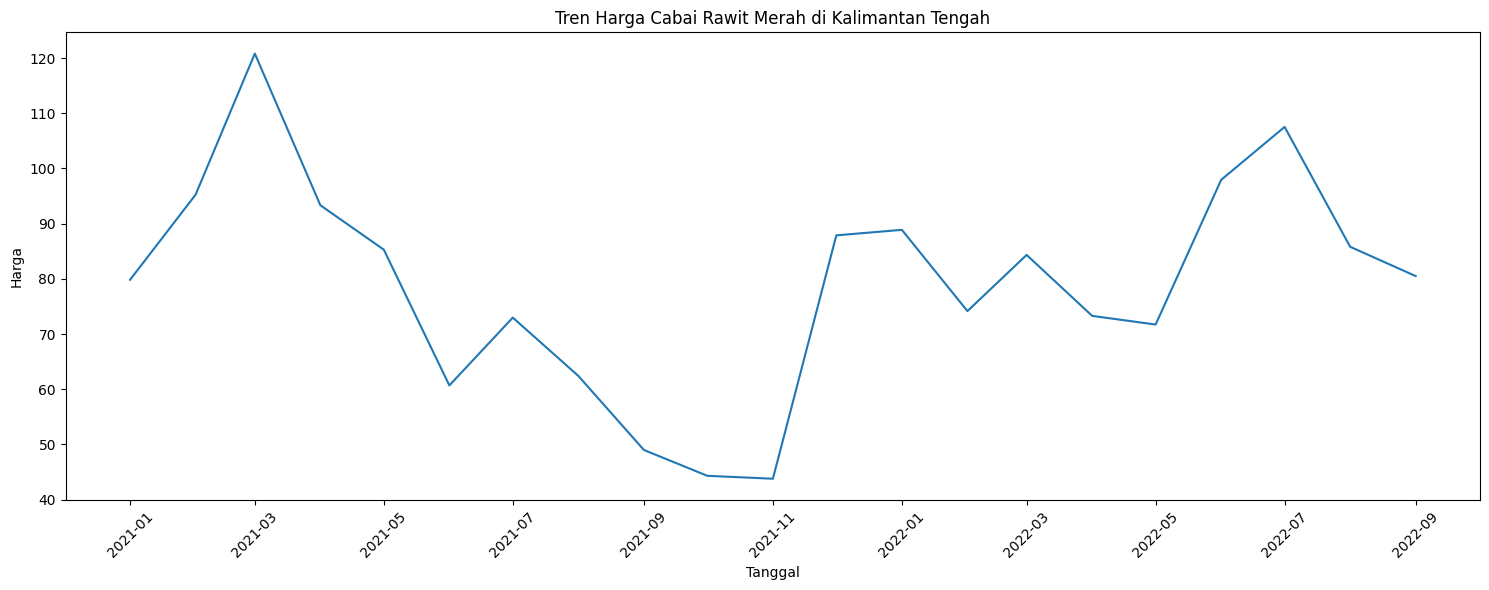

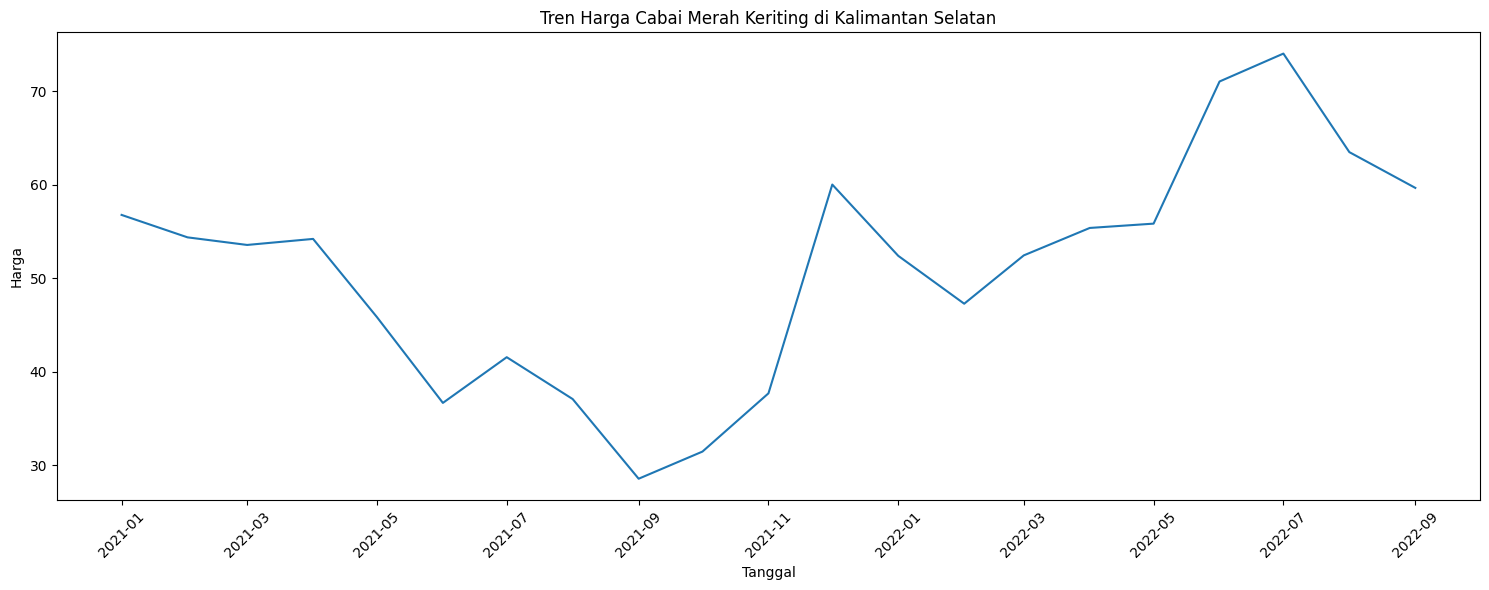

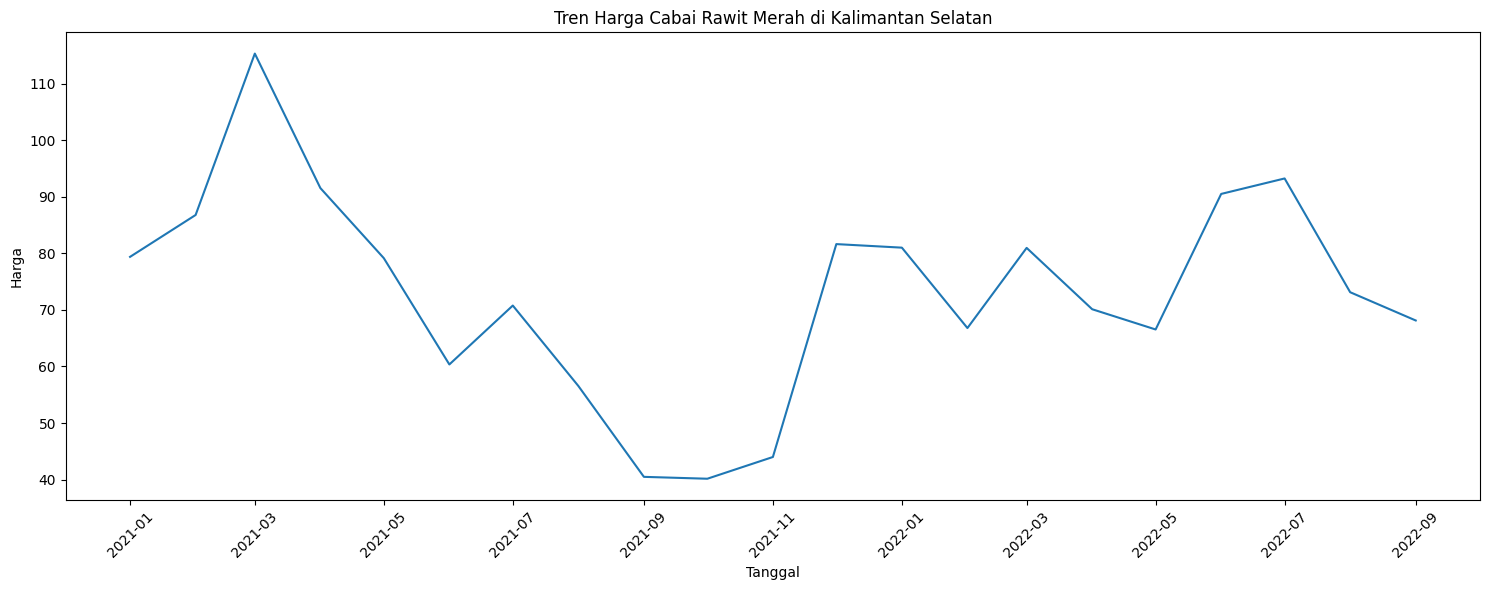

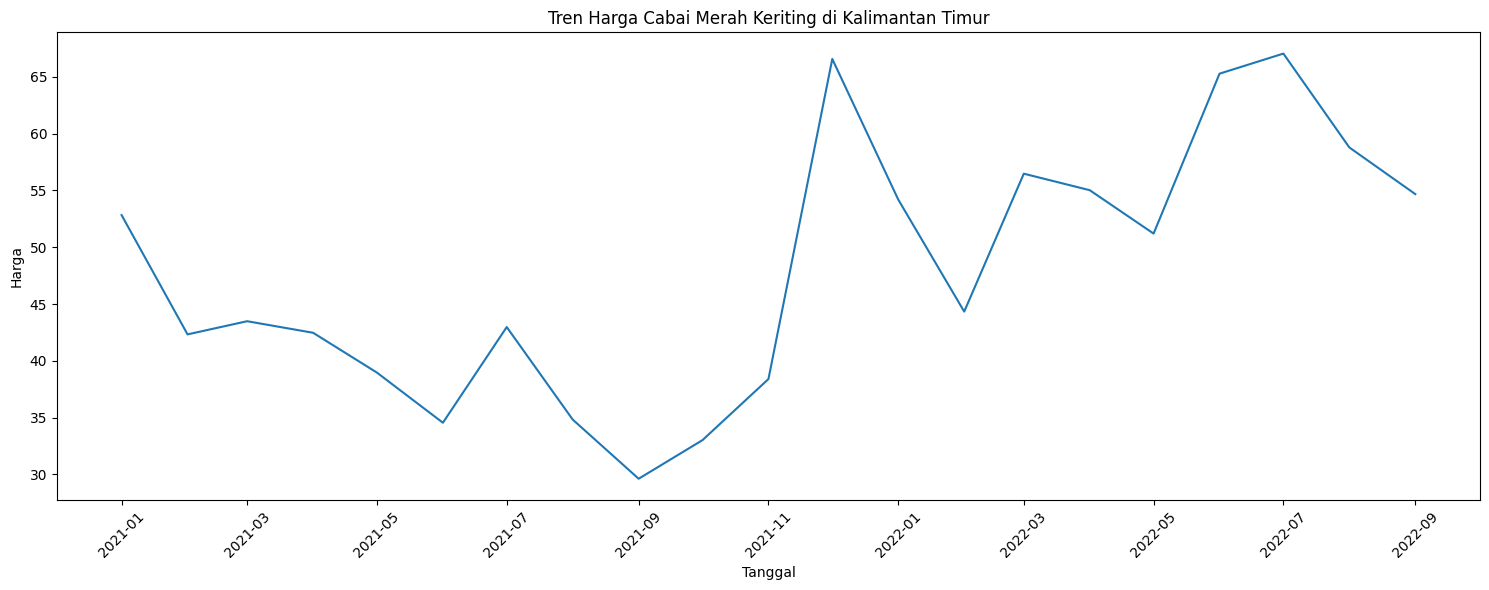

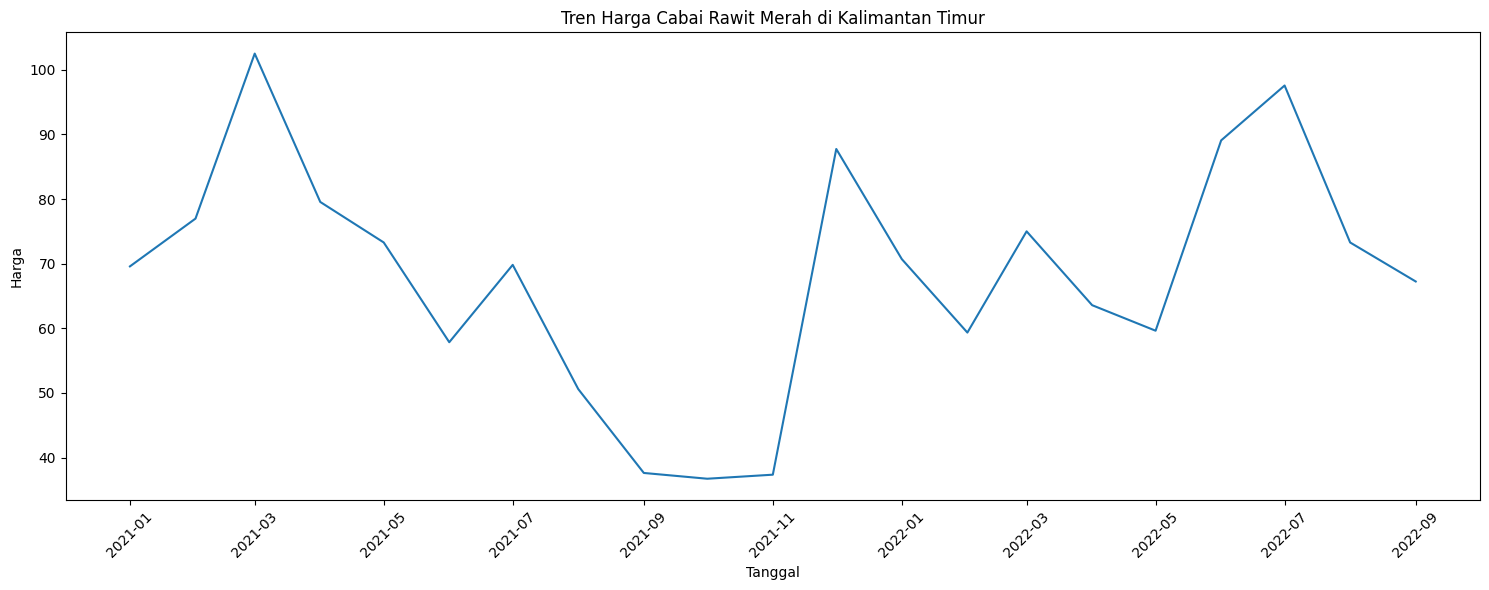

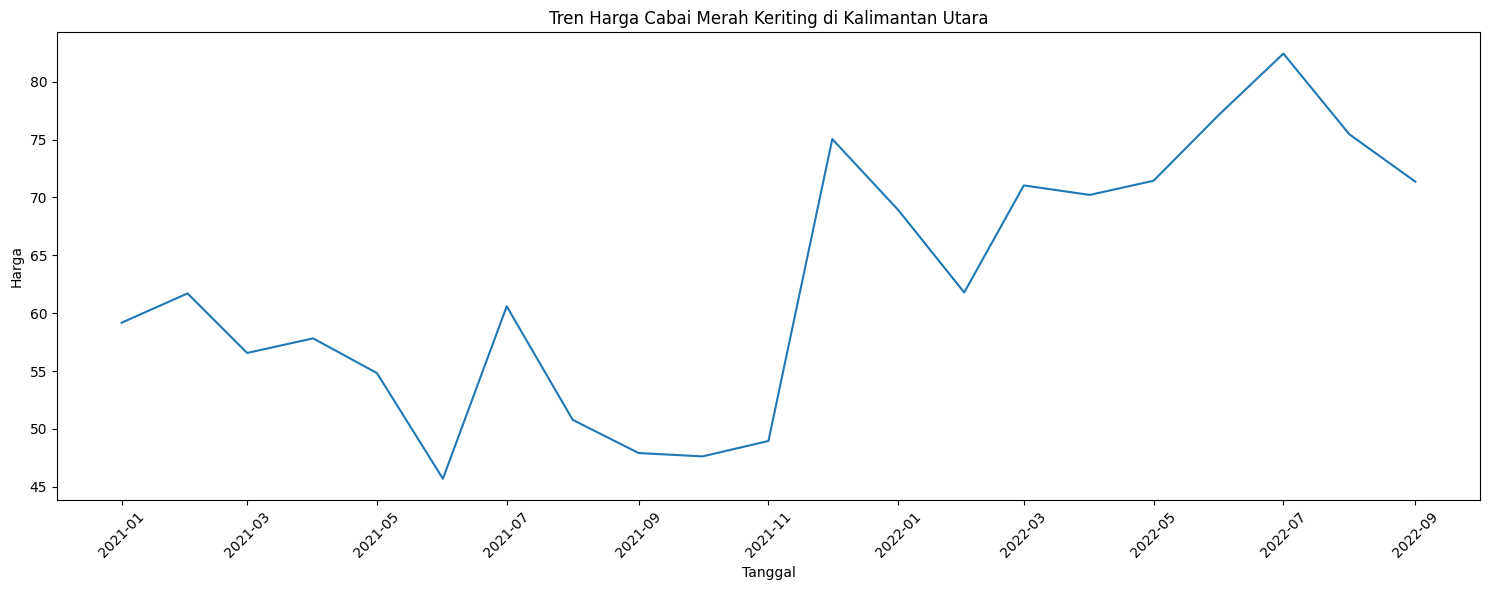

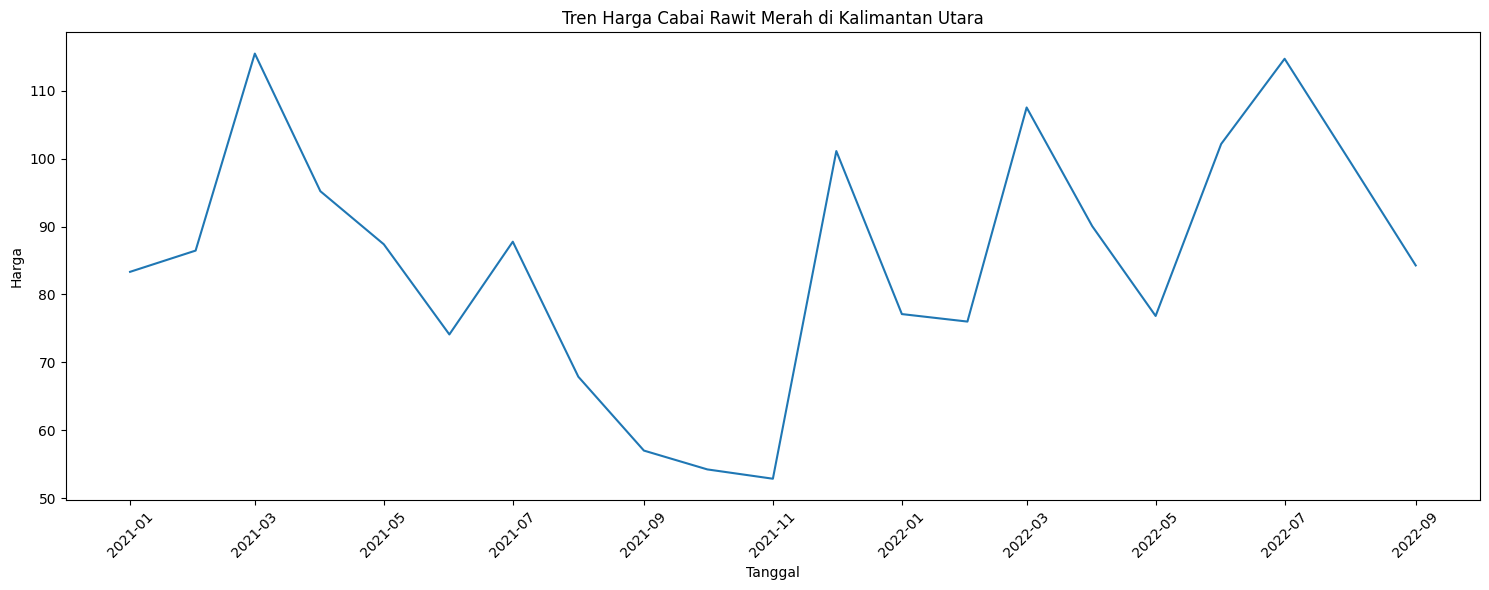

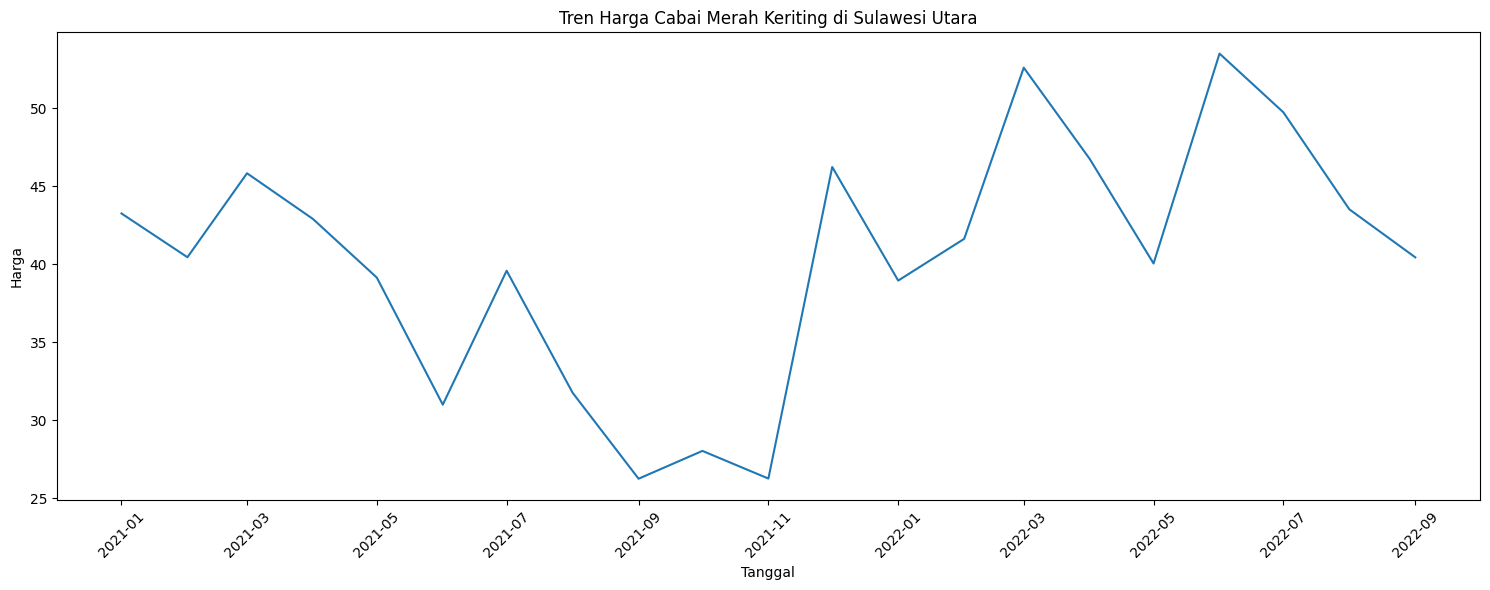

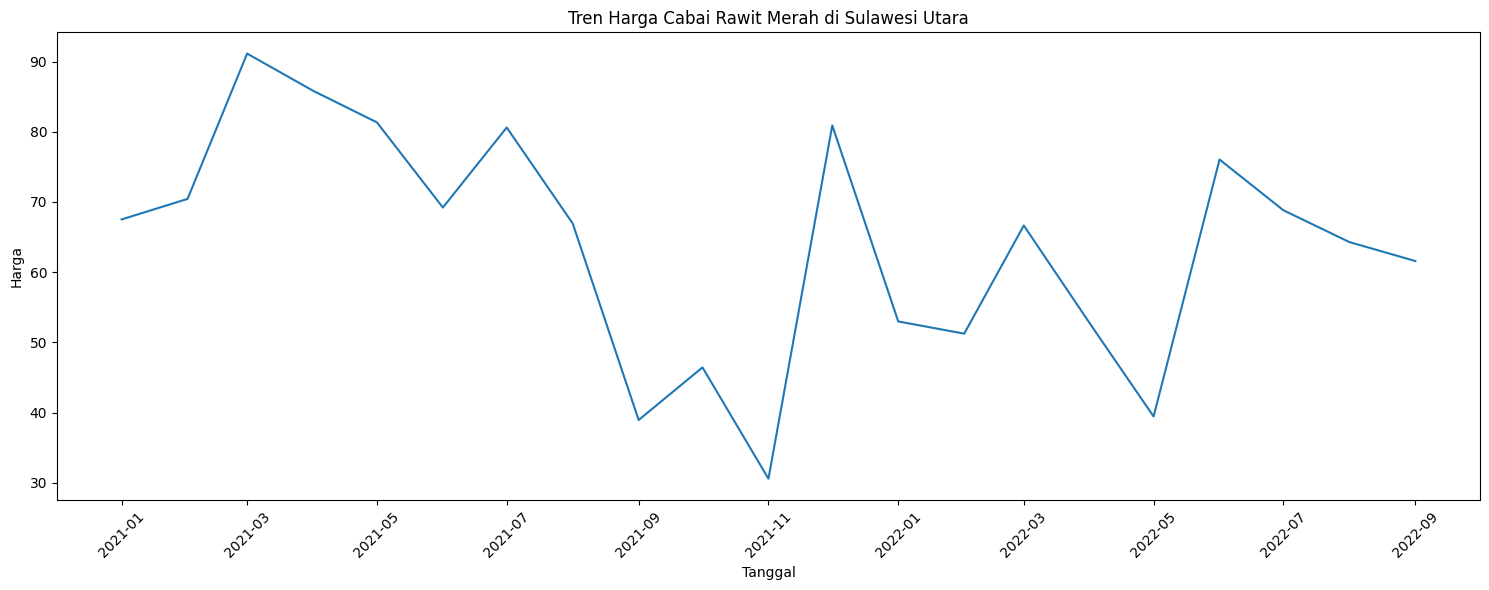

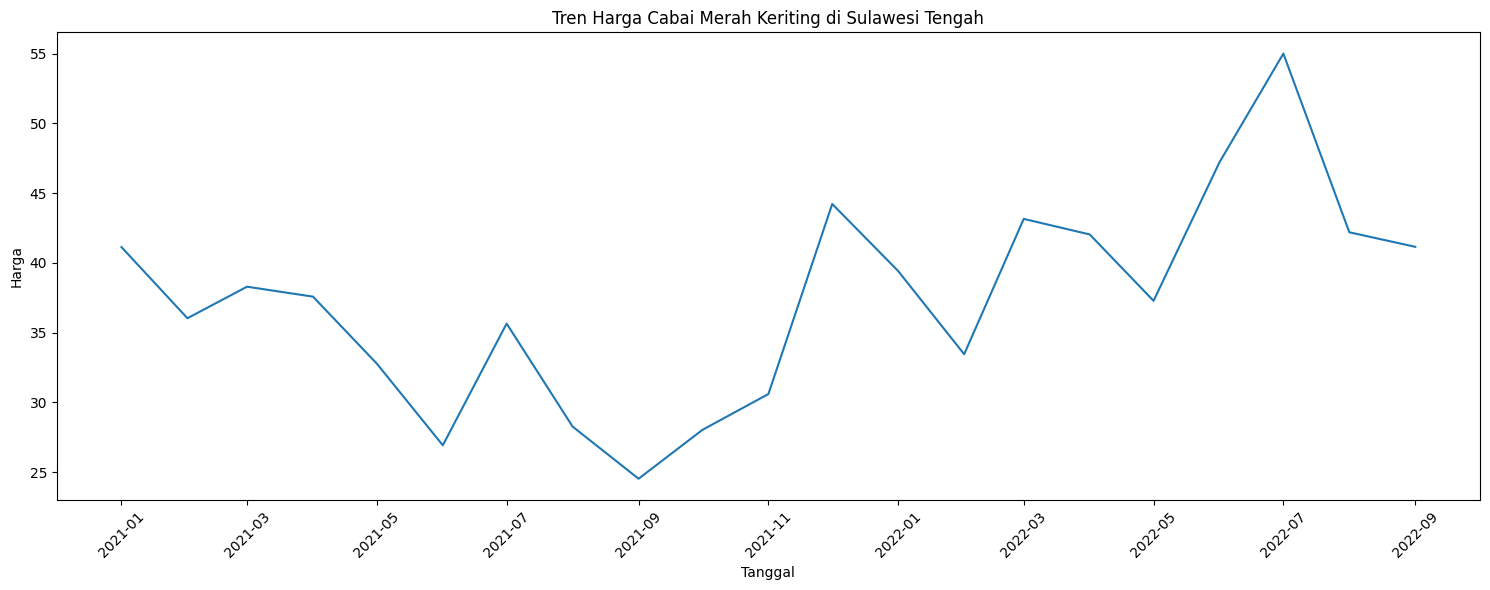

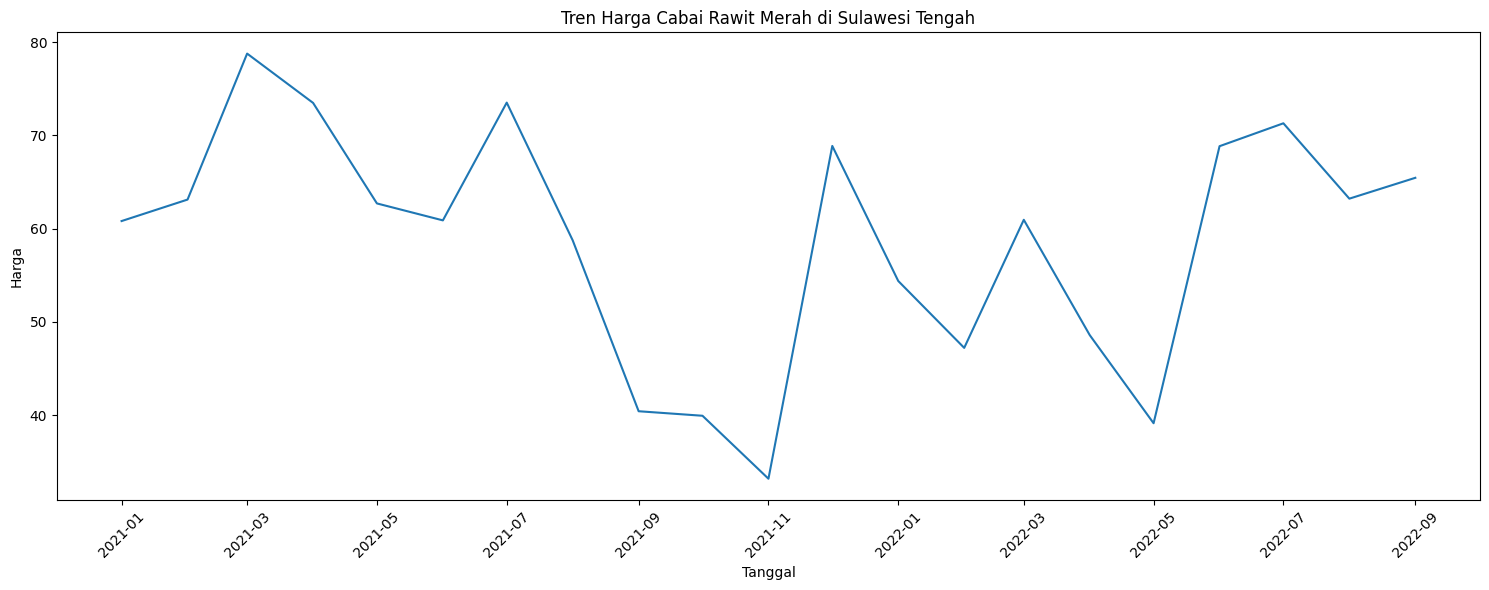

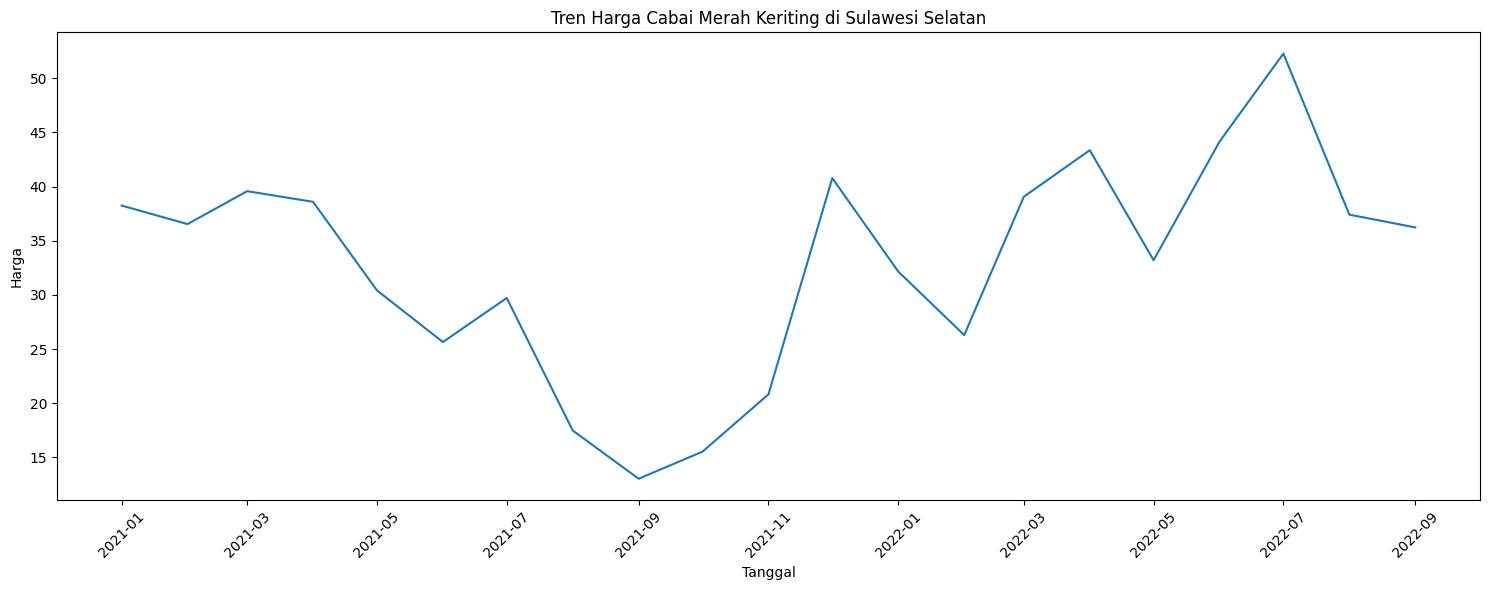

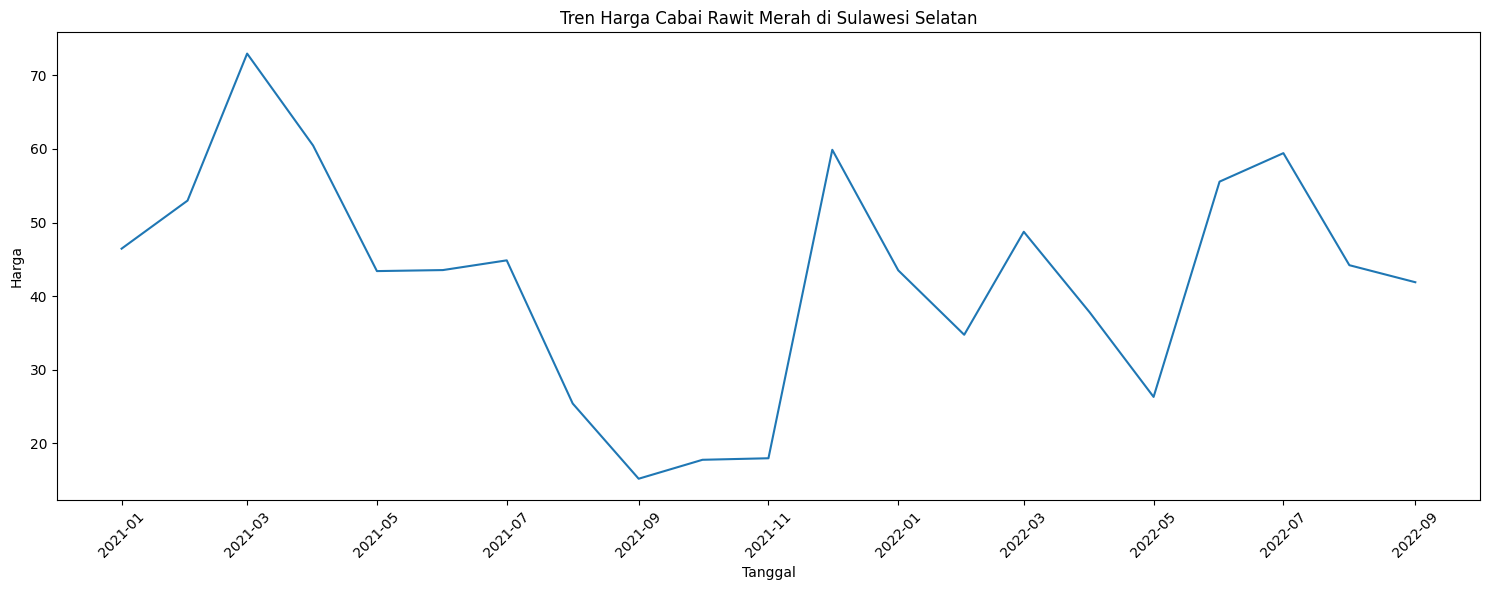

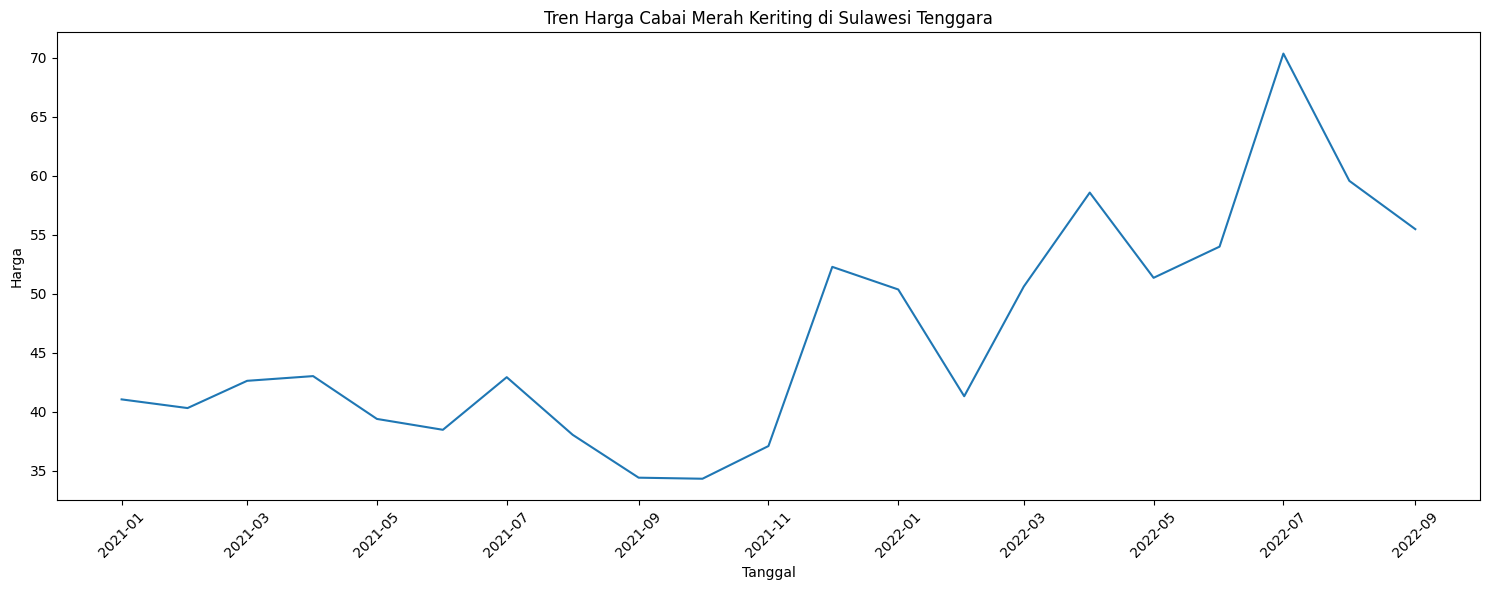

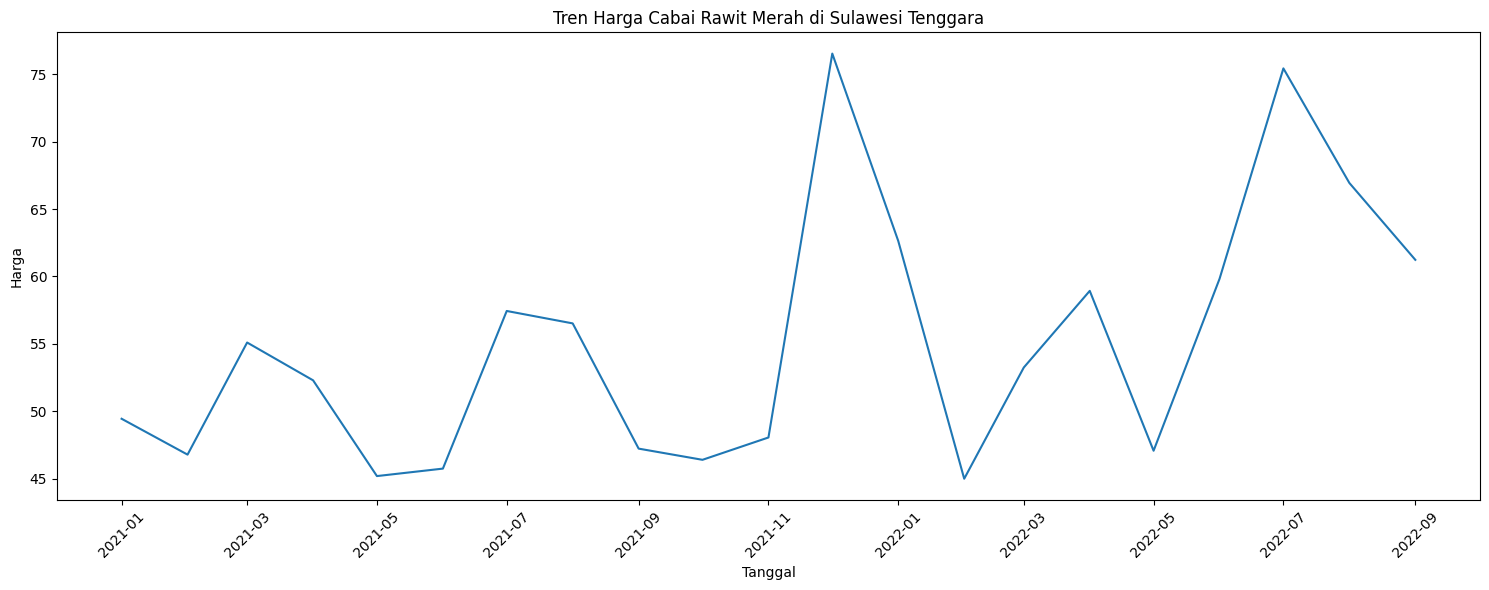

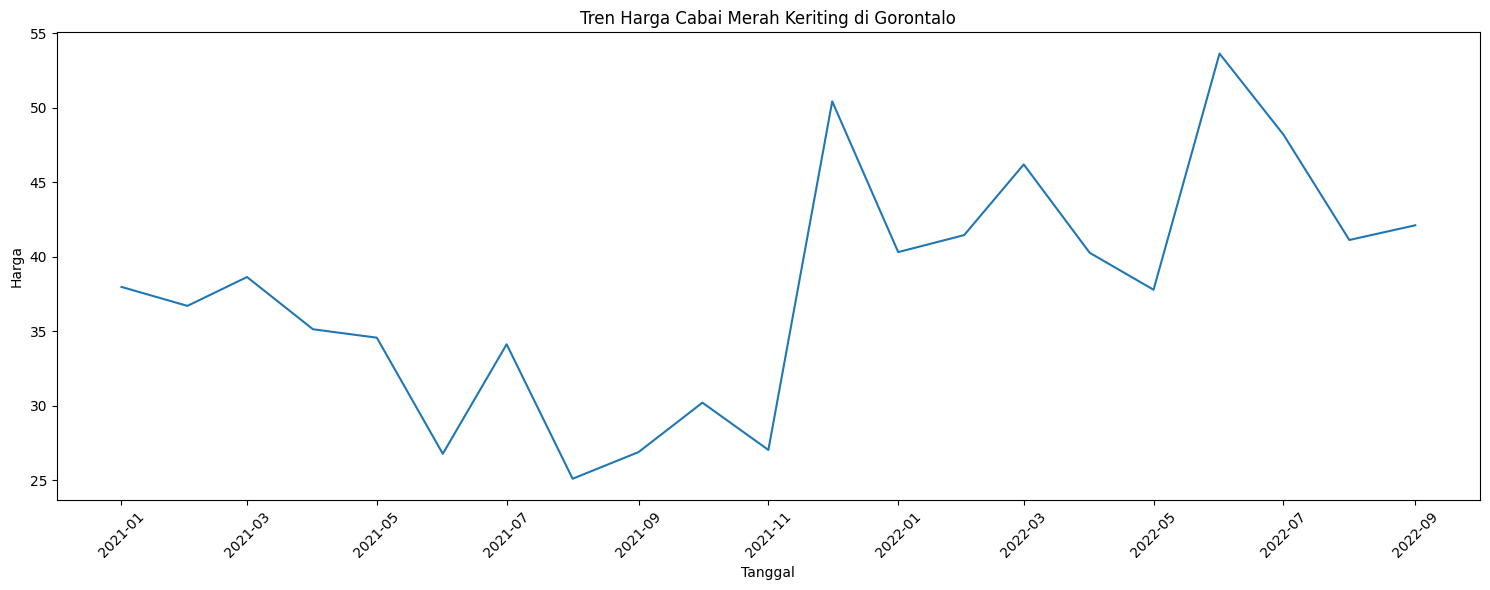

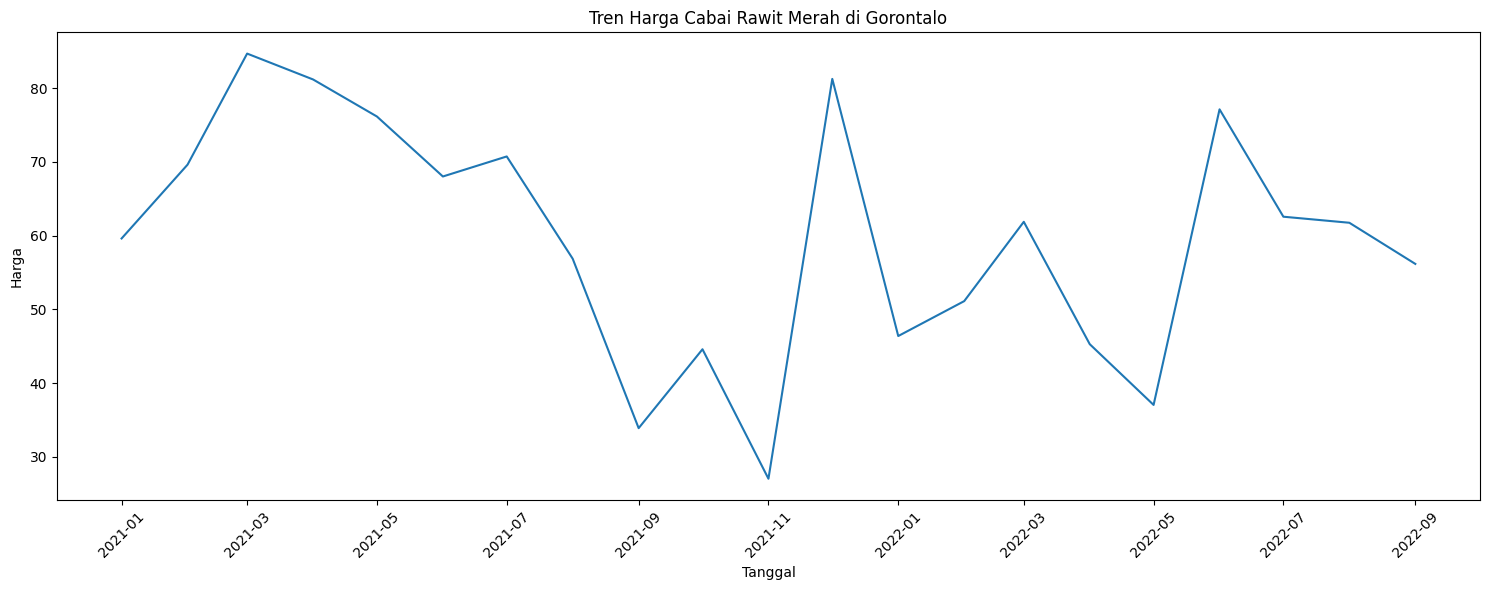

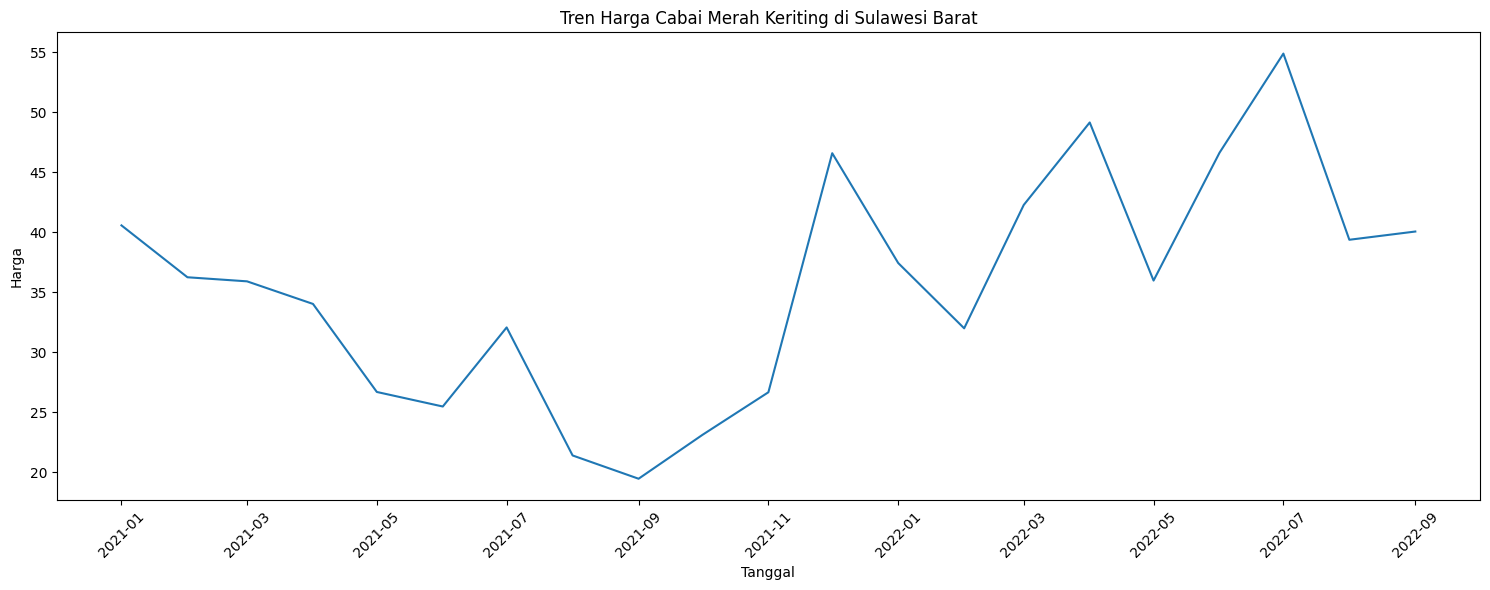

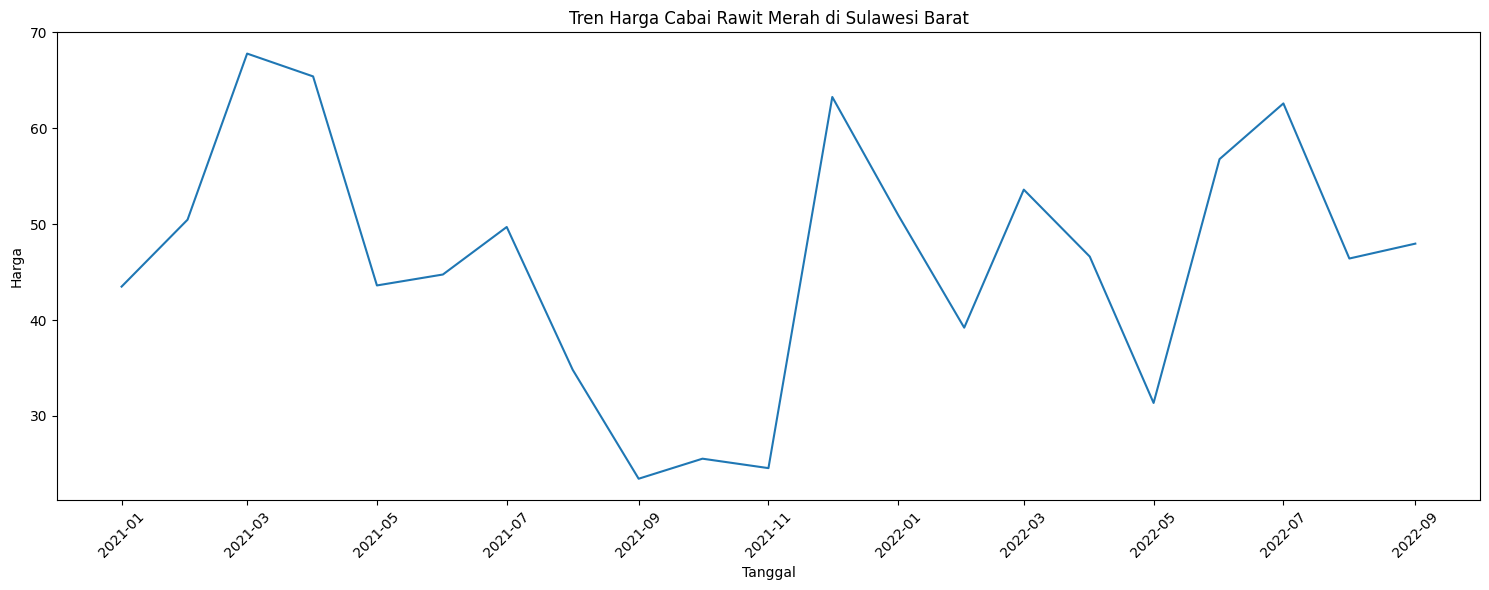

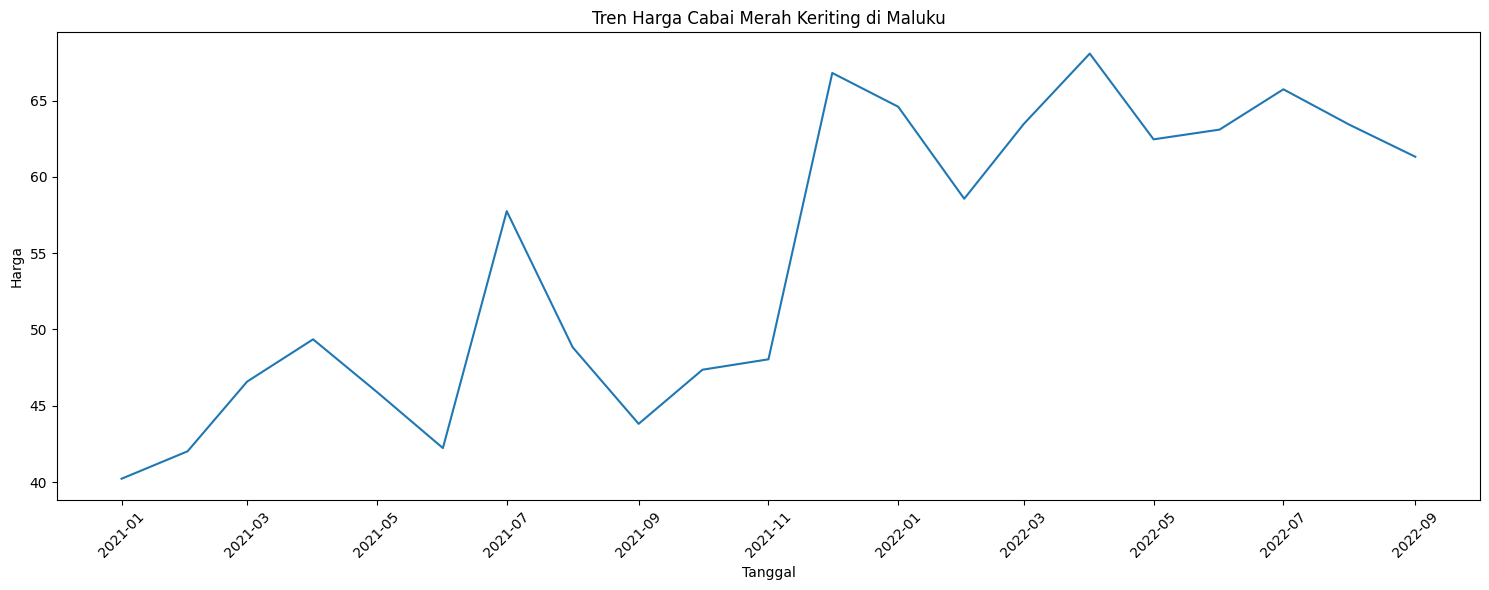

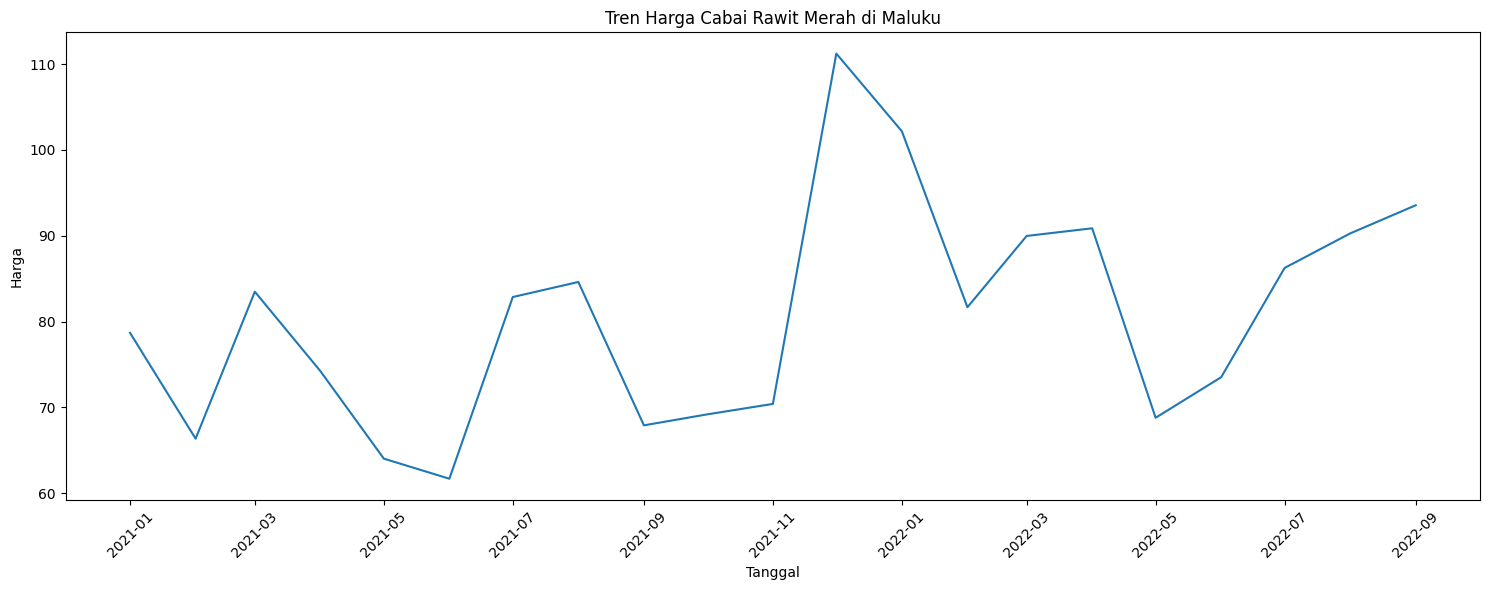

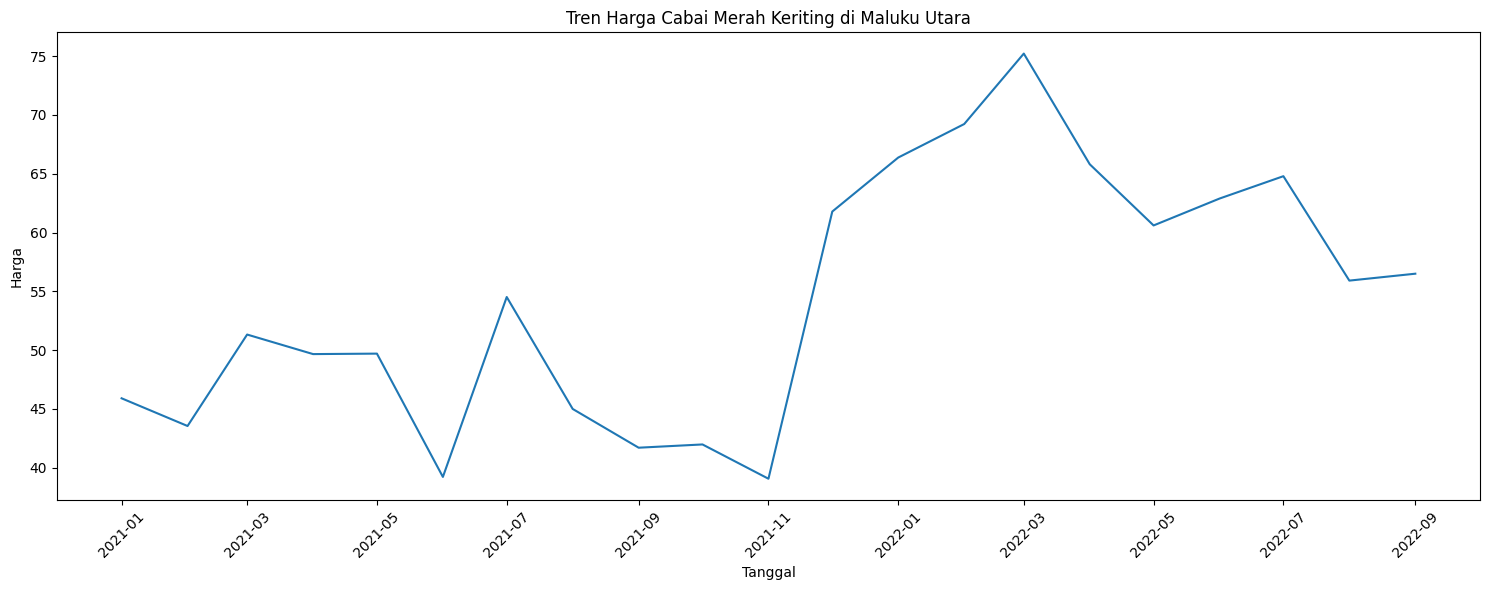

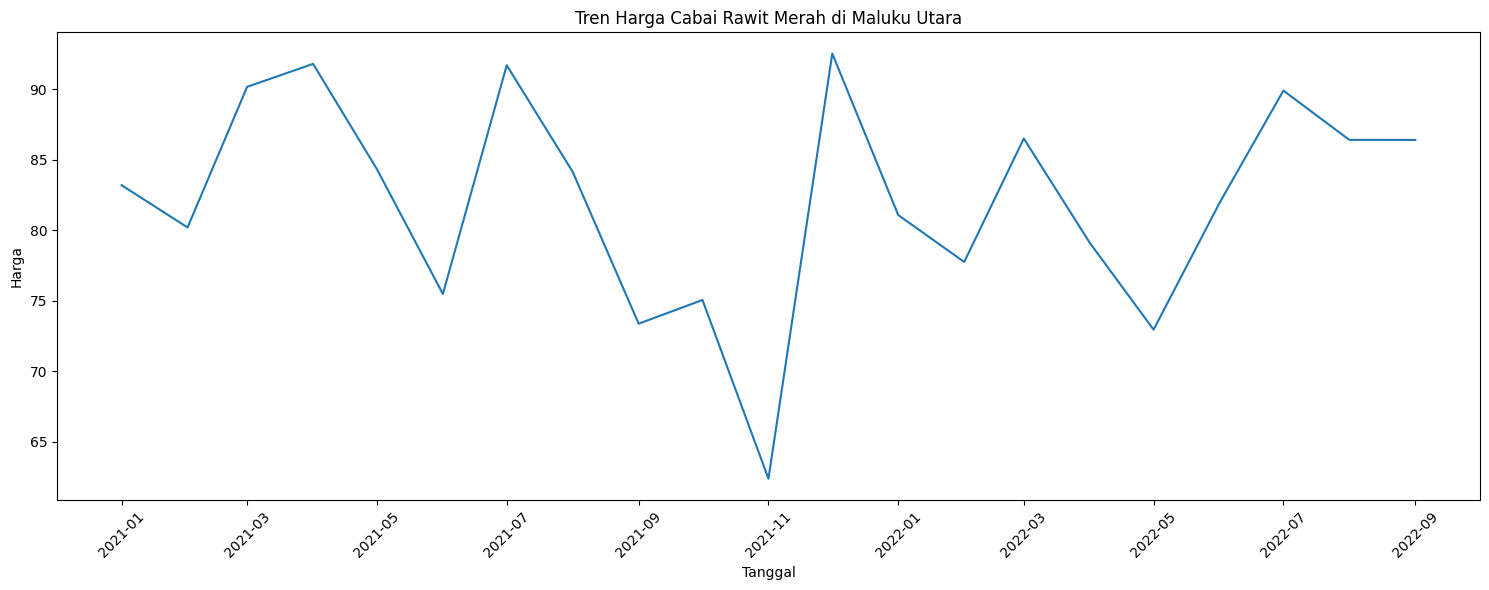

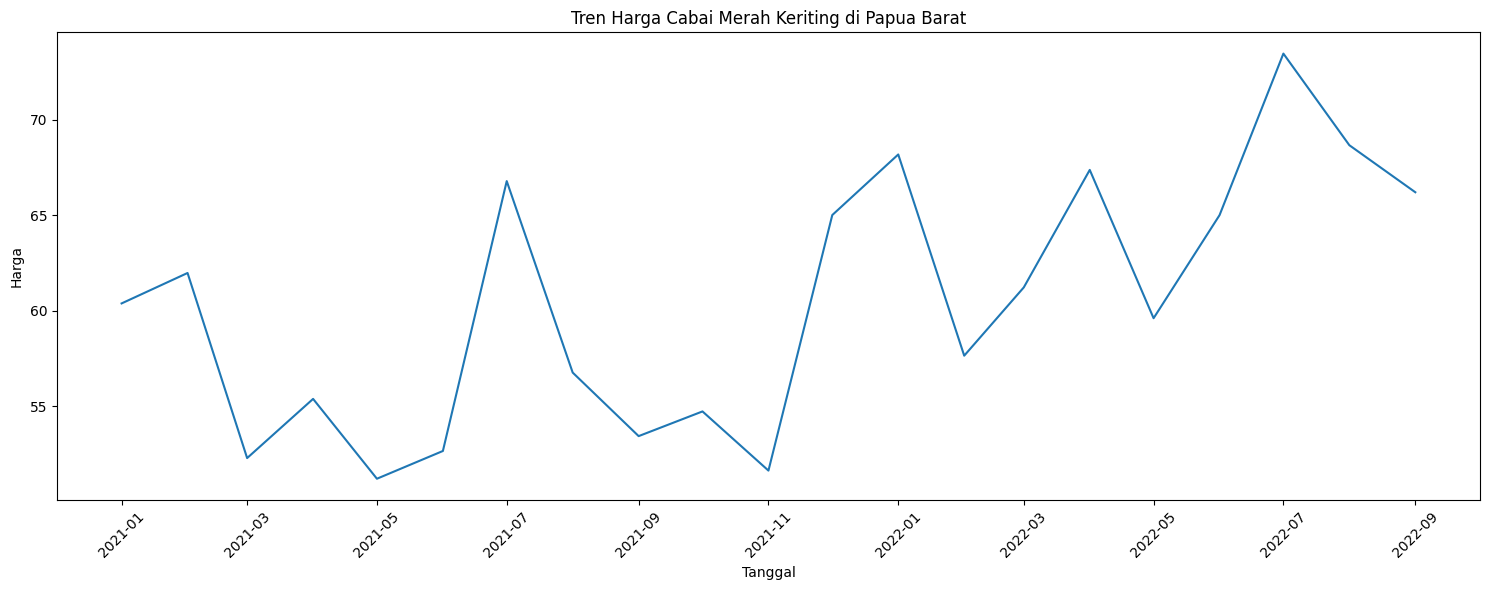

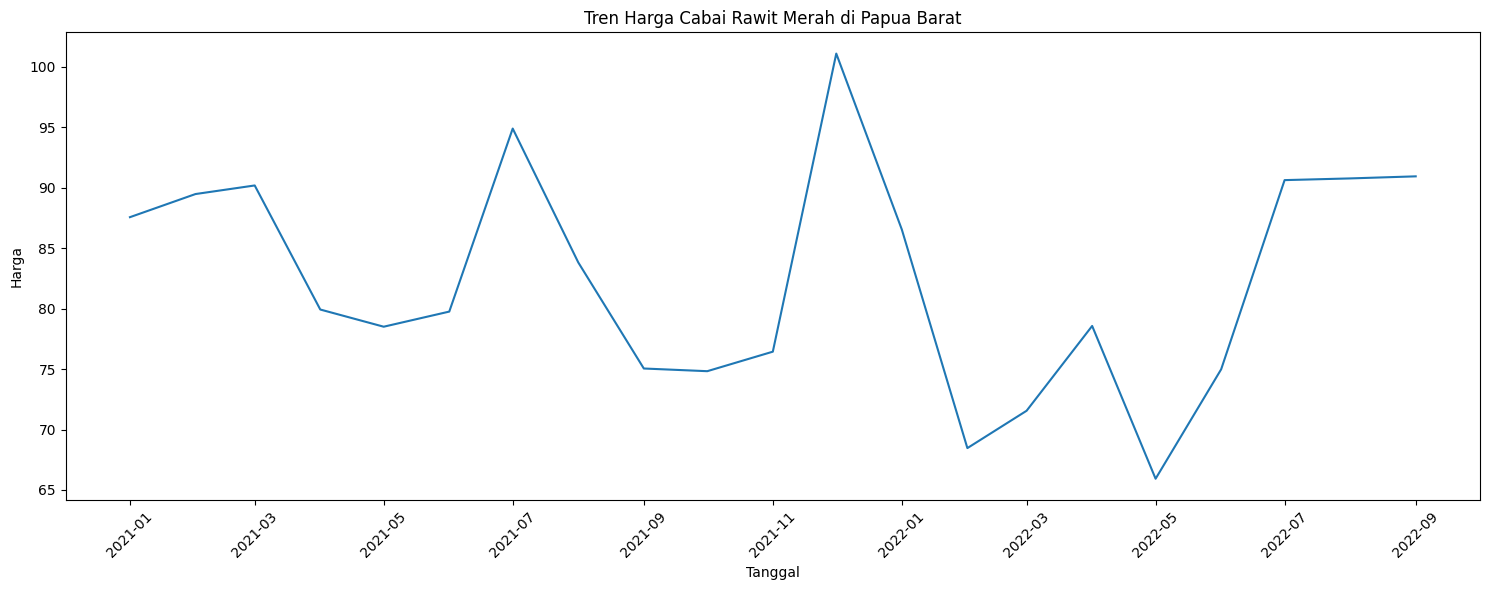

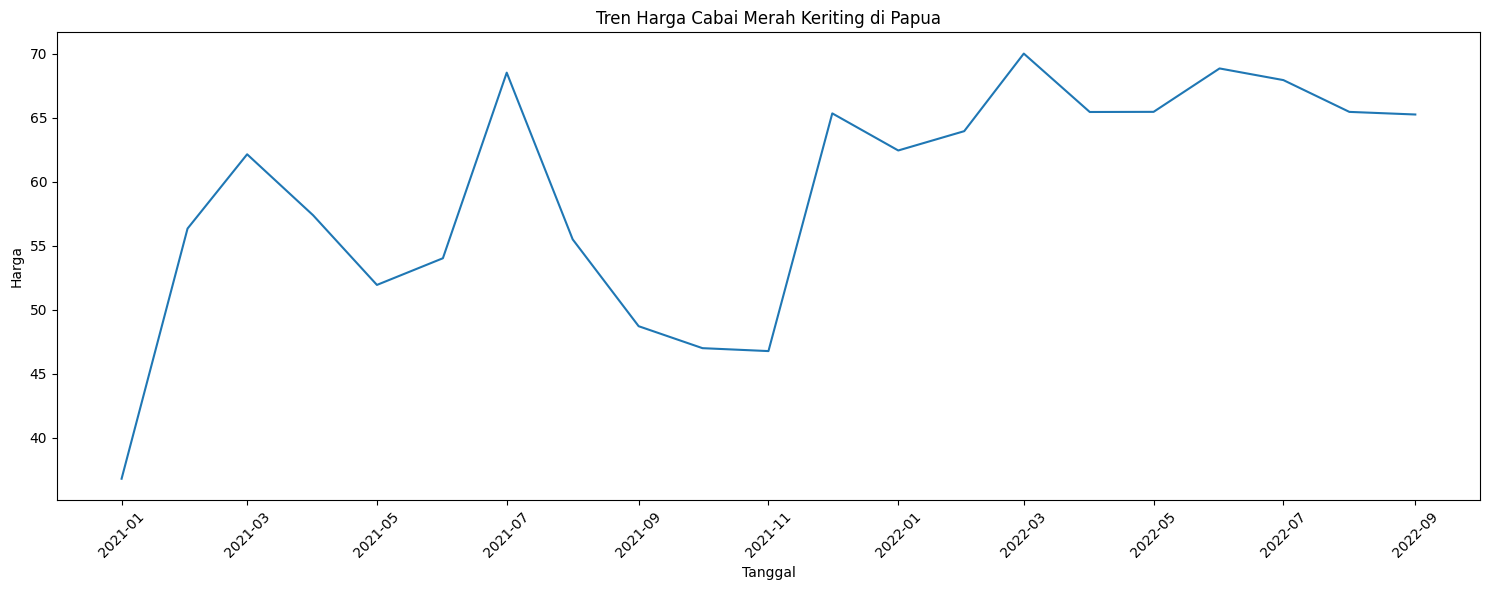

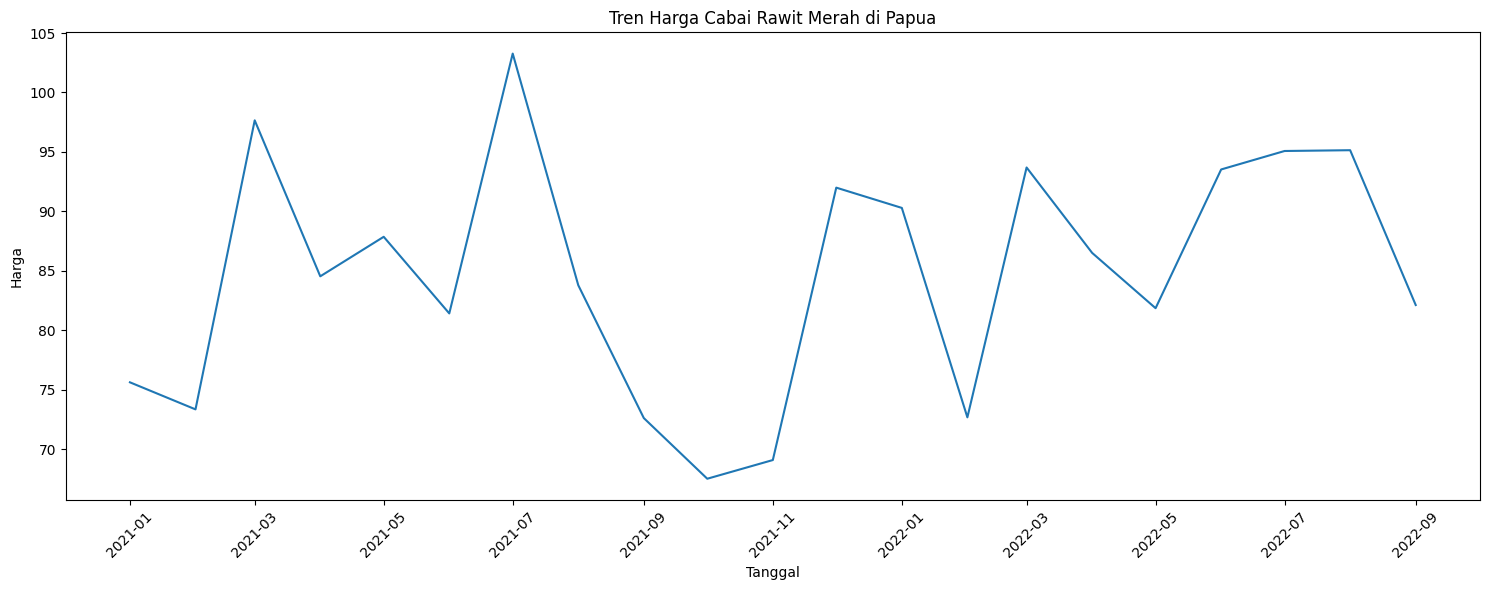

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan filtered_data adalah DataFrame Anda
filtered_data = filtered_data.copy()

# Konversi kolom Tanggal ke tipe datetime
filtered_data['Tanggal'] = pd.to_datetime(filtered_data['Tanggal'])

# Cek dan tangani duplikat
duplicates = filtered_data.duplicated(subset=['Tanggal', 'Provinsi', 'Komoditas'], keep=False)
if duplicates.any():
    print(f"Ditemukan {duplicates.sum()} entri duplikat.")
    filtered_data = filtered_data.drop_duplicates(subset=['Tanggal', 'Provinsi', 'Komoditas'])

# Membuat daftar unik komoditas dan provinsi
commodities = filtered_data['Komoditas'].unique()
provinces = filtered_data['Provinsi'].unique()

# Plotting untuk masing-masing komoditas dan provinsi
for commodity in commodities:
    plt.figure(figsize=(15, 8))
    for province in provinces:
        province_data = filtered_data[(filtered_data['Provinsi'] == province) & (filtered_data['Komoditas'] == commodity)]
        plt.plot(province_data['Tanggal'], province_data['Harga'], label=province)

    plt.title(f'Tren Harga {commodity} per Provinsi')
    plt.xlabel('Tanggal')
    plt.ylabel('Harga')
    plt.xticks(rotation=45)
    plt.legend(title='Provinsi', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Visualisasi terpisah untuk setiap provinsi dan komoditas
for province in provinces:
    for commodity in commodities:
        plt.figure(figsize=(15, 6))
        province_data = filtered_data[(filtered_data['Provinsi'] == province) & (filtered_data['Komoditas'] == commodity)]
        sns.lineplot(x='Tanggal', y='Harga', data=province_data)
        plt.title(f'Tren Harga {commodity} di {province}')
        plt.xlabel('Tanggal')
        plt.ylabel('Harga')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


['Cabai Merah Keriting' 'Cabai Rawit Merah']
Isolation Forest Performance for Cabai Merah Keriting:
Precision: 0.814
Recall: 0.777
F1-score: 0.794

One-Class SVM Performance for Cabai Merah Keriting:
Precision: 0.797
Recall: 0.753
F1-score: 0.775


<ipython-input-42-7da7f6ef842e>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commodity_data['is_anomaly'] = anomalies


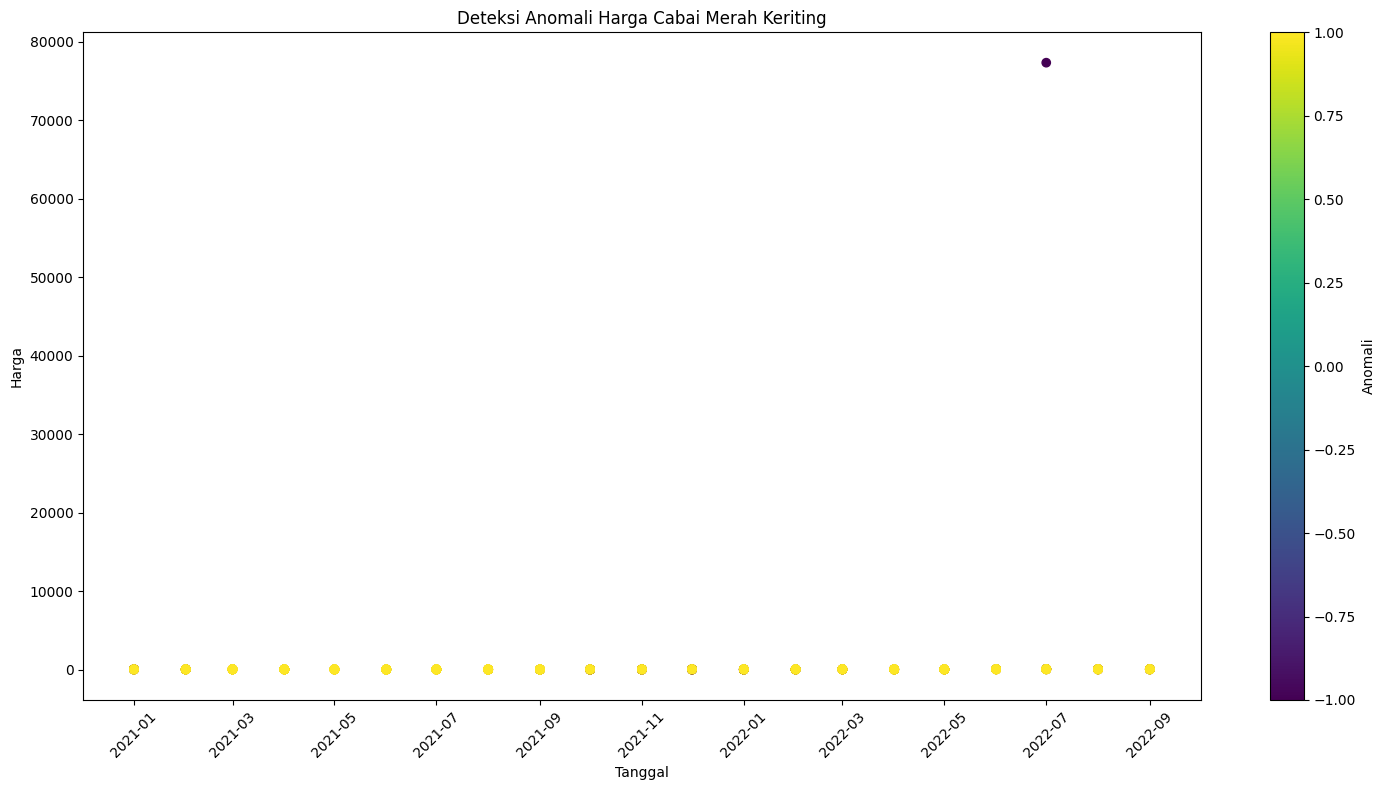


Beberapa data yang terdeteksi sebagai anomali untuk Cabai Merah Keriting:
                Provinsi             Komoditas   Harga    Tanggal  Tahun  \
3572      Sumatera Barat  Cabai Merah Keriting  48.343 2021-01-01   2021   
3582         Jawa Tengah  Cabai Merah Keriting  47.445 2021-01-01   2021   
3591  Kalimantan Selatan  Cabai Merah Keriting  56.768 2021-01-01   2021   
3592    Kalimantan Timur  Cabai Merah Keriting  52.835 2021-01-01   2021   
3595     Sulawesi Tengah  Cabai Merah Keriting  41.129 2021-01-01   2021   

      Bulan  is_anomaly  
3572      1          -1  
3582      1          -1  
3591      1          -1  
3592      1          -1  
3595      1          -1  
Isolation Forest Performance for Cabai Rawit Merah:
Precision: 0.832
Recall: 0.805
F1-score: 0.818

One-Class SVM Performance for Cabai Rawit Merah:
Precision: 0.813
Recall: 0.772
F1-score: 0.792


<ipython-input-42-7da7f6ef842e>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commodity_data['is_anomaly'] = anomalies


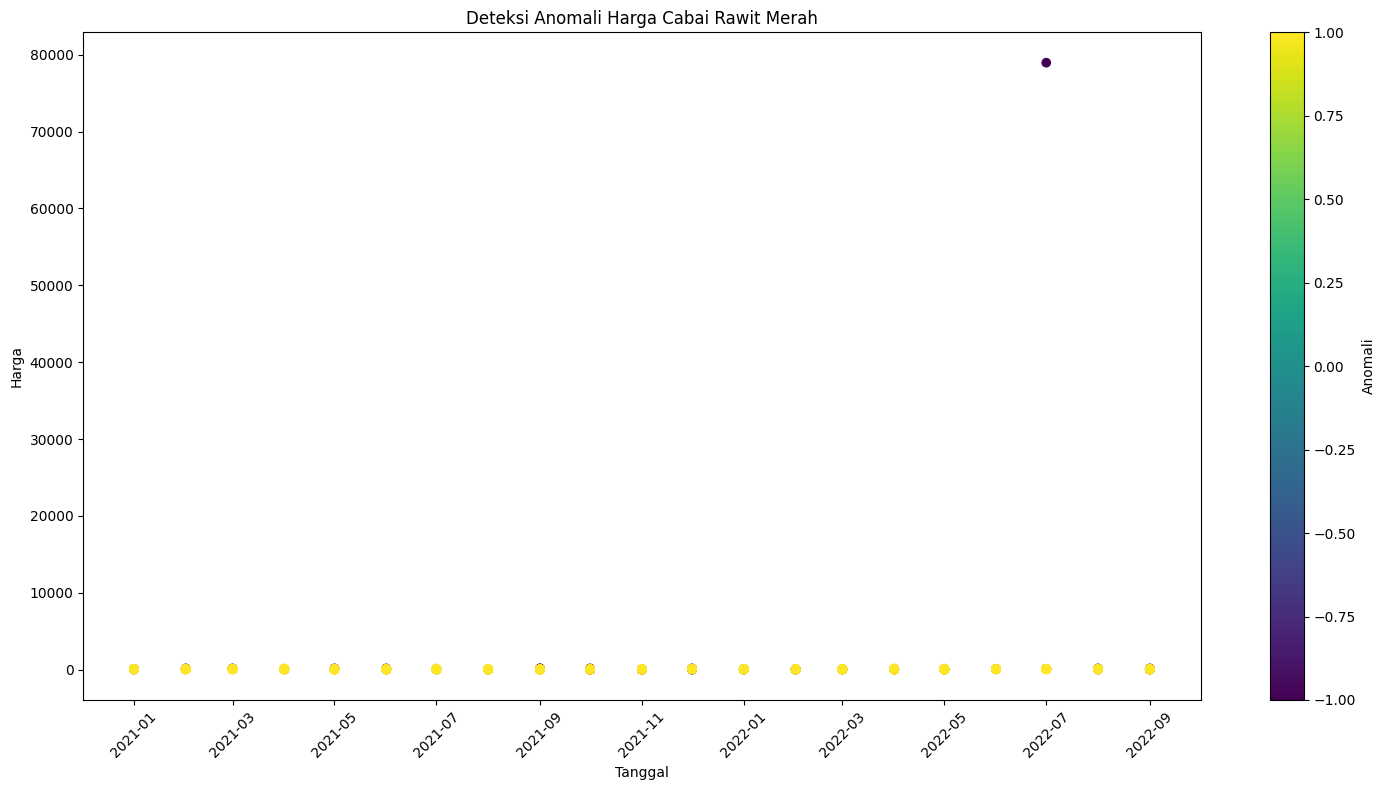


Beberapa data yang terdeteksi sebagai anomali untuk Cabai Rawit Merah:
                Provinsi          Komoditas       Harga    Tanggal  Tahun  \
4286      Sumatera Barat  Cabai Rawit Merah   38.143000 2021-01-01   2021   
4305  Kalimantan Selatan  Cabai Rawit Merah   79.389000 2021-01-01   2021   
4306    Kalimantan Timur  Cabai Rawit Merah   69.587000 2021-01-01   2021   
4309     Sulawesi Tengah  Cabai Rawit Merah   60.821000 2021-01-01   2021   
4320      Sumatera Barat  Cabai Rawit Merah  174.778504 2021-02-01   2021   

      Bulan  is_anomaly  
4286      1          -1  
4305      1          -1  
4306      1          -1  
4309      1          -1  
4320      2          -1  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import precision_score, recall_score, f1_score

# Persiapan Data
filtered_data['Tanggal'] = pd.to_datetime(filtered_data['Tanggal'])
filtered_data['Tahun'] = filtered_data['Tanggal'].dt.year
filtered_data['Bulan'] = filtered_data['Tanggal'].dt.month

# Pisahkan data berdasarkan komoditas
commodities = filtered_data['Komoditas'].unique()

print(commodities)

for commodity in commodities:
    commodity_data = filtered_data[filtered_data['Komoditas'] == commodity]

    # One-hot encoding untuk Provinsi
    data_encoded = pd.get_dummies(commodity_data, columns=['Provinsi'])

    # Fitur yang akan digunakan
    features = ['Harga', 'Tahun', 'Bulan'] + [col for col in data_encoded.columns if col.startswith('Provinsi_')]

    X = data_encoded[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data
    X_train, X_test = train_test_split(X_scaled, test_size=0.3, random_state=42)

    # Fungsi untuk evaluasi
    def evaluate_model(y_true, y_pred):
        precision = precision_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')
        return precision, recall, f1

    # 1. Isolation Forest
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    iso_forest.fit(X_train)

    # Prediksi
    y_pred_if = iso_forest.predict(X_test)

    # Untuk evaluasi, asumsikan bahwa 10% data dengan nilai terbesar adalah anomali
    threshold = np.percentile(X_test[:, 0], 90)
    y_true = np.where(X_test[:, 0] > threshold, -1, 1)

    precision_if, recall_if, f1_if = evaluate_model(y_true, y_pred_if)

    print(f"Isolation Forest Performance for {commodity}:")
    print(f"Precision: {precision_if:.3f}")
    print(f"Recall: {recall_if:.3f}")
    print(f"F1-score: {f1_if:.3f}")

    # 2. One-Class SVM
    ocsvm = OneClassSVM(kernel='rbf', nu=0.1)
    ocsvm.fit(X_train)

    # Prediksi
    y_pred_svm = ocsvm.predict(X_test)

    precision_svm, recall_svm, f1_svm = evaluate_model(y_true, y_pred_svm)

    print(f"\nOne-Class SVM Performance for {commodity}:")
    print(f"Precision: {precision_svm:.3f}")
    print(f"Recall: {recall_svm:.3f}")
    print(f"F1-score: {f1_svm:.3f}")

    # Pilih model terbaik berdasarkan F1-score
    best_model = iso_forest if f1_if > f1_svm else ocsvm

    # Aplikasikan model terbaik pada keseluruhan dataset
    anomalies = best_model.predict(X_scaled)
    commodity_data['is_anomaly'] = anomalies

    # Visualisasi hasil
    plt.figure(figsize=(15, 8))
    plt.scatter(commodity_data['Tanggal'], commodity_data['Harga'], c=commodity_data['is_anomaly'], cmap='viridis')
    plt.title(f'Deteksi Anomali Harga {commodity}')
    plt.xlabel('Tanggal')
    plt.ylabel('Harga')
    plt.colorbar(label='Anomali')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # beberapa data anomali
    print(f"\nBeberapa data yang terdeteksi sebagai anomali untuk {commodity}:")
    print(commodity_data[commodity_data['is_anomaly'] == -1].head())


In [ ]:
# Data baru sebagai contoh untuk testing, termasuk kolom Komoditas
data_baru = pd.DataFrame({
    'Tanggal': ['2022-07-01'],
    'Provinsi': ['Sulawesi Selatan'],
    'Komoditas': ['Cabai Merah Keriting'],
    'Harga': [37406]
})

In [ ]:
# Preprocessing data baru
data_baru['Tanggal'] = pd.to_datetime(data_baru['Tanggal'])
data_baru['Tahun'] = data_baru['Tanggal'].dt.year
data_baru['Bulan'] = data_baru['Tanggal'].dt.month

# One-hot encoding untuk provinsi dan komoditas
data_baru_encoded = pd.get_dummies(data_baru, columns=['Provinsi', 'Komoditas'])

# Pastikan semua kolom yang ada di data training juga ada di data baru
missing_cols = set(data_encoded.columns) - set(data_baru_encoded.columns)
for col in missing_cols:
    data_baru_encoded[col] = 0

# Ambil hanya kolom yang sama seperti di data training
data_baru_encoded = data_baru_encoded[features]

# Lakukan scaling dengan scaler yang sama
X_baru_scaled = scaler.transform(data_baru_encoded)


In [ ]:
# Prediksi menggunakan model terbaik
anomalies_baru = best_model.predict(X_baru_scaled)

# Tambahkan kolom hasil prediksi ke data baru
data_baru['is_anomaly'] = anomalies_baru

# Tampilkan hasil prediksi
print("\nHasil prediksi untuk data baru:")
data_baru



Hasil prediksi untuk data baru:


Tanggal          Provinsi             Komoditas  Harga  Tahun  Bulan  \
0 2022-07-01  Sulawesi Selatan  Cabai Merah Keriting  37406   2022      7   

   is_anomaly  
0          -1

In [ ]:
print("Best Model", best_model)

Best Model IsolationForest(contamination=0.1, random_state=42)


In [ ]:
import pickle

# Misalkan model adalah nama variabel model yang sudah dilatih
with open('model.pkl', 'wb') as file:
    pickle.dump(iso_forest, file)

## **Pembuatan Dashboard**